# Lending club case study



### Lending club Company Info : Source Wikipedia  https://en.wikipedia.org/wiki/LendingClub**

LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. The company claims that $15.98 billion in loans had been originated through its platform up to December 31, 2015. 

1.LendingClub enables borrowers to create unsecured personal loans between $1,000 and $40,000. 

2.LendingClub enables borrowers to create loan listings on its website by supplying details about themselves and the loans that they would like to request.On the basis of the borrower’s credit score, credit history, desired loan amount and the borrower’s debt-to-income ratio, LendingClub determines whether the borrower is creditworthy and assigns to its approved loans a credit grade that determines the payable interest rate and fees. 

3.The standard loan period is three years; a five-year period is available at a higher interest rate and additional fees. The loans can be repaid at any time without penalty.

4.Only investors in 39 US states are eligible to purchase notes on the LendingClub platform. However, eligibility differs when purchasing notes on the secondary market, FolioFN. Borrowers from all but 2 US states are eligible to apply for a loan.

5.Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. The loans can only be chosen at the interest rates assigned by LendingClub but investors can decide how much to fund each borrower, with the minimum investment of $25 per note.

6.Investors make money from interest. Rates vary from 6.03% to 26.06%, depending on the credit grade assigned to the loan request. The grades assigned to these requests range alphabetically from A to G, with A being the highest-grade, lowest-interest loan. Each of these letter grades has five finer-grain sub-grades, numbered 1 to 5, with 1 being the highest sub-grade. LendingClub makes money by charging borrowers an origination fee and investors a service fee


### Case Study Problem Statement and Objectives

**Business Understanding :**

Lending Club specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

Information about past loan applicants and whether they ‘defaulted’ or not is available.  The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
    1.Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    2.Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    3.Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company

**Business Objective :**

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

# Data Cleaning

### Load the loan file and understand the data

In [1366]:
# load all the required packages
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
import numpy as np
import seaborn as sns


In [1367]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [1368]:
# check the encoding of the loans file
with open("loan.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [1369]:
## Load the companies into a dataframe with the correct encoding.  Though chardet says encoding of companies file is Windows-1252
## the encoding of the file is ISO-8859-1
loan = pd.read_csv("loan.csv",low_memory=False)

In [1370]:
# check if loan is loaded ok
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     nan   
1           Apr-99               5                     nan   
2           Nov-01               2                     nan   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     nan         3        0      13648     83.70%          9   
1                     nan         3        0       1687      9.40%          4   
2                     nan         2        0       2956     98.50%         10   
3                     nan        10        0       5598        21%         37   
4                     nan        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00      5863.16          5833.84   
1                   f       0.00           0.00      1008.71          1008.71   
2                   f       0.00           0.00      3005.67          3005.67   
3                   f       0.00           0.00     12231.89         12231.89   
4                   f     524.06         524.06      3513.33          3513.33   

   total_rec_prncp  total_rec_int  tota

In [1371]:
# Check column info of loan to know the datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1372]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [1373]:
##  drop the columns that have only null values
loan.dropna(how='all',axis=1,inplace=True)

In [1374]:
# Check column info of loan to know the datatypes
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [1375]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [1376]:
##  drop columns that are not significant for analysis and have more than 60% nulls
loan.drop(columns=['pymnt_plan','url','desc','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','tax_liens','last_credit_pull_d'],inplace=True)
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [1377]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
purpose                      0.00
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal                    0.00
revol_util                   0.13
total_acc                    0.00
initial_list_s

In [1378]:
##  replace the emp title to Unknown if null
loan =  loan[~loan['emp_title'].isnull()]

In [1379]:
##  replace the emp length to Unknown if null
loan['emp_length'].fillna('Unknown',inplace=True)

In [1380]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                           0.00
member_id                    0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    0.00
emp_length                   0.00
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
purpose                      0.00
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal                    0.00
revol_util                   0.12
total_acc                    0.00
initial_list_s

In [1381]:
##  check number of rows having null revol_util
loan[loan['revol_util'].isnull()].shape

(46, 48)

In [1382]:
## remove the rows that have null
loan =  loan[~loan['revol_util'].isnull()]

In [1383]:
## check how many rows have null in last paymnt dt
loan[loan['last_pymnt_d'].isnull()].shape

(60, 48)

In [1384]:
##  last paymt date is null for borrowers who never paid any installment before charge-off.
##  So assuming the last_payment same as issue date for these borrowers 
loan['last_pymnt_d']=loan['last_pymnt_d'].fillna(loan['issue_d'])

In [1385]:
##  check if the last paymnt date is updated correctly
loan[(loan['last_pymnt_d']==loan['issue_d']) & (loan['last_pymnt_amnt']==0)].shape

(60, 48)

In [1386]:
# check the range of values in the collections column
loan['collections_12_mths_ex_med'].describe()

count   37165.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: collections_12_mths_ex_med, dtype: float64

In [1387]:
# check the range of values in the public recorded bankruptices column
loan['pub_rec_bankruptcies'].describe()

count   36558.00
mean        0.04
std         0.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64

In [1388]:
## remove the rows that have null 
loan =  loan[~loan['pub_rec_bankruptcies'].isnull()]

In [1389]:
## check the range of values in chargeoff within 12 months
loan['chargeoff_within_12_mths'].describe()

count   36556.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: chargeoff_within_12_mths, dtype: float64

In [1390]:
##  drop columns that have no range of values
loan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths'],inplace=True)
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [1391]:
## get the % of nulls in each column of loan
loan.isnull().sum()/loan.shape[0]*100

id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 0.00
emp_length                0.00
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.00
total_acc                 0.00
initial_list_status       0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_py

In [1392]:
## check the number of rows in the loan data frame after handling missing values
loan.shape

(36558, 46)

In [1393]:
## check loan info
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36558 entries, 1 to 39680
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36558 non-null  int64  
 1   member_id                36558 non-null  int64  
 2   loan_amnt                36558 non-null  int64  
 3   funded_amnt              36558 non-null  int64  
 4   funded_amnt_inv          36558 non-null  float64
 5   term                     36558 non-null  object 
 6   int_rate                 36558 non-null  object 
 7   installment              36558 non-null  float64
 8   grade                    36558 non-null  object 
 9   sub_grade                36558 non-null  object 
 10  emp_title                36558 non-null  object 
 11  emp_length               36558 non-null  object 
 12  home_ownership           36558 non-null  object 
 13  annual_inc               36558 non-null  float64
 14  verification_status   

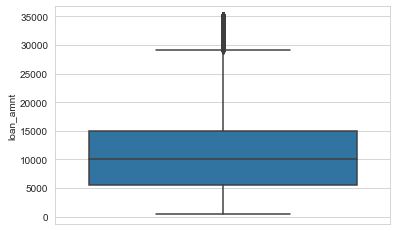

In [1394]:
## check the range of values in loan amt
sns.boxplot(y='loan_amnt',data=loan)

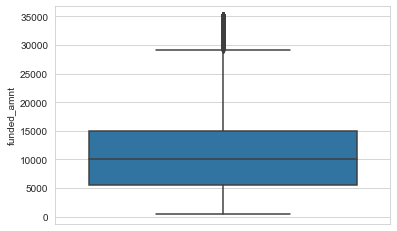

In [1395]:
## check the range of values in funded amount
sns.boxplot(y='funded_amnt',data=loan)

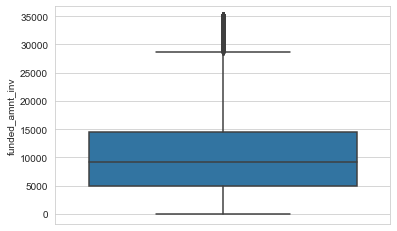

In [1396]:
## check the range of values in funded amount inv
sns.boxplot(y='funded_amnt_inv',data=loan)

From the above we can see the range of loan amount does not exceed 35,000 which is valid as per Lending club's model of providing loan upto 40,000

In [1397]:
## check the unique values in term
loan['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [1398]:
## check the values in the int rate as its a object type
loan['int_rate'].head()

1    15.27%
3    13.49%
4    12.69%
5     7.90%
6    15.96%
Name: int_rate, dtype: object

In [1399]:
## change the int rate to float by removing the % and converting to float
loan['int_rate']=loan['int_rate'].str.replace("%","")
loan['int_rate']=loan['int_rate'].astype(float)

In [1400]:
##  check the int rate again
loan['int_rate'].head()

1   15.27
3   13.49
4   12.69
5    7.90
6   15.96
Name: int_rate, dtype: float64

In [1401]:
loan['int_rate'].dtype

dtype('float64')

In [1402]:
## check the range of values in the int rate
loan['int_rate'].describe()

count   36558.00
mean       12.08
std         3.73
min         5.42
25%         9.32
50%        11.86
75%        14.65
max        24.40
Name: int_rate, dtype: float64

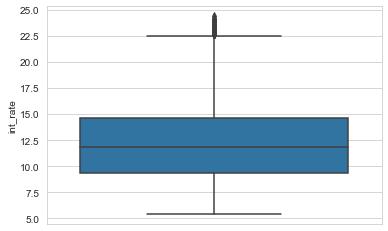

In [1403]:
## check if there are any outliers
sns.boxplot(y='int_rate',data=loan)

There are outlier values but they are valid as loan grades G1 to G5 have rates as high as 25%

In [1404]:
##  check the range of values in installment
loan['installment'].describe()

count   36558.00
mean      325.93
std       207.42
min        16.08
25%       168.71
50%       283.05
75%       431.77
max      1305.19
Name: installment, dtype: float64

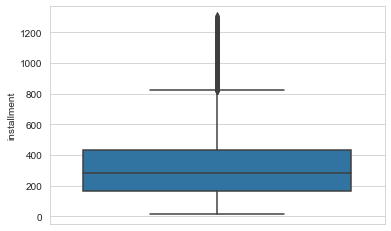

In [1405]:
##  check for any outliers 
sns.boxplot(y='installment',data=loan)

The outliers look valid as installments as high as $1300 are valid

In [1406]:
##  check the values in grade
loan['grade'].unique()

array(['C', 'B', 'A', 'E', 'D', 'F', 'G'], dtype=object)

In [1407]:
##  check the values in sub-grade
sorted(loan['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

There are no invalid values in the grad and subgrade columns

In [1408]:
##  check the values counts in emp_title
loan['emp_title'].value_counts().head(50)

US Army                            132
Bank of America                    108
IBM                                 66
AT&T                                59
Kaiser Permanente                   55
USAF                                54
Wells Fargo                         54
UPS                                 53
US Air Force                        51
Lockheed Martin                     44
Walmart                             44
U.S. Army                           41
State of California                 41
Verizon Wireless                    40
United States Air Force             40
USPS                                39
US ARMY                             38
Walgreens                           38
JP Morgan Chase                     37
Department of Defense               36
JPMorgan Chase                      36
Target                              35
Northrop Grumman                    34
Self Employed                       34
Booz Allen Hamilton                 34
US Navy                  

In [1409]:
##  convert the emp title to lower case and strip any leading and trailing spaces
loan['emp_title']=loan['emp_title'].str.lower()
loan['emp_title']=loan['emp_title'].str.strip()
loan['emp_title']=loan['emp_title'].str.replace('[^a-zA-Z0-9]', '')

In [1410]:
##  check the value counts again
loan1=loan['emp_title'].value_counts().sort_values(ascending=False).reset_index()
loan1.head(25)

index  emp_title
0                 usarmy        262
1          bankofamerica        138
2                walmart        114
3          jpmorganchase         96
4                    att         95
5           selfemployed         81
6        uspostalservice         77
7             wellsfargo         73
8             usairforce         72
9                    ibm         69
10      kaiserpermanente         68
11                  usps         65
12       verizonwireless         64
13                   ups         63
14                usnavy         59
15                  usaf         58
16                  self         56
17             walgreens         53
18        lockheedmartin         49
19     stateofcalifornia         48
20             homedepot         45
21  unitedstatesairforce         45
22   departmentofdefense         44
23        wellsfargobank         42
24               verizon         42

In [1411]:
##  create a dataframe with the emp titles to be changed
emp_title_change = pd.DataFrame([['128airrefuelingwingusaf', 'unitedstatesairforce'], ['16thmpbdeusarmy', 'unitedstatesarmy'], ['4gwirelessverizon', 'verizon'], ['914thusairforce', 'unitedstatesairforce'], ['accenturellp', 'accenture'], ['affederalgovernment', 'usgovernment'], ['airforce', 'unitedstatesairforce'], ['airforcedet3544thintelligencegroup', 'unitedstatesairforce'], ['alabamaarmynationalguard', 'unitedstatesarmy'], ['americanexpresscompany', 'americanexpress'], ['americanexpresstravel', 'americanexpress'], ['appleinc', 'apple'], ['army', 'unitedstatesarmy'], ['armyairforceexchangeservice', 'unitedstatesarmy'], ['armyfleetsupport', 'unitedstatesarmy'], ['armyfleetsuppport', 'unitedstatesarmy'], ['armynationalguard', 'unitedstatesarmy'], ['armynationalguardgedplusprogram', 'unitedstatesarmy'], ['athensclarkecountyunifiedgovernment', 'usgovernment'], ['attadvertisingsolutions', 'att'], ['attcalifornia', 'att'], ['attcommunications', 'att'], ['attgovernmentsolutions', 'att'], ['atthotelandconferencecenter', 'att'], ['atticacentralschooldistrict', 'att'], ['attinc', 'att'], ['attmobility', 'att'], ['attsbcillinois', 'att'], ['attservicesinc', 'att'], ['avanadeadivisionofaccenture', 'accenture'], ['baltimorecountygovernment', 'usgovernment'], ['banamexusa', 'americanexpress'], ['bankofamericacorp', 'bankofamerica'], ['bankofamericahomeloans', 'bankofamerica'], ['bankofamericamerchantservices', 'bankofamerica'], ['bankofamericamerrilllynch', 'bankofamerica'], ['belmontarmysurplus', 'unitedstatesarmy'], ['bestbuycoinc', 'bestbuy'], ['bestbuycorp', 'bestbuy'], ['bestbuyservicecenter615', 'bestbuy'], ['boozallenhamilton', 'boozallen'], ['boozallenhamiltoninc', 'boozallen'], ['browardcountygovernment', 'usgovernment'], ['cardiovascularresearchfoundationcolumbiauniversity', 'columbiauniversity'], ['careoneandselfemployed', 'selfemployed'], ['charlestoncountygovernment', 'usgovernment'], ['chugachgovernmentservices', 'usgovernment'], ['citi', 'citigroup'], ['citibank', 'citigroup'], ['citibankna', 'citigroup'], ['citibankprivatebanking', 'citigroup'], ['citicards', 'citigroup'], ['citicorp', 'citigroup'], ['citifinancial', 'citigroup'], ['citigroupinc', 'citigroup'], ['citigrouptechnologyinc', 'citigroup'], ['citimortgage', 'citigroup'], ['citimortgageinc', 'citigroup'], ['citiprivatebank', 'citigroup'], ['citygovernment', 'usgovernment'], ['citygovernmentofnewyork', 'usgovernment'], ['civilserviceusaf', 'unitedstatesairforce'], ['cnmigovernment', 'usgovernment'], ['cobbcountygovernmemt', 'usgovernment'], ['columbiauniversitymedicalcenter', 'columbiauniversity'], ['comcastcable', 'comcast'], ['comcastcablecorp', 'comcast'], ['comcastcorp', 'comcast'], ['comcastcorporation', 'comcast'], ['comcastentertainment', 'comcast'], ['comcastspotlight', 'comcast'], ['corpuschristiarmydepotusdod', 'unitedstatesarmy'], ['cvscaremark', 'cvs'], ['cvscaremarkromackinc', 'cvs'], ['cvsminuteclinic', 'cvs'], ['cvspharmacy', 'cvs'], ['cvstarr', 'cvs'], ['dcgovernment', 'usgovernment'], ['denverregionalcouncilofgovernments', 'usgovernment'], ['deparmentofhomelandsecurity', 'departmentofhomelandsecurity'], ['departmentofairforce', 'unitedstatesairforce'], ['departmentofarmy', 'unitedstatesarmy'], ['departmentofdefence', 'departmentofdefense'], ['departmentofdefenceusaf', 'departmentofdefense'], ['departmentofdefenseagency', 'departmentofdefense'], ['departmentofdefensearmy', 'unitedstatesarmy'], ['departmentofdefensedod', 'departmentofdefense'], ['departmentofdefenseeducationactivity', 'departmentofdefense'], ['departmentofdefensenavsea', 'departmentofdefense'], ['departmentofdefensenawctsd', 'departmentofdefense'], ['departmentofdefenseoig', 'departmentofdefense'], ['departmentofdefenseusnavy', 'departmentofdefense'], ['departmentofhomelandsecuritydhs', 'departmentofhomelandsecurity'], ['departmentofhomelandsecurityice', 'departmentofhomelandsecurity'], ['departmentofhomelandsecuritytsa', 'departmentofhomelandsecurity'], ['departmentofhomelansecurityice', 'departmentofhomelandsecurity'], ['departmentofnavy', 'usnavy'], ['departmentofthearmy', 'unitedstatesarmy'], ['departmentofthenavy', 'usnavy'], ['departmentofveteranaffairs', 'departmentofveteransaffairs'], ['departmentofveteransaffair', 'departmentofveteransaffairs'], ['departmentofveteransaffairsva', 'departmentofveteransaffairs'], ['departmentofveteranssaffairs', 'departmentofveteransaffairs'], ['depthomelandsecurity', 'departmentofhomelandsecurity'], ['deptofarmy', 'unitedstatesarmy'], ['deptofhomelandsecurity', 'departmentofhomelandsecurity'], ['deptofhomelandsecuritytsa', 'departmentofhomelandsecurity'], ['deptofnavynavalairsystemscommand', 'usnavy'], ['deptofnavynbhcnaspensacola', 'usnavy'], ['deptofpublicsocialservicesandhomedepot', 'homedepot'], ['deptoftheairforce', 'unitedstatesairforce'], ['deptofthearmy', 'unitedstatesarmy'], ['deptofthearmycivilian', 'unitedstatesarmy'], ['deptofthenavy', 'usnavy'], ['dhs', 'departmentofhomelandsecurity'], ['dhshomelandsecuritylawenforcement', 'departmentofhomelandsecurity'], ['dhsice', 'departmentofhomelandsecurity'], ['dhstsa', 'departmentofhomelandsecurity'], ['dod', 'departmentofdefense'], ['dodcivilian', 'departmentofdefense'], ['dodcivilservice', 'departmentofdefense'], ['dodcivilservise', 'departmentofdefense'], ['dodcivusarmy', 'unitedstatesarmy'], ['dodcomptrollerdivfinancebrc064d', 'departmentofdefense'], ['doddasg', 'departmentofdefense'], ['dodkansasairguard', 'departmentofdefense'], ['dodoig', 'departmentofdefense'], ['dodusairforce', 'departmentofdefense'], ['dodusarmycivilian', 'unitedstatesarmy'], ['dodusarmycorpsofengineers', 'unitedstatesarmy'], ['dodusnavy', 'departmentofdefense'], ['dodusncivilservice', 'departmentofdefense'], ['emcorgovernmentservices', 'usgovernment'], ['fairfaxcountygovernment', 'usgovernment'], ['federalgovernment', 'usgovernment'], ['federalgovernmentnlrbagency', 'usgovernment'], ['fidelity', 'fidelityinvestments'], ['fiswellsfargopsi', 'wellsfargo'], ['fivecountyassocofgovernments', 'usgovernment'], ['franchisetaxboardstateofcalifornia', 'stateofcalifornia'], ['frederickcountygovernment', 'usgovernment'], ['fultoncountygovernment', 'usgovernment'], ['gamestophomedepot', 'homedepot'], ['ge', 'generalelectric'], ['gecomcastnbcuniversal', 'comcast'], ['generalelectricaviation', 'generalelectric'], ['generalelectriccompany', 'generalelectric'], ['generalelectricenergy', 'generalelectric'], ['georgiaarmynationalguard', 'unitedstatesarmy'], ['georgiastategovernment', 'usgovernment'], ['gianteagleandretired', 'retired'], ['government', 'usgovernment'], ['governmentacquisitions', 'usgovernment'], ['governmentliquidation', 'usgovernment'], ['governmentofthedistrictofcolumbia', 'usgovernment'], ['gwinnettcountygovernment', 'usgovernment'], ['harfordcountygovernment', 'usgovernment'], ['harfordcountymarylandgovernment', 'usgovernment'], ['heardcountygovernment', 'usgovernment'], ['homelandsecureit', 'departmentofhomelandsecurity'], ['homelandsecurity', 'departmentofhomelandsecurity'], ['homelandsecuritysolutionsinc', 'departmentofhomelandsecurity'], ['homelandsecuritytsa', 'departmentofhomelandsecurity'], ['howardcountygovernment', 'usgovernment'], ['ibmaustin', 'ibm'], ['ibmcorp', 'ibm'], ['ibmcorporation', 'ibm'], ['ibminc', 'ibm'], ['ibmmicroelectronics', 'ibm'], ['ihsfederalgovernment', 'usgovernment'], ['illinoisarmynationalguard', 'unitedstatesarmy'], ['internalrevenueserviceirs', 'internalrevenueservice'], ['iredellcountygovernment', 'usgovernment'], ['irs', 'internalrevenueservice'], ['irsc', 'internalrevenueservice'], ['jpmorganchasebank', 'jpmorganchase'], ['jpmorganchasebankco', 'jpmorganchase'], ['jpmorganchasebankna', 'jpmorganchase'], ['jpmorganchaseco', 'jpmorganchase'], ['jpmorganchasest1', 'jpmorganchase'], ['kaiserp', 'kaiserpermanente'], ['kaiserpermanenete', 'kaiserpermanente'], ['kaiserpermanentee', 'kaiserpermanente'], ['kaiserpermanentehospital', 'kaiserpermanente'], ['kaiserpermanentemedicalcenter', 'kaiserpermanente'], ['kaiserpermanenteoakland', 'kaiserpermanente'], ['kaiserpermanentesouthpacificrehab', 'kaiserpermanente'], ['kaiserpermanetenw', 'kaiserpermanente'], ['kaiserpermante', 'kaiserpermanente'], ['kaiserpermenente', 'kaiserpermanente'], ['kaiserpermenete', 'kaiserpermanente'], ['kalamazoocountygovernment', 'usgovernment'], ['keypointgovernmentsolutions', 'usgovernment'], ['kforcelockheedmartin', 'lockheedmartin'], ['lacabanamexicanrestaurant', 'americanexpress'], ['lockheed', 'lockheedmartin'], ['lockheedmartinaeronautics', 'lockheedmartin'], ['lockheedmartinaeronauticscompany', 'lockheedmartin'], ['lockheedmartinaeronauticscorp', 'lockheedmartin'], ['lockheedmartinco', 'lockheedmartin'], ['lockheedmartincorp', 'lockheedmartin'], ['lockheedmartincorpaerotek', 'lockheedmartin'], ['lockheedmartincorpdcrinc', 'lockheedmartin'], ['lockheedmartincorporation', 'lockheedmartin'], ['lockheedmartinspacesystems', 'lockheedmartin'], ['lockheedmartinspacesystemscompany', 'lockheedmartin'], ['louisvillemetrogovernment', 'usgovernment'], ['lowescompanies', 'lowes'], ['lowescompaniesinc', 'lowes'], ['loweshiwinc', 'lowes'], ['loweshomecenter', 'lowes'], ['loweshomeimprovement', 'lowes'], ['loweshomeimprovementwarehouse', 'lowes'], ['loweshomeimprovment', 'lowes'], ['loweshwi', 'lowes'], ['lowesinc', 'lowes'], ['lowesincorporated', 'lowes'], ['lowesrdc961', 'lowes'], ['macyscom', 'macys'], ['macyseastinc', 'macys'], ['macysinc', 'macys'], ['mdarmynationalguard', 'unitedstatesarmy'], ['mecklenburgcountygovernment', 'usgovernment'], ['mediainfocusstudiosselfemployed', 'selfemployed'], ['merrilllynchbankofamerica', 'merrilllynch'], ['michiganschoolsgovernmentcredituni', 'usgovernment'], ['military', 'unitedstatesarmy'], ['militarybase', 'unitedstatesarmy'], ['militarycom', 'unitedstatesarmy'], ['militarypersonnelservicescorp', 'unitedstatesarmy'], ['militarysealiftcommand', 'unitedstatesarmy'], ['militaryusmc', 'unitedstatesarmy'], ['milwaukeecountygovernment', 'usgovernment'], ['mnarmynationalguard', 'unitedstatesarmy'], ['mobilehomedepot', 'homedepot'], ['montgomerycountygovernment', 'usgovernment'], ['moorecountygovernment', 'usgovernment'], ['morganstanelysmithbarney', 'morganstanleysmithbarney'], ['naselfemployed', 'selfemployed'], ['nationalgovernmentservices', 'usgovernment'], ['navalseasystemscommanddeptofnavy', 'usnavy'], ['navfacmidlantusgovernment', 'departmentofhomelandsecurity'], ['navy', 'usnavy'], ['navylist', 'usnavy'], ['nevadaarmynationalguard', 'unitedstatesarmy'], ['newjerseyarmynationalguard', 'unitedstatesarmy'], ['northropgrummanaerospacesystems', 'northropgrumman'], ['northropgrummancontinentalmaritime', 'northropgrumman'], ['northropgrummancorp', 'northropgrumman'], ['northropgrummancorporation', 'northropgrumman'], ['northropgrummaninformationsystems', 'northropgrumman'], ['northropgrummantechnicalservices', 'northropgrumman'], ['northroupgrumman', 'northropgrumman'], ['northroupgrummancorp', 'northropgrumman'], ['oharmynationalguard', 'unitedstatesarmy'], ['ohioarmynationalguard', 'unitedstatesarmy'], ['okarmynationalguard', 'unitedstatesarmy'], ['oregonarmynationalguard', 'unitedstatesarmy'], ['pamexinc', 'americanexpress'], ['pimacountygovernment', 'usgovernment'], ['pinkertongovernmentservices', 'usgovernment'], ['polkcountygovernment', 'usgovernment'], ['postalservice', 'unitedstatespostalservice'], ['pricewaterhousecoopersllc', 'pricewaterhousecoopers'], ['pricewaterhousecoopersllp', 'pricewaterhousecoopers'], ['princegeorgescountygovernment', 'usgovernment'], ['raytheoncompany', 'raytheon'], ['raytheonsas', 'raytheon'], ['raytheontechnicalservices', 'raytheon'], ['raytheontechnocalservices', 'raytheon'], ['realtorselfemployed', 'selfemployed'], ['redriverarmydepot', 'unitedstatesarmy'], ['researchfoundationofmentalhygeinecolumbiauniversity', 'columbiauniversity'], ['retireddisability', 'retired'], ['retiredfromhoosierenergy', 'retired'], ['retiredfromstateofflorida', 'retired'], ['retiredfromverizonnewjersey', 'retired'], ['retiredkcfdlowes', 'retired'], ['retirednypd', 'retired'], ['retiredselfemplyed', 'retired'], ['retiredveteran', 'retired'], ['rybxincselfemployed', 'selfemployed'], ['sandiegoassociationofgovernments', 'usgovernment'], ['self', 'selfemployed'], ['selfemp', 'selfemployed'], ['selfemployedcatedesign', 'selfemployed'], ['selfemployedconsultant', 'selfemployed'], ['selfemployedcounseling', 'selfemployed'], ['selfemployedcourtreporter', 'selfemployed'], ['selfemployedebayloanrequestistostartabusiness', 'selfemployed'], ['selfemployedichorinteractive', 'selfemployed'], ['selfemployedmassagetherapist', 'selfemployed'], ['selfemployedsince1981', 'selfemployed'], ['selfemployedthephotobuddy', 'selfemployed'], ['selfemployeed', 'selfemployed'], ['selfemployer', 'selfemployed'], ['sierraarmydepot', 'unitedstatesarmy'], ['socialsecurity', 'socialsecurityadministration'], ['socialsecurityadm', 'socialsecurityadministration'], ['socialsecurityadmin', 'socialsecurityadministration'], ['socialsecurityadministrationodar', 'socialsecurityadministration'], ['socialsecurityadministrationssa', 'socialsecurityadministration'], ['socialsecurityadminstration', 'socialsecurityadministration'], ['socialsecurityboard', 'socialsecurityadministration'], ['sprintcommunications', 'sprint'], ['startdancingselfemployed', 'selfemployed'], ['stateofca', 'stateofcalifornia'], ['stateofcadeptjuvenilejustice', 'stateofcalifornia'], ['stateofcaedd', 'stateofcalifornia'], ['stateofcalif', 'stateofcalifornia'], ['stateofcalifinhomesuportiveservice', 'stateofcalifornia'], ['stateofcaliforniacalpers', 'stateofcalifornia'], ['stateofcaliforniacaltrans', 'stateofcalifornia'], ['stateofcaliforniacdcr', 'stateofcalifornia'], ['stateofcaliforniachp', 'stateofcalifornia'], ['stateofcaliforniactapsco', 'stateofcalifornia'], ['stateofcaliforniadeptofpesticide', 'stateofcalifornia'], ['stateofcaliforniaepa', 'stateofcalifornia'], ['stateofcaliforniasanquentin', 'stateofcalifornia'], ['stateofcaliforniasecretaryofstate', 'stateofcalifornia'], ['stateofcaliforniaswrcb', 'stateofcalifornia'], ['straymondhs', 'departmentofhomelandsecurity'], ['targetcom', 'target'], ['targetcorp', 'target'], ['targetcorporation', 'target'], ['targetstores', 'target'], ['targetstoresinc', 'target'], ['teacherscollegecolumbiauniversity', 'columbiauniversity'], ['thefederalgovernmentorpostalservice', 'unitedstatespostalservice'], ['thehomedepot', 'homedepot'], ['thehomedepotinc', 'homedepot'], ['thehomedepotincusa', 'homedepot'], ['thehomedepotrdc5086', 'homedepot'], ['timewarner', 'timewarnercable'], ['timewarnerinc', 'timewarnercable'], ['tobyhannaarmydepot', 'unitedstatesarmy'], ['txarmynationalguard', 'unitedstatesarmy'], ['unitedparcelservice', 'ups'], ['unitedparcelservices', 'ups'], ['unitedparcelserviceups', 'ups'], ['unitedparcialservice', 'ups'], ['unitedsatesairforce', 'unitedstatesairforce'], ['unitedsatesarmy', 'unitedstatesarmy'], ['unitedstaesnavy', 'usnavy'], ['unitedstatearmy', 'unitedstatesarmy'], ['unitedstatepostalservice', 'unitedstatespostalservice'], ['unitedstatepostalservices', 'unitedstatespostalservice'], ['unitedstatesairforceacademy', 'unitedstatesairforce'], ['unitedstatesairforcedeptofdefense', 'unitedstatesairforce'], ['unitedstatesairforcedod', 'unitedstatesairforce'], ['unitedstatesarmynationalguard', 'unitedstatesarmy'], ['unitedstatescoastguard', 'uscoastguard'], ['unitedstatesdepartmentofdefence', 'departmentofdefense'], ['unitedstatesdepartmentofhomelandsec', 'departmentofhomelandsecurity'], ['unitedstatesdhs', 'departmentofhomelandsecurity'], ['unitedstatesgoverment', 'usgovernment'], ['unitedstatesgovernment', 'usgovernment'], ['unitedstatesgovernmentcdcniosh', 'usgovernment'], ['unitedstatesnavy', 'usnavy'], ['untiedstatespostalservice', 'unitedstatespostalservice'], ['upsaircargo', 'ups'], ['upsfreight', 'ups'], ['usaf', 'unitedstatesairforce'], ['usafcivilservice', 'unitedstatesairforce'], ['usafdod', 'unitedstatesairforce'], ['usaffederalemployee', 'unitedstatesairforce'], ['usafservices', 'unitedstatesairforce'], ['usairforce', 'unitedstatesairforce'], ['usairforceacademy', 'unitedstatesairforce'], ['usairforcecivilian', 'unitedstatesairforce'], ['usarmy', 'unitedstatesarmy'], ['usarmyactive', 'unitedstatesarmy'], ['usarmyauditagency', 'unitedstatesarmy'], ['usarmyaviationengineering', 'unitedstatesarmy'], ['usarmyciviliancontractor', 'unitedstatesarmy'], ['usarmycivilservice', 'unitedstatesarmy'], ['usarmycorpofengineers', 'unitedstatesarmy'], ['usarmycorpsengineers', 'unitedstatesarmy'], ['usarmycorpsofengineers', 'unitedstatesarmy'], ['usarmyengineerrdcenter', 'unitedstatesarmy'], ['usarmyintelligencecommand', 'unitedstatesarmy'], ['usarmylegalservicesagency', 'unitedstatesarmy'], ['usarmynationalguard', 'unitedstatesarmy'], ['usbankna', 'usbank'], ['usbanknatassc', 'usbank'], ['usdepartmentofdefense', 'departmentofdefense'], ['usdepartmentofhomelandsecurity', 'departmentofhomelandsecurity'], ['usdepartmentofveteranaffairs', 'departmentofveteransaffairs'], ['usdepartmentofveteransaffairs', 'departmentofveteransaffairs'], ['usdepofhomelandsecurity', 'departmentofhomelandsecurity'], ['usdeptofhomelandsecurity', 'departmentofhomelandsecurity'], ['usdeptofhomelandsecurityoig', 'departmentofhomelandsecurity'], ['usdhs', 'departmentofhomelandsecurity'], ['usfederalgovernment', 'usgovernment'], ['usfederalgovernmentgsa', 'usgovernment'], ['usfederalgovernmentnih', 'usgovernment'], ['usgovernmentdeptofhomelandsecuri', 'departmentofhomelandsecurity'], ['usgovernmentdhs', 'departmentofhomelandsecurity'], ['usgovernmentdodcivilian', 'usgovernment'], ['usgovernmentepa', 'usgovernment'], ['usgovernmentmaxwellafbal', 'usgovernment'], ['usgovertnment', 'usgovernment'], ['ushomelandsecurity', 'departmentofhomelandsecurity'], ['usmcmilitary', 'unitedstatesarmy'], ['usmilitary', 'unitedstatesarmy'], ['usmilitaryarmy', 'unitedstatesarmy'], ['usnavynorfolknavalshipyardfmb950', 'usnavy'], ['uspostal', 'unitedstatespostalservice'], ['uspostalinspectionservice', 'unitedstatespostalservice'], ['uspostalservice', 'unitedstatespostalservice'], ['uspostalservicesusps', 'unitedstatespostalservice'], ['uspostalserviceusps', 'unitedstatespostalservice'], ['uspostalservive', 'unitedstatespostalservice'], ['uspostalsvc', 'unitedstatespostalservice'], ['usps', 'unitedstatespostalservice'], ['uspsnashualdc', 'unitedstatespostalservice'], ['uspsnewsday', 'unitedstatespostalservice'], ['uspspostoffice', 'unitedstatespostalservice'], ['ussocialsecurityadministration', 'socialsecurityadministration'], ['verizonbusiness', 'verizon'], ['verizonbusinessntwrksvcsinc', 'verizon'], ['verizoncaliforniainc', 'verizon'], ['verizoncomm', 'verizon'], ['verizoncommunication', 'verizon'], ['verizoncommunications', 'verizon'], ['verizoncorporation', 'verizon'], ['verizonfederalinc', 'verizon'], ['verizoninc', 'verizon'], ['verizonservicescorp', 'verizon'], ['verizontelecom', 'verizon'], ['verizonwieless', 'verizon'], ['verizonwireles', 'verizon'], ['verizonwireless', 'verizon'], ['wachoviawellsfargo', 'wellsfargo'], ['walgreensco', 'walgreens'], ['walgreenshelpcenter', 'walgreens'], ['walgreensinfusionservices', 'walgreens'], ['walgreenspharmacy', 'walgreens'], ['walmartassociatesinc', 'walmart'], ['walmartcom', 'walmart'], ['walmartcorporate', 'walmart'], ['walmartcorporation', 'walmart'], ['walmartdc', 'walmart'], ['walmartdc6069', 'walmart'], ['walmartdc7033', 'walmart'], ['walmartdistribution', 'walmart'], ['walmartdistributioncenter', 'walmart'], ['walmartinformationsystemsdivision', 'walmart'], ['walmartpharmacy', 'walmart'], ['walmartsamsclub', 'walmart'], ['walmartstore', 'walmart'], ['walmartstores', 'walmart'], ['walmartstoresinc', 'walmart'], ['walmartstoresincsamsclub', 'walmart'], ['walmartsupercenter', 'walmart'], ['walmartsupercenter3391', 'walmart'], ['walmarttransportation', 'walmart'], ['walmartvisioncenter', 'walmart'], ['washingtonarmynationalguard', 'unitedstatesarmy'], ['weldcountygovernment', 'usgovernment'], ['wellsfa', 'wellsfargo'], ['wellsfargoadvisors', 'wellsfargo'], ['wellsfargoadvisorsllc', 'wellsfargo'], ['wellsfargoautofinance', 'wellsfargo'], ['wellsfargobank', 'wellsfargo'], ['wellsfargobankna', 'wellsfargo'], ['wellsfargocapitalfinance', 'wellsfargo'], ['wellsfargocorporation', 'wellsfargo'], ['wellsfargofanancial', 'wellsfargo'], ['wellsfargofinancial', 'wellsfargo'], ['wellsfargofoothill', 'wellsfargo'], ['wellsfargohomemortgage', 'wellsfargo'], ['wellsfargoinsuranceservices', 'wellsfargo'], ['wellsfargoinsuranceservicesusainc', 'wellsfargo'], ['wellsfargoinvestments', 'wellsfargo'], ['wellsfargomortgage', 'wellsfargo'], ['wellsfargoteksystems', 'wellsfargo'], ['wellsfargowachovia', 'wellsfargo'], ['wellsfarobank', 'wellsfargo'], ['westernriversidecouncilofgovernments', 'usgovernment'], ['winnarmycommhospital', 'unitedstatesarmy'], ['wvarmynationalguard', 'unitedstatesarmy'], ['zwirelessverizonwirelesspremiumreta', 'verizon']],columns=['emp_title','emp_title_chng'])

In [1412]:
##  check if the dataframe is created ok
emp_title_change.head()

emp_title        emp_title_chng
0  128airrefuelingwingusaf  unitedstatesairforce
1          16thmpbdeusarmy      unitedstatesarmy
2        4gwirelessverizon               verizon
3          914thusairforce  unitedstatesairforce
4             accenturellp             accenture

In [1413]:
##  check the shape of the dataframe
loan.shape

(36558, 46)

In [1414]:
##  merge the loan and emp title change dataframe on emp title
loan=loan.merge(emp_title_change,on='emp_title',how='left')
loan.head(100)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077430    1314167       2500         2500          2500.00   60 months   
1   1076863    1277178      10000        10000         10000.00   36 months   
2   1075358    1311748       3000         3000          3000.00   60 months   
3   1075269    1311441       5000         5000          5000.00   36 months   
4   1069639    1304742       7000         7000          7000.00   60 months   
5   1072053    1288686       3000         3000          3000.00   36 months   
6   1071570    1306721       5375         5375          5350.00   60 months   
7   1070078    1305201       6500         6500          6500.00   60 months   
8   1069908    1305008      12000        12000         12000.00   36 months   
9   1064687    1298717       9000         9000          9000.00   36 months   
10  1069866    1304956       3000         3000          3000.00   36 months   
11  1069057    1303503      10000        10000         10000.00   36 months   
12  1069759    1304871       1000         1000          1000.00   36 months   
13  1065775    1299699      10000        10000         10000.00   36 months   
14  1069971    1304884       3600         3600          3600.00   36 months   
15  1062474    1294539       6000         6000          6000.00   36 months   
16  1069742    1304855       9200         9200          9200.00   36 months   
17  1069740    1284848      20250        20250         19142.16   60 months   
18  1039153    1269083      21000        21000         21000.00   36 months   
19  1069710    1304821      10000        10000         10000.00   36 months   
20  1069700    1304810      10000        10000         10000.00   36 months   
21  1069559    1304634       6000         6000          6000.00   36 months   
22  1069697    1273773      15000        15000         15000.00   36 months   
23  1069800    1304679      15000        15000          8725.00   36 months   
24  1069657    1304764       5000         5000          5000.00   60 months   
25  1069799    1304678       4000         4000          4000.00   36 months   
26  1047704    1278806       8500         8500          8500.00   36 months   
27  1069539    1304608      31825        31825         31825.00   36 months   
28  1065420    1299514      10000        10000          9975.00   60 months   
29  1069591    1304289       5000         5000          5000.00   36 months   
30  1069530    1291365       7000         7000          7000.00   36 months   
31  1069522    1304589      12400        12400         12400.00   36 months   
32  1069361    1304255      10800        10800         10800.00   36 months   
33  1069357    1304251      15000        15000         15000.00   36 months   
34  1069356    1304250       6000         6000          6000.00   36 months   
35  1069346    1304237      12500        12500         12475.00   60 months   
36  1067573    1301955       9600         9600          9600.00   36 months   
37  1069506    1304567      12000        12000         12000.00   36 months   
38  1060578    1292332       4400         4400          4400.00   36 months   
39  1069469    1304526       6000         6000          6000.00   36 months   
40  1051117    1282787      14000        14000         14000.00   36 months   
41  1069465    1304521       5000         5000          5000.00   36 months   
42  1069283    1304166      10000        10000         10000.00   36 months   
43  1069287    1304171      10000        10000         10000.00   36 months   
44  1069453    1303701      11000        11000         11000.00   36 months   
45  1069248    1304123      15000        15000         15000.00   36 months   
46  1068120    1302485      25600        25600         25350.00   36 months   
47  1069244    1304117       7000         7000          7000.00   36 months   
48  1069243    1304116      12000        12000         12000.00   36 months   
49  1069238    1303909      12000        12000         1200

In [1415]:
## check the loan shape that no rows are dropped
loan.shape

(36558, 47)

In [1416]:
##  fill the emp title change that are nulll after the merge with the actual emp title
loan['emp_title_chng']=loan['emp_title_chng'].fillna(loan['emp_title'])
loan.head(50)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077430    1314167       2500         2500          2500.00   60 months   
1   1076863    1277178      10000        10000         10000.00   36 months   
2   1075358    1311748       3000         3000          3000.00   60 months   
3   1075269    1311441       5000         5000          5000.00   36 months   
4   1069639    1304742       7000         7000          7000.00   60 months   
5   1072053    1288686       3000         3000          3000.00   36 months   
6   1071570    1306721       5375         5375          5350.00   60 months   
7   1070078    1305201       6500         6500          6500.00   60 months   
8   1069908    1305008      12000        12000         12000.00   36 months   
9   1064687    1298717       9000         9000          9000.00   36 months   
10  1069866    1304956       3000         3000          3000.00   36 months   
11  1069057    1303503      10000        10000         10000.00   36 months   
12  1069759    1304871       1000         1000          1000.00   36 months   
13  1065775    1299699      10000        10000         10000.00   36 months   
14  1069971    1304884       3600         3600          3600.00   36 months   
15  1062474    1294539       6000         6000          6000.00   36 months   
16  1069742    1304855       9200         9200          9200.00   36 months   
17  1069740    1284848      20250        20250         19142.16   60 months   
18  1039153    1269083      21000        21000         21000.00   36 months   
19  1069710    1304821      10000        10000         10000.00   36 months   
20  1069700    1304810      10000        10000         10000.00   36 months   
21  1069559    1304634       6000         6000          6000.00   36 months   
22  1069697    1273773      15000        15000         15000.00   36 months   
23  1069800    1304679      15000        15000          8725.00   36 months   
24  1069657    1304764       5000         5000          5000.00   60 months   
25  1069799    1304678       4000         4000          4000.00   36 months   
26  1047704    1278806       8500         8500          8500.00   36 months   
27  1069539    1304608      31825        31825         31825.00   36 months   
28  1065420    1299514      10000        10000          9975.00   60 months   
29  1069591    1304289       5000         5000          5000.00   36 months   
30  1069530    1291365       7000         7000          7000.00   36 months   
31  1069522    1304589      12400        12400         12400.00   36 months   
32  1069361    1304255      10800        10800         10800.00   36 months   
33  1069357    1304251      15000        15000         15000.00   36 months   
34  1069356    1304250       6000         6000          6000.00   36 months   
35  1069346    1304237      12500        12500         12475.00   60 months   
36  1067573    1301955       9600         9600          9600.00   36 months   
37  1069506    1304567      12000        12000         12000.00   36 months   
38  1060578    1292332       4400         4400          4400.00   36 months   
39  1069469    1304526       6000         6000          6000.00   36 months   
40  1051117    1282787      14000        14000         14000.00   36 months   
41  1069465    1304521       5000         5000          5000.00   36 months   
42  1069283    1304166      10000        10000         10000.00   36 months   
43  1069287    1304171      10000        10000         10000.00   36 months   
44  1069453    1303701      11000        11000         11000.00   36 months   
45  1069248    1304123      15000        15000         15000.00   36 months   
46  1068120    1302485      25600        25600         25350.00   36 months   
47  1069244    1304117       7000         7000          7000.00   36 months   
48  1069243    1304116      12000        12000         12000.00   36 months   
49  1069238    1303909      12000        12000         1200

In [1417]:
## drop the employee title column and rename the revised title column as the emp title column
loan.drop(columns=['emp_title'],inplace=True)
loan=loan.rename(columns={'emp_title_chng':'emp_title'})
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500          2500.00   60 months   
1  1076863    1277178      10000        10000         10000.00   36 months   
2  1075358    1311748       3000         3000          3000.00   60 months   
3  1075269    1311441       5000         5000          5000.00   36 months   
4  1069639    1304742       7000         7000          7000.00   60 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     15.27        59.83     C        C4   < 1 year           RENT   
1     13.49       339.31     C        C1  10+ years           RENT   
2     12.69        67.79     B        B5     1 year           RENT   
3      7.90       156.46     A        A4    3 years           RENT   
4     15.96       170.08     C        C5    8 years           RENT   

   annual_inc verification_status issue_d  loan_status             purpose  \
0    30000.00     Source Verified  Dec-11  Charged Off                 car   
1    49200.00     Source Verified  Dec-11   Fully Paid               other   
2    80000.00     Source Verified  Dec-11      Current               other   
3    36000.00     Source Verified  Dec-11   Fully Paid             wedding   
4    47004.00        Not Verified  Dec-11   Fully Paid  debt_consolidation   

  zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    309xx         GA  1.00            0           Apr-99               5   
1    917xx         CA 20.00            0           Feb-96               1   
2    972xx         OR 17.94            0           Jan-96               0   
3    852xx         AZ 11.20            0           Nov-04               3   
4    280xx         NC 23.51            0           Jul-05               1   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0       1687      9.40%          4                   f   
1        10        0       5598        21%         37                   f   
2        15        0      27783     53.90%         38                   f   
3         9        0       7963     28.30%         12                   f   
4         7        0      17726     85.60%         11                   f   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00      1008.71          1008.71           456.46   
1       0.00           0.00     12231.89         12231.89         10000.00   
2     524.06         524.06      3513.33          3513.33          2475.94   
3       0.00           0.00      5632.21          5632.21          5000.00   
4       0.00           0.00     10110.84         10110.84          6985.61   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         435.17                0.00      117.08                     1.11   
1        2214.92               16.97        0.00                     0.00   
2        1037.39                0.00        0.00                     0.00   
3         632.21                0.00        0.00                     0.00   
4        3125.23                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt  policy_code application_type  acc_now_delinq  \
0       Apr-13           119.66            1       INDIVIDUAL               0   
1       Jan-15           357.48            1       INDIVIDUAL               0   
2       May-16            67.79            1       INDIVIDUAL               0   
3       Jan-15           161.03            1       INDIVIDUAL               0   
4       May-16          1313.76            1       INDIVIDUAL               0   

   delinq_amnt  pub_rec_bankruptcies                emp_title  
0            0                  0.00                    ryder  
1            0                  0.00        airresourcesboard  
2            0                  0.00   universitymedicalgroup  
3            0                  0.00      veolia

In [1418]:
##  check the value counts again
loan['emp_title'].value_counts()

unitedstatesarmy                                                        446
unitedstatespostalservice                                               203
unitedstatesairforce                                                    203
walmart                                                                 160
wellsfargo                                                              157
selfemployed                                                            157
bankofamerica                                                           155
verizon                                                                 144
att                                                                     116
jpmorganchase                                                           114
usgovernment                                                            112
ups                                                                     112
usnavy                                                                  106
departmentof

We can see that the value changed after converting to lower case

In [1419]:
##  check the unique values in emp_length
loan['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years', 'Unknown'],
      dtype=object)

In [1420]:
##  check the value counts in emp length
loan['emp_length'].value_counts()

10+ years    8416
2 years      4184
< 1 year     4060
3 years      3921
4 years      3305
5 years      3140
1 year       3036
6 years      2123
7 years      1698
8 years      1408
9 years      1211
Unknown        56
Name: emp_length, dtype: int64

In [1421]:
## check the unique values in home ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [1422]:
## check the range of values in the annual income
loan['annual_inc'].describe()

count     36558.00
mean      69226.43
std       63463.68
min        4000.00
25%       41918.50
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

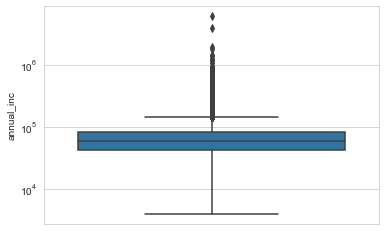

In [1423]:
##  check the outliers in the annual inc
sns.boxplot(y='annual_inc',data=loan)
plt.yscale('log')
plt.show()

There are significant number of outliers possibly due to incorrect details provided by the borrower

In [1424]:
##  There are outliers with very high annnual income in the range of millions
np.percentile(loan['annual_inc'],99)

230000.0

In [1425]:
loan.shape

(36558, 46)

In [1426]:
## Remove the outliers on annual inc beyond 99 percentile
loan=loan[~(loan['annual_inc'] > np.percentile(loan['annual_inc'],99))]

In [1427]:
## check the range of values in the annual income
loan['annual_inc'].describe()

count    36200.00
mean     65892.83
std      34542.45
min       4000.00
25%      41400.00
50%      59500.00
75%      81600.00
max     230000.00
Name: annual_inc, dtype: float64

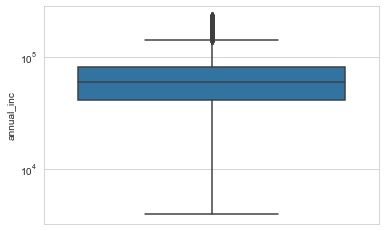

In [1428]:
##  check the outliers in the annual inc
sns.boxplot(y='annual_inc',data=loan)
plt.yscale('log')
plt.show()

The range looks much better after removing the  major outliers

In [1429]:
loan.shape

(36200, 46)

In [1430]:
## check the unique values in the verification status
loan['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [1431]:
## check the format of the issue date
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [1432]:
## convert the issue date string to datetime format
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [1433]:
## check the max value to know the upper range
loan['issue_d'].max()

Timestamp('2011-12-01 00:00:00')

In [1434]:
## check the min value to know the lower range
loan['issue_d'].min()

Timestamp('2007-08-01 00:00:00')

In [1435]:
## check the unique values in the purpose column to identify if there are any duplicates or invalid values
loan['purpose'].unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [1436]:
## check the unique values in the zip code
loan['zip_code'].unique()

array(['309xx', '917xx', '972xx', '852xx', '280xx', '900xx', '774xx',
       '853xx', '913xx', '245xx', '606xx', '951xx', '641xx', '921xx',
       '067xx', '890xx', '770xx', '335xx', '799xx', '605xx', '103xx',
       '150xx', '326xx', '564xx', '080xx', '330xx', '974xx', '934xx',
       '405xx', '946xx', '445xx', '850xx', '604xx', '292xx', '088xx',
       '029xx', '700xx', '010xx', '441xx', '104xx', '061xx', '616xx',
       '947xx', '914xx', '765xx', '980xx', '017xx', '752xx', '787xx',
       '077xx', '540xx', '225xx', '440xx', '437xx', '559xx', '912xx',
       '325xx', '300xx', '923xx', '352xx', '013xx', '146xx', '074xx',
       '786xx', '937xx', '331xx', '115xx', '191xx', '114xx', '908xx',
       '902xx', '992xx', '750xx', '950xx', '329xx', '226xx', '614xx',
       '802xx', '672xx', '083xx', '100xx', '926xx', '931xx', '860xx',
       '712xx', '707xx', '342xx', '895xx', '430xx', '919xx', '996xx',
       '891xx', '935xx', '801xx', '928xx', '233xx', '927xx', '970xx',
       '211xx', '303

Zip codes are only partial. Hence will not be useful in our analysis

In [1437]:
## check the unique values in the address state and identify any invalid values
loan['addr_state'].unique()

array(['GA', 'CA', 'OR', 'AZ', 'NC', 'TX', 'VA', 'IL', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'SD', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN'], dtype=object)

In [1438]:
## check the range of the dti to identify any anomalies
loan['dti'].describe()

count   36200.00
mean       13.50
std         6.63
min         0.00
25%         8.43
50%        13.60
75%        18.73
max        29.99
Name: dti, dtype: float64

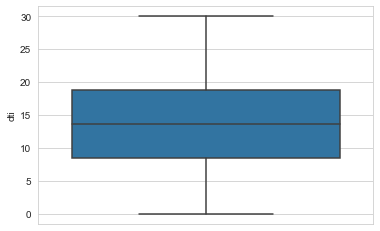

In [1439]:
## check if there are any outliers
sns.boxplot(y='dti',data=loan)

dti seems to be in the expected range

In [1440]:
## check if there are any unexpected values in number of delinquencies in 2 years
loan['delinq_2yrs'].describe()

count   36200.00
mean        0.15
std         0.49
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        11.00
Name: delinq_2yrs, dtype: float64

In [1441]:
##  check the format of the earliest credit line date
loan['earliest_cr_line'].head()

0    Apr-99
1    Feb-96
2    Jan-96
3    Nov-04
4    Jul-05
Name: earliest_cr_line, dtype: object

In [1442]:
##  convert the earliest credit line to datetime format
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['earliest_cr_line'].head()

0   1999-04-01
1   1996-02-01
2   1996-01-01
3   2004-11-01
4   2005-07-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [1443]:
## check the max value of the earliest credit line
loan['earliest_cr_line'].max()

Timestamp('2068-12-01 00:00:00')

In [1444]:
## check the min value of the earliest credit line
loan['earliest_cr_line'].min()

Timestamp('1969-02-01 00:00:00')

In [1445]:
loan['earliest_cr_line'].dt.year.unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 1981, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1973, 1979, 1987, 1982, 1978, 1971,
       1972, 1970, 1969, 1975, 1976, 1977, 2068, 1974, 2067, 2063, 2065,
       2066, 2062, 2056, 2046, 2050, 2064, 2054], dtype=int64)

There are earliest credit line values that are in the future. This is incorrect

In [1446]:
##  check the number of rows with earliest credit line date greater than the issue date
loan[loan['earliest_cr_line'].dt.year > loan['issue_d'].dt.year].shape

(48, 46)

In [1447]:
##  check the  rows with earliest credit line date greater than the issue date
loan[loan['earliest_cr_line'] > loan['issue_d']][['issue_d','earliest_cr_line','delinq_2yrs']]

issue_d earliest_cr_line  delinq_2yrs
1666  2011-12-01       2068-09-01            2
3084  2011-11-01       2067-09-01            0
3205  2011-11-01       2067-06-01            0
4193  2011-10-01       2063-03-01            0
4749  2011-10-01       2068-08-01            0
5296  2011-10-01       2065-05-01            0
5986  2011-10-01       2068-06-01            0
6934  2011-09-01       2065-10-01            0
6966  2011-09-01       2066-04-01            1
7061  2011-09-01       2068-09-01            0
7897  2011-09-01       2067-04-01            0
8295  2011-08-01       2067-04-01            0
8540  2011-08-01       2063-10-01            0
10524 2011-07-01       2067-07-01            0
10570 2011-07-01       2062-09-01            0
11239 2011-07-01       2066-11-01            0
12021 2011-07-01       2065-05-01            0
13051 2011-06-01       2056-09-01            0
13146 2011-06-01       2046-01-01            0
14251 2011-05-01       2050-12-01            0
14450 2011-05-01       2068-01-01            0
15822 2011-04-01       2068-02-01            0
16410 2011-03-01       2066-02-01            0
17527 2011-03-01       2064-09-01            0
17553 2011-03-01       2065-10-01            0
18091 2011-02-01       2066-11-01            0
19333 2011-01-01       2068-08-01            0
19660 2011-01-01       2068-08-01            0
19684 2011-01-01       2068-12-01            0
20569 2010-12-01       2054-11-01            1
23079 2010-10-01       2062-09-01            0
23465 2010-10-01       2065-12-01            0
24082 2010-09-01       2067-11-01            0
24529 2010-08-01       2066-11-01            0
24664 2010-08-01       2063-09-01            0
25170 2010-08-01       2062-11-01            0
27596 2010-06-01       2063-01-01            3
28744 2010-04-01       2067-10-01            0
29940 2010-02-01       2067-05-01            0
30707 2010-01-01       2067-02-01            0
30928 2010-01-01       2066-03-01            0
33454 2009-07-01       2067-07-01            0
33462 2009-07-01       2068-02-01            0
33566 2009-07-01       2067-04-01            0
34331 2009-05-01       2068-01-01            0
34905 2009-03-01       2066-12-01            0
34942 2009-03-01       2068-10-01            0
35053 2009-02-01       2067-09-01            0

In [1448]:
##  if the earliest credit line date is greater than issue date then consider the issue date as the earliest credit line date.
##  if there is a delinquency in then last 2 years then subtract 2 years from the issue date.  
loan['earliest_cr_line_chng']=loan.apply(lambda x: x.earliest_cr_line if x.earliest_cr_line <= x.issue_d else (x.issue_d if x.delinq_2yrs == 0 else x.issue_d - pd.DateOffset(years=2)), axis=1)

In [1449]:
## check of the earliest credit line column is created as per above expectation
loan[loan['earliest_cr_line'] > loan['issue_d']][['issue_d','earliest_cr_line','delinq_2yrs','earliest_cr_line_chng']]

issue_d earliest_cr_line  delinq_2yrs earliest_cr_line_chng
1666  2011-12-01       2068-09-01            2            2009-12-01
3084  2011-11-01       2067-09-01            0            2011-11-01
3205  2011-11-01       2067-06-01            0            2011-11-01
4193  2011-10-01       2063-03-01            0            2011-10-01
4749  2011-10-01       2068-08-01            0            2011-10-01
5296  2011-10-01       2065-05-01            0            2011-10-01
5986  2011-10-01       2068-06-01            0            2011-10-01
6934  2011-09-01       2065-10-01            0            2011-09-01
6966  2011-09-01       2066-04-01            1            2009-09-01
7061  2011-09-01       2068-09-01            0            2011-09-01
7897  2011-09-01       2067-04-01            0            2011-09-01
8295  2011-08-01       2067-04-01            0            2011-08-01
8540  2011-08-01       2063-10-01            0            2011-08-01
10524 2011-07-01       2067-07-01            0            2011-07-01
10570 2011-07-01       2062-09-01            0            2011-07-01
11239 2011-07-01       2066-11-01            0            2011-07-01
12021 2011-07-01       2065-05-01            0            2011-07-01
13051 2011-06-01       2056-09-01            0            2011-06-01
13146 2011-06-01       2046-01-01            0            2011-06-01
14251 2011-05-01       2050-12-01            0            2011-05-01
14450 2011-05-01       2068-01-01            0            2011-05-01
15822 2011-04-01       2068-02-01            0            2011-04-01
16410 2011-03-01       2066-02-01            0            2011-03-01
17527 2011-03-01       2064-09-01            0            2011-03-01
17553 2011-03-01       2065-10-01            0            2011-03-01
18091 2011-02-01       2066-11-01            0            2011-02-01
19333 2011-01-01       2068-08-01            0            2011-01-01
19660 2011-01-01       2068-08-01            0            2011-01-01
19684 2011-01-01       2068-12-01            0            2011-01-01
20569 2010-12-01       2054-11-01            1            2008-12-01
23079 2010-10-01       2062-09-01            0            2010-10-01
23465 2010-10-01       2065-12-01            0            2010-10-01
24082 2010-09-01       2067-11-01            0            2010-09-01
24529 2010-08-01       2066-11-01            0            2010-08-01
24664 2010-08-01       2063-09-01            0            2010-08-01
25170 2010-08-01       2062-11-01            0            2010-08-01
27596 2010-06-01       2063-01-01            3            2008-06-01
28744 2010-04-01       2067-10-01            0            2010-04-01
29940 2010-02-01       2067-05-01            0            2010-02-01
30707 2010-01-01       2067-02-01            0            2010-01-01
30928 2010-01-01       2066-03-01            0            2010-01-01
33454 2009-07-01       2067-07-01            0            2009-07-01
33462 2009-07-01       2068-02-01            0            2009-07-01
33566 2009-07-01       2067-04-01            0            2009-07-01
34331 2009-05-01       2068-01-01            0            2009-05-01
34905 2009-03-01       2066-12-01            0            2009-03-01
34942 2009-03-01       2068-10-01            0            2009-03-01
35053 2009-02-01       2067-09-01            0            2009-02-01

In [1450]:
##  check the range of values in the inquiry in the last 6 months
loan['inq_last_6mths'].describe()

count   36200.00
mean        0.86
std         1.06
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         8.00
Name: inq_last_6mths, dtype: float64

In [1451]:
##  check the range of values in the inquiry in the last 6 months
loan['open_acc'].describe()

count   36200.00
mean        9.33
std         4.36
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64

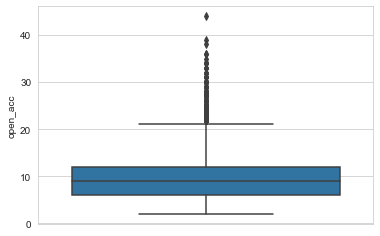

In [1452]:
## check if there are any outliers
sns.boxplot(y='open_acc',data=loan)

In [1453]:
loan[loan['open_acc']>12].shape

(7537, 47)

There are significant number of borrowers who have more than 75% percentile(12 open accounts). Assuming this is valid

In [1454]:
## check the range of the pub records
loan['pub_rec'].describe()

count   36200.00
mean        0.05
std         0.24
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: pub_rec, dtype: float64

In [1455]:
# check the range of the revolving balance
loan['revol_bal'].describe()

count    36200.00
mean     13230.73
std      15251.56
min          0.00
25%       3801.00
50%       8959.00
75%      17035.00
max     149588.00
Name: revol_bal, dtype: float64

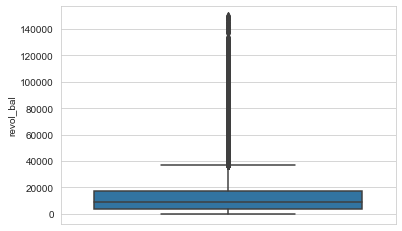

In [1456]:
##  check for outliers in the revolving balance
sns.boxplot(y='revol_bal',data=loan)

In [1457]:
loan[loan['revol_bal'] > 100000][['revol_bal','annual_inc','open_acc']]

revol_bal  annual_inc  open_acc
1385      131949   180000.00         9
1402      124744   160000.00        17
1438      106406   120000.00        13
2429      101287   125000.00        16
2983      103754    72000.00        10
3008      110856   110000.00        17
3108      101553   172000.00        20
3179      123416   156000.00        13
3232      100428   131000.00         7
3329      112522   133000.00        10
3359      101144   180000.00        15
3381      105240   111239.96        10
3506      140967    72000.00        10
3629      106176   175000.00         9
3635      108339    49772.64        11
3700      116354   125000.00        16
3923      131006   228000.00        18
4034      106307   120000.00        10
4084      103774   110256.00         8
4131      116794   148350.00        17
4173      117243   160000.00        17
4431      125027    80796.00         7
4896      106296   150000.00        16
5359      101058   170004.00        10
5494      108024   120000.00         9
5509      111638   120000.00         8
5726      109990   170000.00        19
6182      119126   175000.00        17
6183      128872   135000.00         9
6432      145384   125000.00         7
6861      116244   110000.00        12
7189      102330   220000.00        12
7259      116063   150000.00        11
7655      116686   120000.00         7
7804      115901   200000.00        18
7930      130869   160000.00         6
8054      105032   200000.00         7
8229      115836   120000.00        16
8242      109993   198204.00        13
8533      145518   120000.00        14
8778      101716   202000.00        10
9108      104406   127035.00        13
9113      114641   180000.00        20
9203      107192    76800.00         9
9529      107504   155000.00        15
9748      105845    96000.00        12
10204     111796   150000.00         9
10294     129821   160000.00        10
10453     129071   225000.00        10
10575     122129   184000.00        22
10652     101423   186600.00        12
10692     125558   170000.00        11
11148     149588   200000.00        14
11508     120206   230000.00        18
11564     137661   180000.00        17
11722     123980   150000.00        17
11970     113674   154000.00         7
12003     147365   160000.00        19
12310     147897   137004.00        18
12372     118847   230000.00        18
12388     131767   141000.00        14
12441     137143   180000.00        17
12480     103883   105000.00         8
13081     142650   180000.00        13
13186     133264   159996.00        12
13198     110856   140000.00        14
13216     146472   205000.00        10
13260     113658   160000.00         5
13456     106585   100904.00         4
13459     107671   115000.00        14
14089     147750   204996.00        10
14200     149000    91000.00         7
14601     120691   150600.00        17
14646     118412   130000.00        11
14952     103323   180000.00        13
15401     126502   150000.00        10
15402     127882   110000.00        18
16427     105730   185000.00         9
16518     103777   150000.00        13
16717     138552   225000.00        14
16765     113680   150000.00         8
16952     123611   146775.00        14
17016     130105    80000.00         5
17101     119970   160000.00         9
17196     111611    82000.00        15
17328     104304   125000.00        13
17805     101429    74000.00        12
18139     129538   145000.00        12
19104     113671   140004.00         9
19121     140820   170000.00         8
19275     133920    86400.00        13
19324     100796   140000.00         9
19376     108433   165000.00        12
19562     109241    96000.00         9
19851     127215    79200.00        14
20051     106053   200000.00         8
20124     117958    66000.00         7
20234     113272    78996.00        15
20337     107021   160000.00        17
20351     106527   120000.00         8
20410     143151    48000.00         7
20867     122791    90000.00 

Most of the higher revolving balances are with people with high annual income. However there are exceptions. So no reason to consider the outliers as invalid

In [1458]:
## check the format of the revol-util
loan['revol_util'].head()

0     9.40%
1       21%
2    53.90%
3    28.30%
4    85.60%
Name: revol_util, dtype: object

In [1459]:
## conver the revol util to float by removing the % and then converting to float
loan['revol_util']=loan['revol_util'].str.replace("%","")
loan['revol_util']=loan['revol_util'].astype(float)
loan['revol_util'].head()

0    9.40
1   21.00
2   53.90
3   28.30
4   85.60
Name: revol_util, dtype: float64

In [1460]:
##  check the number of total accounts
loan['total_acc'].describe()

count   36200.00
mean       22.15
std        11.33
min         2.00
25%        14.00
50%        21.00
75%        29.00
max        90.00
Name: total_acc, dtype: float64

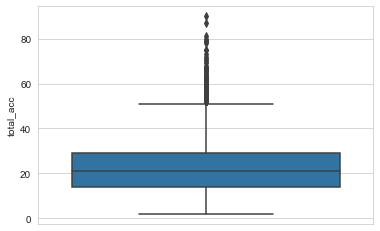

In [1461]:
##  check if there are any outliers
sns.boxplot(y='total_acc',data=loan)

Borrowers have close to 40 accounts also.  So no clear inference to say that 90 accounts is invalid

In [1462]:
## check the unique values in initial list status
loan['initial_list_status'].unique()

array(['f'], dtype=object)

In [1463]:
##  check the format of the last paymnt date
loan['last_pymnt_d'].head()

0    Apr-13
1    Jan-15
2    May-16
3    Jan-15
4    May-16
Name: last_pymnt_d, dtype: object

In [1464]:
##  convert the last payment date to datetime format
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')
loan['last_pymnt_d'].head()

0   2013-04-01
1   2015-01-01
2   2016-05-01
3   2015-01-01
4   2016-05-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [1465]:
## check the max value of the last payment date
loan['last_pymnt_d'].max()

Timestamp('2016-05-01 00:00:00')

In [1466]:
## check the min value of the last payment date
loan['last_pymnt_d'].min()

Timestamp('2008-05-01 00:00:00')

In [1467]:
loan['last_pymnt_d'].dt.year.unique()

array([2013, 2015, 2016, 2012, 2011, 2014, 2010, 2009, 2008], dtype=int64)

In [1468]:
## check the unique values in policy code
loan['policy_code'].unique()

array([1], dtype=int64)

In [1469]:
## check the unique values in application type
loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [1470]:
## check the range of values in account now delinq
loan['acc_now_delinq'].describe()

count   36200.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: acc_now_delinq, dtype: float64

In [1471]:
## check the range of values in deling amount
loan['delinq_amnt'].describe()

count   36200.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: delinq_amnt, dtype: float64

The initial list status, policy code, acc now delinq, delin amount do not have details perform analysis. So these can be removed

In [1472]:
loan.drop(columns=['zip_code','initial_list_status','policy_code','acc_now_delinq','delinq_amnt','application_type'],inplace=True)
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'emp_title',
       'earliest_cr_line_chng'],
      dtype='object')

In [1473]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36200 entries, 0 to 36557
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       36200 non-null  int64         
 1   member_id                36200 non-null  int64         
 2   loan_amnt                36200 non-null  int64         
 3   funded_amnt              36200 non-null  int64         
 4   funded_amnt_inv          36200 non-null  float64       
 5   term                     36200 non-null  object        
 6   int_rate                 36200 non-null  float64       
 7   installment              36200 non-null  float64       
 8   grade                    36200 non-null  object        
 9   sub_grade                36200 non-null  object        
 10  emp_length               36200 non-null  object        
 11  home_ownership           36200 non-null  object        
 12  annual_inc               36200 n

In [1474]:
##  Save the cleaned dataframe to a csv
loan.to_csv('loan_clean.csv',index=False)

# Prep for Analysis

In [1475]:
# load the cleaned file into a dataframe
loan_df = pd.read_csv("loan_clean.csv",low_memory=False,parse_dates=['issue_d','earliest_cr_line','earliest_cr_line_chng','last_pymnt_d'])

In [1476]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36200 entries, 0 to 36199
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       36200 non-null  int64         
 1   member_id                36200 non-null  int64         
 2   loan_amnt                36200 non-null  int64         
 3   funded_amnt              36200 non-null  int64         
 4   funded_amnt_inv          36200 non-null  float64       
 5   term                     36200 non-null  object        
 6   int_rate                 36200 non-null  float64       
 7   installment              36200 non-null  float64       
 8   grade                    36200 non-null  object        
 9   sub_grade                36200 non-null  object        
 10  emp_length               36200 non-null  object        
 11  home_ownership           36200 non-null  object        
 12  annual_inc               36200 n

In [1477]:
##  check if the dataframe is loaded fime
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500          2500.00   60 months   
1  1076863    1277178      10000        10000         10000.00   36 months   
2  1075358    1311748       3000         3000          3000.00   60 months   
3  1075269    1311441       5000         5000          5000.00   36 months   
4  1069639    1304742       7000         7000          7000.00   60 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     15.27        59.83     C        C4   < 1 year           RENT   
1     13.49       339.31     C        C1  10+ years           RENT   
2     12.69        67.79     B        B5     1 year           RENT   
3      7.90       156.46     A        A4    3 years           RENT   
4     15.96       170.08     C        C5    8 years           RENT   

   annual_inc verification_status    issue_d  loan_status             purpose  \
0    30000.00     Source Verified 2011-12-01  Charged Off                 car   
1    49200.00     Source Verified 2011-12-01   Fully Paid               other   
2    80000.00     Source Verified 2011-12-01      Current               other   
3    36000.00     Source Verified 2011-12-01   Fully Paid             wedding   
4    47004.00        Not Verified 2011-12-01   Fully Paid  debt_consolidation   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         GA  1.00            0       1999-04-01               5         3   
1         CA 20.00            0       1996-02-01               1        10   
2         OR 17.94            0       1996-01-01               0        15   
3         AZ 11.20            0       2004-11-01               3         9   
4         NC 23.51            0       2005-07-01               1         7   

   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0       1687        9.40          4       0.00           0.00   
1        0       5598       21.00         37       0.00           0.00   
2        0      27783       53.90         38     524.06         524.06   
3        0       7963       28.30         12       0.00           0.00   
4        0      17726       85.60         11       0.00           0.00   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      1008.71          1008.71           456.46         435.17   
1     12231.89         12231.89         10000.00        2214.92   
2      3513.33          3513.33          2475.94        1037.39   
3      5632.21          5632.21          5000.00         632.21   
4     10110.84         10110.84          6985.61        3125.23   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00      117.08                     1.11   2013-04-01   
1               16.97        0.00                     0.00   2015-01-01   
2                0.00        0.00                     0.00   2016-05-01   
3                0.00        0.00                     0.00   2015-01-01   
4                0.00        0.00                     0.00   2016-05-01   

   last_pymnt_amnt  pub_rec_bankruptcies                emp_title  \
0           119.66                  0.00                    ryder   
1           357.48                  0.00        airresourcesboard   
2            67.79                  0.00   universitymedicalgroup   
3           161.03                  0.00      veoliatransportaton   
4          1313.76                  0.00  southernstarphotography   

  earliest_cr_line_chng  
0            1999-04-01  
1            1996-02-01  
2            1996-01-01  
3            2004-11-01  
4            2005-07-01

In [1478]:
loan_df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [1479]:
##  Get the total % of loans in each status
loan_df.groupby('loan_status')['loan_status'].count()/loan_df['loan_status'].shape*100

loan_status
Charged Off   13.76
Current        2.91
Fully Paid    83.33
Name: loan_status, dtype: float64

In [1480]:
## select only the loans with charged-off and Fully paid for the analysis. Drop the loans in Current status
loan_df = loan_df[~(loan_df['loan_status']=='Current')]

In [1481]:
##  create a loan status category for Good loan and Bad loan based on status.  Charged off is Bad loan and other 2 statuses are good loan
loan_df['status_catg'] = loan_df['loan_status'].apply(lambda x: "Bad Loan" if x=='Charged Off' else "Good Loan")

In [1482]:
##  Get the total % of loans in each status
loan_df.groupby('status_catg')['status_catg'].count()/loan_df['status_catg'].shape*100

status_catg
Bad Loan    14.18
Good Loan   85.82
Name: status_catg, dtype: float64

In [1483]:
###  https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx

loan_df['inc_catg']=loan_df['annual_inc'].apply(lambda x: "Low inc" if x<=40000 else ("Middle inc" if x<=125000 else "High inc"))

In [1484]:
## create bins for the loan amount range
cut_labels = ['0K-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K','25K-30K', '30K-35K','35K-40K']
loan_df['loan_amnt_range']=pd.cut(loan_df['loan_amnt'], bins=np.linspace(0,40000,9),labels=cut_labels)

In [1485]:
##  create bins for the interest rate
cut_labels = ['0-5', '5-10', '10-15', '15-20', '20-25']
loan_df['int_rate_range']=pd.cut(loan_df['int_rate'], bins=np.linspace(0,25,6),labels=cut_labels)

In [1486]:
##  create a column for the issue year from the issue date
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x: x.year)

In [1487]:
## add a column for the number of months between issue date and last paymnt date
loan_df['mths_issue_last_pymnt'] = loan_df['last_pymnt_d'] - loan_df['issue_d']
loan_df['mths_issue_last_pymnt'] = (loan_df['mths_issue_last_pymnt'] /np.timedelta64(1,'M')).astype(int)

In [1488]:
### get the unique values in emp_length
loan_df['emp_length'].unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years',
       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years',
       'Unknown'], dtype=object)

In [1489]:
### create buckets for emp_length 
loan_df['emp_length_range']=loan_df['emp_length']
loan_df.loc[loan_df['emp_length'].isin(['1 year','2 years','3 years']),'emp_length_range']='1-3 years'
loan_df.loc[loan_df['emp_length'].isin(['4 years','5 years','6 years']),'emp_length_range']='4-6 years'
loan_df.loc[loan_df['emp_length'].isin(['7 years','8 years','9 years']),'emp_length_range']='7-9 years'

In [1490]:
### check the new emp length values
loan_df['emp_length_range'].unique()

array(['< 1 year', '10+ years', '1-3 years', '7-9 years', '4-6 years',
       'Unknown'], dtype=object)

In [1491]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500          2500.00   60 months   
1  1076863    1277178      10000        10000         10000.00   36 months   
3  1075269    1311441       5000         5000          5000.00   36 months   
4  1069639    1304742       7000         7000          7000.00   60 months   
5  1072053    1288686       3000         3000          3000.00   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     15.27        59.83     C        C4   < 1 year           RENT   
1     13.49       339.31     C        C1  10+ years           RENT   
3      7.90       156.46     A        A4    3 years           RENT   
4     15.96       170.08     C        C5    8 years           RENT   
5     18.64       109.43     E        E1    9 years           RENT   

   annual_inc verification_status    issue_d  loan_status             purpose  \
0    30000.00     Source Verified 2011-12-01  Charged Off                 car   
1    49200.00     Source Verified 2011-12-01   Fully Paid               other   
3    36000.00     Source Verified 2011-12-01   Fully Paid             wedding   
4    47004.00        Not Verified 2011-12-01   Fully Paid  debt_consolidation   
5    48000.00     Source Verified 2011-12-01   Fully Paid                 car   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         GA  1.00            0       1999-04-01               5         3   
1         CA 20.00            0       1996-02-01               1        10   
3         AZ 11.20            0       2004-11-01               3         9   
4         NC 23.51            0       2005-07-01               1         7   
5         CA  5.35            0       2007-01-01               2         4   

   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0       1687        9.40          4       0.00           0.00   
1        0       5598       21.00         37       0.00           0.00   
3        0       7963       28.30         12       0.00           0.00   
4        0      17726       85.60         11       0.00           0.00   
5        0       8221       87.50          4       0.00           0.00   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      1008.71          1008.71           456.46         435.17   
1     12231.89         12231.89         10000.00        2214.92   
3      5632.21          5632.21          5000.00         632.21   
4     10110.84         10110.84          6985.61        3125.23   
5      3939.14          3939.14          3000.00         939.14   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00      117.08                     1.11   2013-04-01   
1               16.97        0.00                     0.00   2015-01-01   
3                0.00        0.00                     0.00   2015-01-01   
4                0.00        0.00                     0.00   2016-05-01   
5                0.00        0.00                     0.00   2015-01-01   

   last_pymnt_amnt  pub_rec_bankruptcies                emp_title  \
0           119.66                  0.00                    ryder   
1           357.48                  0.00        airresourcesboard   
3           161.03                  0.00      veoliatransportaton   
4          1313.76                  0.00  southernstarphotography   
5           111.34                  0.00            mkcaccounting   

  earliest_cr_line_chng status_catg    inc_catg loan_amnt_range  \
0            1999-04-01    Bad Loan     Low inc           0K-5K   
1            1996-02-01   Good Loan  Middle inc          5K-10K   
3            2004-11-01   Good Loan     Low inc           0K-5K   
4            2005-07-01   Good Loan  Middle inc          5K-10K   
5            2007-01-01   Good Loan  Middle inc           0K-5K   

  int_rate_range  issue_year  mths_issue_last

In [1492]:
##  Common function to plot bar chart with annotation
def Plot_bar_chart_annot(pv,x,y,xlabel,ylabel,title,num_or_perc):

    fig, ax = plt.subplots()
    plot1=ax.bar(pv[x],pv[y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    for rect in plot1:
        height = rect.get_height()
        if num_or_perc == '%':
            fmt = '{0:0.0f}%'
        else:
            fmt = '{0:0.0f}'
        ax.annotate(fmt.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    plt.show()   

In [1493]:
## ##  Common function to plot bar chart with annotation with rotation option for labels
def Plot_bar_chart_annot_rot(pv,x,y,xlabel,ylabel,title,num_or_perc,rot=0):

    fig, ax = plt.subplots(figsize=(10,5))
    plot1=ax.bar(pv[x],pv[y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rot)

    for rect in plot1:
        height = rect.get_height()
        if num_or_perc == '%':
            fmt = '{0:0.0f}%'
        else:
            fmt = '{0:0.0f}'
        ax.annotate(fmt.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    plt.show() 

In [1494]:
## ##  Common function to plot stacked bar chart chart with annotation with rotation option for labels
def Plot_stacked_bar_chart_annot(pv,xlabel,ylabel,title,num_or_perc,rot=0):
    
    fig, axes = plt.subplots(figsize=(10,5))
    
    ax=pv.plot(kind="bar",stacked = True, ax=axes)

    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
    
        # The padding is NOT pixels, it's whatever your axis is.
        # So this means pad by half an animal
        padding = 0.1

        # The width of the bar is also not pixels, it's the
        # number of animals. So we can use it as the label!
        if num_or_perc == '%':
            fmt = '{0:0.0f}%'
        else:
            fmt = '{0:0.0f}'
            
        label_text = fmt.format(height*100)
    
        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2
        ax.text(label_x, label_y, label_text, ha='right', va='center')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rot)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

# Loan Analysis

## Loan general insights

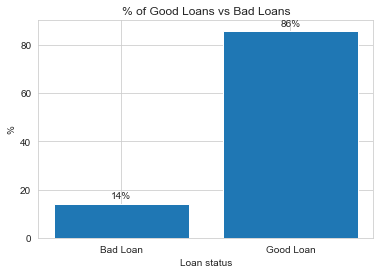

In [1495]:
p_stats=loan_df.pivot_table(index='status_catg',values='id',aggfunc='count').apply(lambda x: x/x.sum()*100)
p_stats.reset_index(inplace=True)
Plot_bar_chart_annot(p_stats,'status_catg','id','Loan status','%','% of Good Loans vs Bad Loans','%')

## Insights
1. Out of the overall loans issued 86% are Good loans and 14% are Bad Loans

#### Analyze the trend of the loans over the years

Text(0.5, 0.98, 'Distribution of Loan amnt, Funded amnt, Funded amnt by Investors')

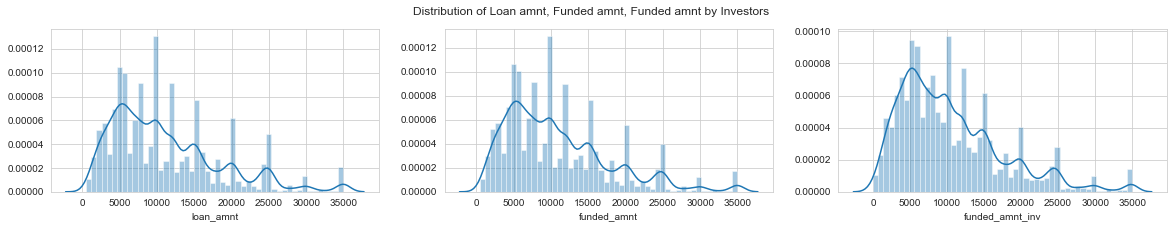

In [1496]:
## check the distribution of the loan amount, funded amount and funded amount by investors
f, axes = plt.subplots(1,3,figsize=(20,3))
sns.distplot(loan_df['loan_amnt'],kde=True,ax=axes[0])
sns.distplot(loan_df['funded_amnt'],kde=True,ax=axes[1])
sns.distplot(loan_df['funded_amnt_inv'],kde=True,ax=axes[2])
plt.suptitle("Distribution of Loan amnt, Funded amnt, Funded amnt by Investors")

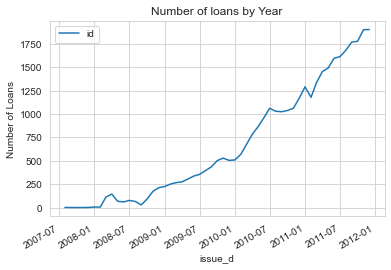

In [1497]:
## check the the trend of loan issuance over the years
loan_df.groupby('issue_d').agg({'id':'count'}).plot.line()
plt.title("Number of loans by Year")
plt.ylabel("Number of Loans")
plt.show()

In [1498]:
## get the number of loans issued by issue year and loan status
p1 = loan_df.pivot_table(index='issue_year', columns='status_catg', values='id', aggfunc='count', fill_value=0)
p1

status_catg  Bad Loan  Good Loan
issue_year                      
2007                2          4
2008              159        889
2009              547       3837
2010             1315       9416
2011             2959      16018

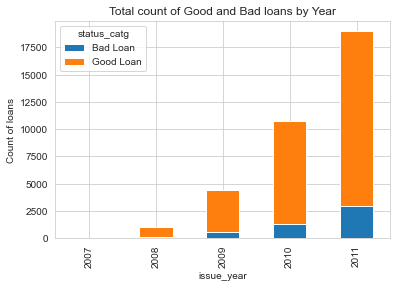

In [1499]:
## plot the number of loans issued across the years
p1.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Year")
plt.show()

In [1500]:
## calculate the % of the bad loans by year
p1['Bad_loan_perc'] = p1['Bad Loan']/(p1['Bad Loan']+p1['Good Loan'])*100
p1.reset_index(inplace=True)
p1

status_catg  issue_year  Bad Loan  Good Loan  Bad_loan_perc
0                  2007         2          4          33.33
1                  2008       159        889          15.17
2                  2009       547       3837          12.48
3                  2010      1315       9416          12.25
4                  2011      2959      16018          15.59

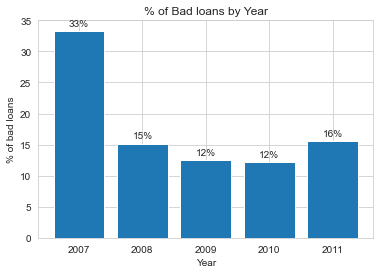

In [1501]:
## plot the % of bad loans by year
Plot_bar_chart_annot(p1,'issue_year','Bad_loan_perc','Year','% of bad loans',"% of Bad loans by Year","%")

## Insights
1. The distribution between loan applied and loan funded by LC are similar which means the borrowers received the loans that they applied for
2. Lending club was founded in 2006.  The number of loans issued has steadily increased over the years. Only very minimal data is available for 2007
3. The % of bad loans have been increasing since 2009 and being the highest in 2011. The % of bad loans in 2008 is not comparable to 2011 as the volume was much lesser

## Loan amount analysis

In [1502]:
## get the number of loans issued by loan amount range and loan status
p_loan = loan_df.pivot_table(index='loan_amnt_range', columns='status_catg', values='id', aggfunc='count', fill_value=0)
p_loan

status_catg      Bad Loan  Good Loan
loan_amnt_range                     
0K-5K                1126       7333
5K-10K               1460      10266
10K-15K               948       6211
15K-20K               688       3332
20K-25K               472       2054
25K-30K               133        505
30K-35K               155        463

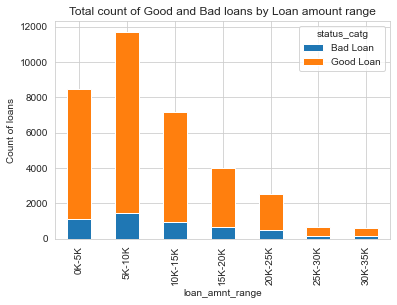

In [1503]:
## plot the number of loans issued by the loan amount range
p_loan.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Loan amount range")
plt.show()

In [1504]:
## calculate the % of the bad loans by loan amount range
p_loan['Total'] = p_loan['Bad Loan']+p_loan['Good Loan']
p_loan['Total_perc'] = p_loan['Total']/sum(p_loan['Total'])*100
p_loan['Bad_loan_perc'] = p_loan['Bad Loan']/(p_loan['Bad Loan']+p_loan['Good Loan'])*100
p_loan.reset_index(inplace=True)
p_loan

status_catg loan_amnt_range  Bad Loan  Good Loan  Total  Total_perc  \
0                     0K-5K      1126       7333   8459       24.07   
1                    5K-10K      1460      10266  11726       33.36   
2                   10K-15K       948       6211   7159       20.37   
3                   15K-20K       688       3332   4020       11.44   
4                   20K-25K       472       2054   2526        7.19   
5                   25K-30K       133        505    638        1.82   
6                   30K-35K       155        463    618        1.76   

status_catg  Bad_loan_perc  
0                    13.31  
1                    12.45  
2                    13.24  
3                    17.11  
4                    18.69  
5                    20.85  
6                    25.08

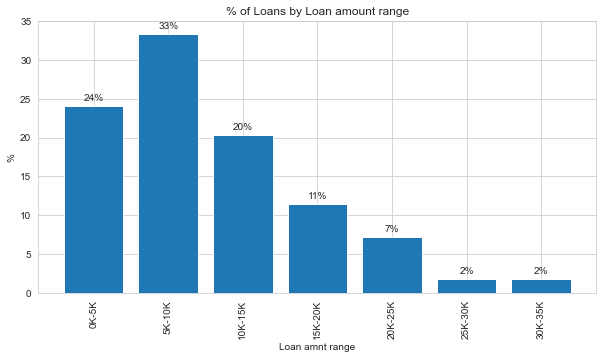

In [1505]:
## plot the % of loans by year
Plot_bar_chart_annot_rot(p_loan,'loan_amnt_range','Total_perc','Loan amnt range','%',"% of Loans by Loan amount range","%",90)

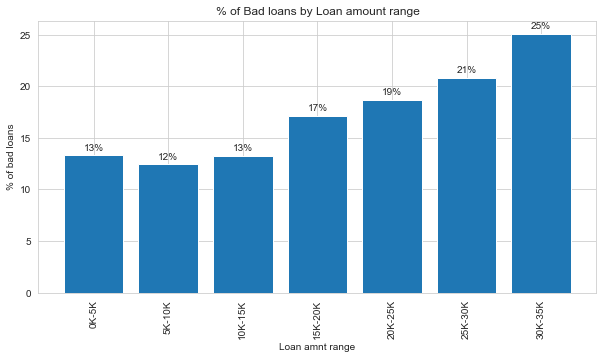

In [1506]:
## plot the % of bad loans by year
Plot_bar_chart_annot_rot(p_loan,'loan_amnt_range','Bad_loan_perc','Loan amnt range','% of bad loans',"% of Bad loans by Loan amount range","%",90)

## Insights
1. 57% of the loans are issued in the upto 10K range and 77% loans in the upto 15K range
2. 4% % of loans are issued in the 25-35K loan range
3. Number of loans issued decreases with increase in loan amount
4. 12% to 13% loans are bad loans in 0-15K loan ranges
5. 17% to 25% loans are bad loans in the 15K to 35K loan ranges
6. There is a 12% risk variance between 30-35K loans and 0-5K loan amounts

## Loan term analysis

#### Analyze the bad loans related to the Loan term and loan range

In [1507]:
## get the number of loans issued by term and loan status
p2 = loan_df.pivot_table(index='term', columns='status_catg', values='id', aggfunc='count', fill_value=0)
p2

status_catg  Bad Loan  Good Loan
term                            
 36 months       2766      23466
 60 months       2216       6698

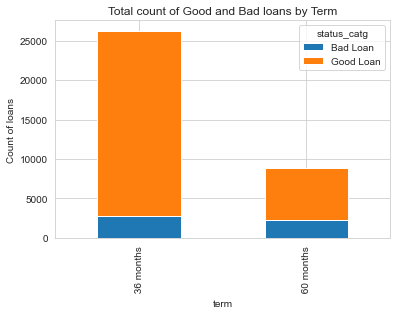

In [1508]:
## plot the number of loans issued by term and loan status
p2.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Term")
plt.show()

In [1509]:
## calculate the % of the bad loans and % of total loans by term
p2['Total'] = p2['Bad Loan']+p2['Good Loan']
p2['Total_perc'] = p2['Total']/sum(p2['Total'])*100
p2['Bad_loan_perc'] = p2['Bad Loan']/(p2['Bad Loan']+p2['Good Loan'])*100
p2.reset_index(inplace=True)
p2

status_catg        term  Bad Loan  Good Loan  Total  Total_perc  Bad_loan_perc
0             36 months      2766      23466  26232       74.64          10.54
1             60 months      2216       6698   8914       25.36          24.86

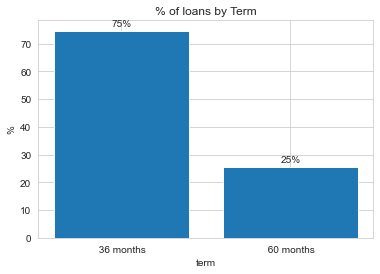

In [1510]:
## plot the % of loans by term
Plot_bar_chart_annot(p2,'term','Total_perc','term','%','% of loans by Term','%')

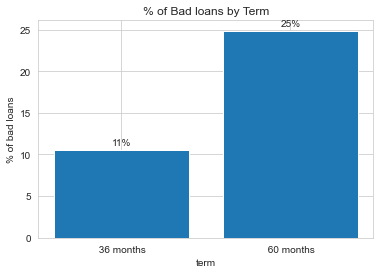

In [1511]:
## plot the % of bad loans by term
Plot_bar_chart_annot(p2,'term','Bad_loan_perc','term','% of bad loans','% of Bad loans by Term','%')

###  Loan term and loan amount

In [1512]:
## get the % of loans by term and loan amount range
p_ptam= pd.crosstab(loan_df['term'], loan_df['loan_amnt_range'],normalize='index')
p_ptam

loan_amnt_range  0K-5K  5K-10K  10K-15K  15K-20K  20K-25K  25K-30K  30K-35K
term                                                                       
 36 months        0.29    0.37     0.19     0.09     0.05     0.01     0.01
 60 months        0.11    0.21     0.24     0.20     0.14     0.05     0.05

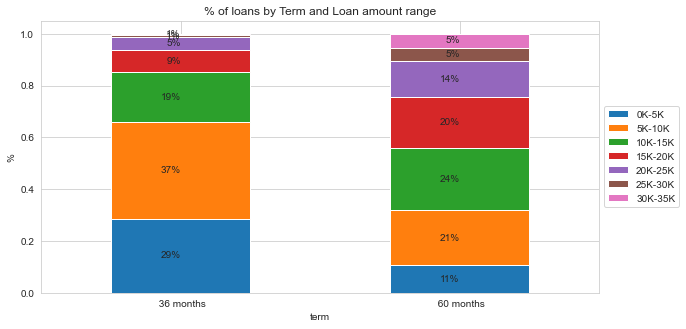

In [1513]:
## plot the % of loans by term and loan amount range
Plot_stacked_bar_chart_annot(p_ptam,'term','%','% of loans by Term and Loan amount range','%',0)

In [1514]:
## ## calculate the % of the bad loans by term and loan amount range
p_tamt = loan_df.pivot_table(index=['term','loan_amnt_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_tamt=p_tamt.reset_index()
df_tamt['Bad_loan_perc'] =   df_tamt['Bad Loan']/(df_tamt['Bad Loan']+df_tamt['Good Loan'])
df_tamt.sort_values(by='Bad_loan_perc',ascending=False)

status_catg        term loan_amnt_range  Bad Loan  Good Loan  Bad_loan_perc
13            60 months         30K-35K       142        326           0.30
11            60 months         20K-25K       323        917           0.26
10            60 months         15K-20K       452       1302           0.26
12            60 months         25K-30K       116        341           0.25
7             60 months           0K-5K       235        707           0.25
8             60 months          5K-10K       454       1453           0.24
9             60 months         10K-15K       494       1652           0.23
0             36 months           0K-5K       891       6626           0.12
4             36 months         20K-25K       149       1137           0.12
3             36 months         15K-20K       236       2030           0.10
1             36 months          5K-10K      1006       8813           0.10
5             36 months         25K-30K        17        164           0.09
2             36 months         10K-15K       454       4559           0.09
6             36 months         30K-35K        13        137           0.09

In [1515]:
## pivot the dataframe into a heatmap format
p_tamt = df_tamt.pivot_table(index=['term'], columns=['loan_amnt_range'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_tamt

loan_amnt_range  0K-5K  5K-10K  10K-15K  15K-20K  20K-25K  25K-30K  30K-35K
term                                                                       
 36 months          11      10        9       10       11        9        8
 60 months          24      23       23       25       26       25       30

Text(0.5, 1.0, '% of bad loans by Term and Loan range')

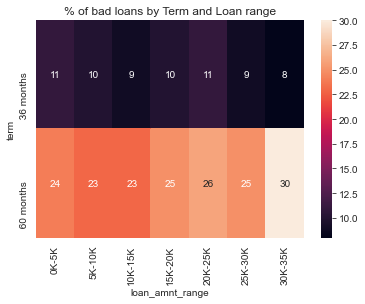

In [1516]:
## plot the heatmap to show the bad loan % by term and loan amount
sns.heatmap(p_tamt,annot=True)
plt.title("% of bad loans by Term and Loan range")

## Insights
1. 75% of the loans are issued with a term of 36 months 
2. 25% of the 60 month loans are Bad loans. Only 11% of the 30 month loans are bad loans
3. Only 56% of 60 month loans are issued in the 0-15K loan range. 85% of 30 month loans are issued in the 0-15K loan range
4. All loan amount ranges issued with 60 month have higher % of bad loans vs the 30  month. 
5. The highest risk is 30% bad loans in 60 month & 30-35K loans are bad loans.  The least risk is 8% bad loans 36-month & 30-35K loans
6. The risk variance between highest and least risk combinations is 22%

## Interest rate analysis

#### Analyze the bad loans related to the Interest range and other related fields

In [1517]:
## get the number of loans issued by interest rate range and loan status
p_int = loan_df.pivot_table(index='int_rate_range', columns='status_catg', values='id', aggfunc='count', fill_value=0)

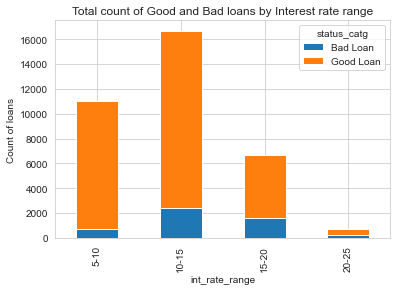

In [1518]:
## plot the number of loans and percentage issued by interest rate change and loan status
p_int.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Interest rate range")
plt.show()

In [1519]:
## calculate the % of the bad loans and % of total loans by interest rate range
p_int['Total'] = p_int['Bad Loan']+p_int['Good Loan']
p_int['Total_perc'] = p_int['Total']/sum(p_int['Total'])*100
p_int['Bad_loan_perc'] = p_int['Bad Loan']/(p_int['Bad Loan']+p_int['Good Loan'])*100
p_int.reset_index(inplace=True)
p_int

status_catg int_rate_range  Bad Loan  Good Loan  Total  Total_perc  \
0                     5-10       695      10369  11064       31.48   
1                    10-15      2385      14292  16677       47.45   
2                    15-20      1634       5067   6701       19.07   
3                    20-25       268        436    704        2.00   

status_catg  Bad_loan_perc  
0                     6.28  
1                    14.30  
2                    24.38  
3                    38.07

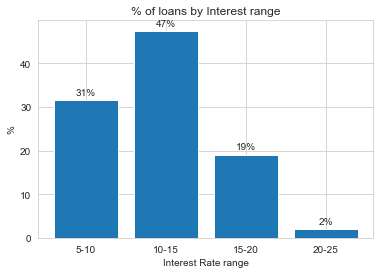

In [1520]:
## plot the % of loans by loan interest rate
Plot_bar_chart_annot(p_int,'int_rate_range','Total_perc','Interest Rate range','%','% of loans by Interest range','%')

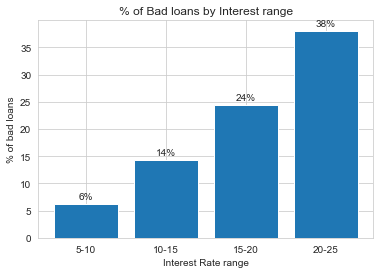

In [1521]:
## plot the % of bad loans by loan interest rate
Plot_bar_chart_annot(p_int,'int_rate_range','Bad_loan_perc','Interest Rate range','% of bad loans','% of Bad loans by Interest range','%')

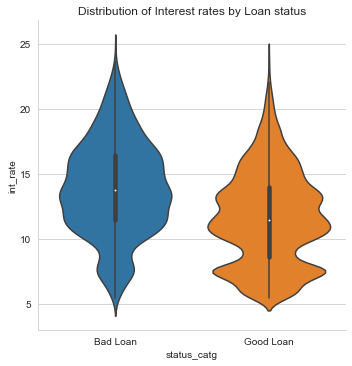

In [1522]:
## get the distribution of interest rates in the good and bad loans
sns.catplot(x='status_catg',y='int_rate',kind='violin',data=loan_df)
plt.title("Distribution of Interest rates by Loan status")
plt.show()

## Insights
1. 78% of the loans are issued in the 5-15% Interest rate. 19% are issued in the 15-20% interest rate and only 2% are issued in the 20-25% range
2.The distribution of bad loans are high in the 12% to 16% interest rate range.
3. The % of bad loans increase with the increase in interest range.  Lowest being 6% of bad loans in 5-10% interest rate and highest being 38% of the loans in 20-25% range.  
4. The risk variance between highest and least risky interest rate ranges is 32%. 

### Interest rate and Term

In [1523]:
## determine the average interest rate by term
p_ite = loan_df.pivot_table(index='term',values='int_rate',aggfunc='mean')
p_ite.reset_index(inplace=True)
p_ite

term  int_rate
0   36 months     11.02
1   60 months     14.76

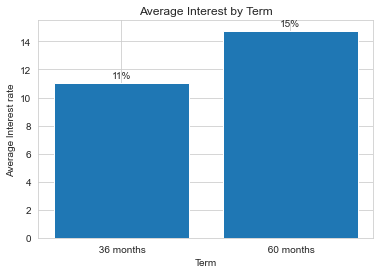

In [1524]:
Plot_bar_chart_annot(p_ite,'term','int_rate','Term','Average Interest rate','Average Interest by Term','%')

In [1525]:
## get the % of loans by interest rate range and term
p_ite = pd.crosstab(loan_df['term'], loan_df['int_rate_range'],values='id',aggfunc='count',normalize='index')
p_ite

int_rate_range  5-10  10-15  15-20  20-25
term                                     
 36 months      0.39   0.49   0.11   0.00
 60 months      0.08   0.43   0.42   0.07

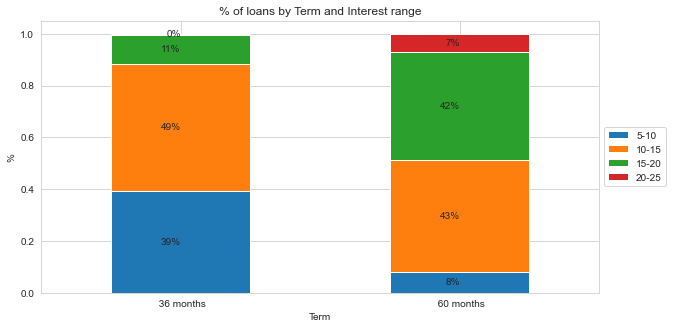

In [1526]:
## plot the % of laons by interest range and Term

Plot_stacked_bar_chart_annot(p_ite,'Term','%','% of loans by Term and Interest range','%',0)

In [1527]:
## calculate the % of the bad loans by interest rate and term
p_iter = loan_df.pivot_table(index=['term','int_rate_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_iter=p_iter.reset_index()
df_iter['Bad_loan_perc'] =   df_iter['Bad Loan']/(df_iter['Bad Loan']+df_iter['Good Loan'])
df_iter.sort_values(by='Bad_loan_perc',ascending=False)

status_catg        term int_rate_range  Bad Loan  Good Loan  Bad_loan_perc
7             60 months          20-25       245        394           0.38
3             36 months          20-25        23         42           0.35
6             60 months          15-20      1079       2629           0.29
5             60 months          10-15       809       3035           0.21
2             36 months          15-20       555       2438           0.19
1             36 months          10-15      1576      11257           0.12
4             60 months           5-10        83        640           0.11
0             36 months           5-10       612       9729           0.06

In [1528]:
## format the dataframe in heatmap format
p_iter = df_iter.pivot_table(index=['int_rate_range'], columns=['term'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_iter

term             36 months   60 months
int_rate_range                        
5-10                     5          11
10-15                   12          21
15-20                   18          29
20-25                   35          38

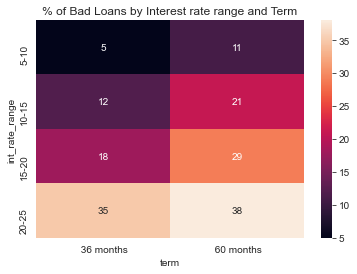

In [1529]:
## plot the heatmap for % of bad loans by term and interest rate
g=sns.heatmap(p_iter,annot=True)
g.set_title("% of Bad Loans by Interest rate range and Term")
plt.show()

## Insights
1. The average interest rate of 60 month loans is nearly 15% whereas the average interest rate is 11% for 30 month loans
2. Only 51% of the 60 month loans are given in the 5-15% interest range. Nearly 88% of the 30 month loans are in the 5-15% interest range.
3. The highest risk is 38% bad loans in 60 month & 20-25 interest rate category. The lowest risk is 5% bad loans in 36 month & 5-10 interest rate combination.
4. The risk variance between the highest and lowest risk combinatoons is 33%.  

### Interest rate and Loan amount

In [1530]:
## get the average interest by loan amount range
p_item = loan_df.pivot_table(index='loan_amnt_range',values='int_rate',aggfunc='mean')
p_item.reset_index(inplace=True)
p_item

loan_amnt_range  int_rate
0           0K-5K     11.20
1          5K-10K     11.24
2         10K-15K     12.04
3         15K-20K     13.14
4         20K-25K     14.08
5         25K-30K     15.40
6         30K-35K     15.80

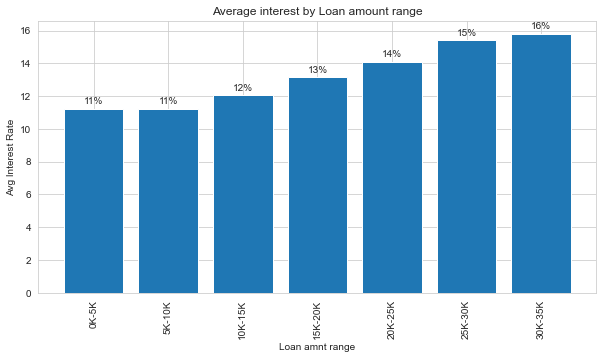

In [1531]:
## plot the average interest by loan amount range
Plot_bar_chart_annot_rot(p_item,'loan_amnt_range','int_rate','Loan amnt range','Avg Interest Rate','Average interest by Loan amount range','%',90)

In [1532]:
## get the % of loans by interest rate range and loan amount range
p_item = pd.crosstab(loan_df['loan_amnt_range'], loan_df['int_rate_range'],normalize='index')
p_item

int_rate_range   5-10  10-15  15-20  20-25
loan_amnt_range                           
0K-5K            0.38   0.49   0.13   0.00
5K-10K           0.39   0.46   0.15   0.01
10K-15K          0.31   0.47   0.20   0.02
15K-20K          0.18   0.51   0.27   0.03
20K-25K          0.10   0.52   0.31   0.07
25K-30K          0.12   0.32   0.42   0.13
30K-35K          0.08   0.34   0.42   0.16

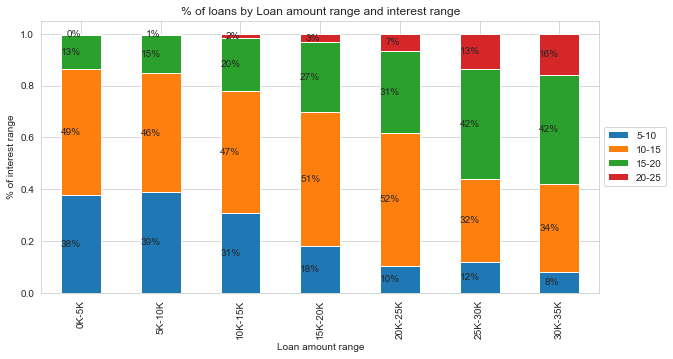

In [1533]:
## plot the % of loans by interest rate range and loan amount range
Plot_stacked_bar_chart_annot(p_item,'Loan amount range','% of interest range','% of loans by Loan amount range and interest range','%',90)

In [1534]:
## calculate the % of the bad loans by Interest rate range and Loan amount range 
p_item = loan_df.pivot_table(index=['loan_amnt_range','int_rate_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_item=p_item.reset_index()
df_item['Bad_loan_perc'] =   df_item['Bad Loan']/(df_item['Bad Loan']+df_item['Good Loan'])
df_item.sort_values(by='Bad_loan_perc',ascending=False)

status_catg loan_amnt_range int_rate_range  Bad Loan  Good Loan  Bad_loan_perc
11                  10K-15K          20-25        51         63           0.45
27                  30K-35K          20-25        41         57           0.42
15                  15K-20K          20-25        53         74           0.42
7                    5K-10K          20-25        25         42           0.37
19                  20K-25K          20-25        57        113           0.34
23                  25K-30K          20-25        28         58           0.33
3                     0K-5K          20-25        13         29           0.31
22                  25K-30K          15-20        73        198           0.27
14                  15K-20K          15-20       292        801           0.27
26                  30K-35K          15-20        69        191           0.27
18                  20K-25K          15-20       205        588           0.26
2                     0K-5K          15-20       276        825           0.25
6                    5K-10K          15-20       397       1330           0.23
10                  10K-15K          15-20       322       1134           0.22
25                  30K-35K          10-15        44        166           0.21
17                  20K-25K          10-15       195       1106           0.15
13                  15K-20K          10-15       310       1759           0.15
1                     0K-5K          10-15       599       3514           0.15
5                    5K-10K          10-15       767       4622           0.14
21                  25K-30K          10-15        29        176           0.14
9                   10K-15K          10-15       441       2949           0.13
0                     0K-5K           5-10       238       2965           0.07
8                   10K-15K           5-10       134       2065           0.06
4                    5K-10K           5-10       271       4272           0.06
16                  20K-25K           5-10        15        247           0.06
12                  15K-20K           5-10        33        698           0.05
20                  25K-30K           5-10         3         73           0.04
24                  30K-35K           5-10         1         49           0.02

In [1535]:
## format for the heatmap plotting
p_item = df_item.pivot_table(index=['int_rate_range'], columns=['loan_amnt_range'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_item

loan_amnt_range  0K-5K  5K-10K  10K-15K  15K-20K  20K-25K  25K-30K  30K-35K
int_rate_range                                                             
5-10                 7       5        6        4        5        3        2
10-15               14      14       13       14       14       14       20
15-20               25      22       22       26       25       26       26
20-25               30      37       44       41       33       32       41

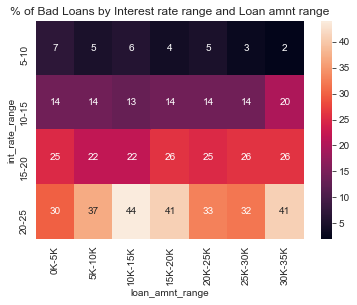

In [1536]:
## plot the % of bad loans by Interest rate range and loan amount range
g=sns.heatmap(p_item,annot=True)
g.set_title("% of Bad Loans by Interest rate range and Loan amnt range")
plt.show()

## Insights
1. The average interest rate of loans increases with the loan amount.  The average interest rate is 11% for 0-5K loans and as high as nearly 16% for 30-35K loans
2. 55%-58% of loans are issued with interest rate of 15-25% for the 25-35K loans.  30-38% of loans are issued with interest of 15-25% for the 15-25K loans. 13-22% of loans are issued with interest of 15-25% interest rate for the 5-15K loans
3. The highest risk is 41% of bad loans in 20-25% interest range and 30-35K loan amount combination. The lowest risk is 2% risk in 5-10% interest range and 30-35K combination.
4. The risk variance between the highest and least risk comibiations is 39%.  

### Interest rate and income level

In [1537]:
## get the average interest rate by income level
p_item = loan_df.pivot_table(index='inc_catg',values='int_rate',aggfunc='mean')
p_item.reset_index(inplace=True)
p_item

inc_catg  int_rate
0    High inc     12.63
1     Low inc     11.76
2  Middle inc     11.99

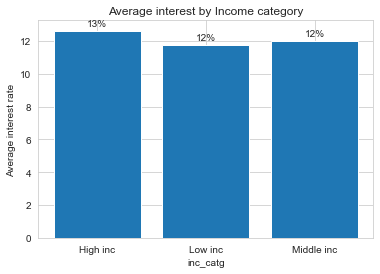

In [1538]:
## plot the average interest rate by income level
Plot_bar_chart_annot(p_item,'inc_catg','int_rate','inc_catg','Average interest rate','Average interest by Income category','%')

In [1539]:
##  get the percentage of loans by interest rate range and income level
p_item = pd.crosstab(loan_df['inc_catg'], loan_df['int_rate_range'],normalize='index')
p_item

int_rate_range  5-10  10-15  15-20  20-25
inc_catg                                 
High inc        0.27   0.45   0.24   0.04
Low inc         0.32   0.50   0.17   0.01
Middle inc      0.32   0.47   0.19   0.02

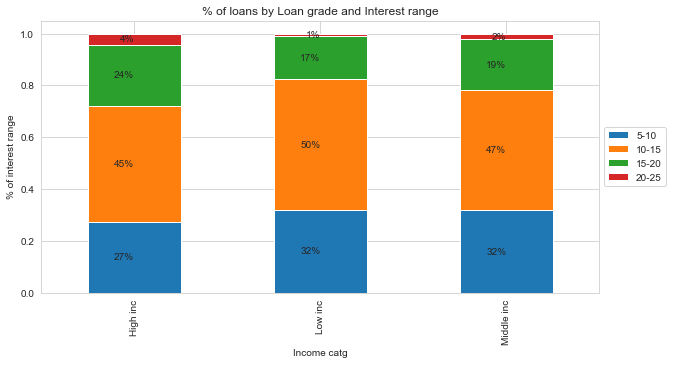

In [1540]:
## plot the percentage of loans by interest rate range and income level
Plot_stacked_bar_chart_annot(p_item,'Income catg','% of interest range','% of loans by Loan grade and Interest range','%',90)

In [1541]:
## plot  the percentage of bad loans by interest rate range and income level

p_item = loan_df.pivot_table(index=['inc_catg','int_rate_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_item=p_item.reset_index()
df_item['Bad_loan_perc'] =   df_item['Bad Loan']/(df_item['Bad Loan']+df_item['Good Loan'])
df_item.sort_values(by='Bad_loan_perc',ascending=False)

status_catg    inc_catg int_rate_range  Bad Loan  Good Loan  Bad_loan_perc
7               Low inc          20-25        36         40           0.47
11           Middle inc          20-25       208        329           0.39
6               Low inc          15-20       402       1025           0.28
3              High inc          20-25        24         67           0.26
10           Middle inc          15-20      1147       3613           0.24
5               Low inc          10-15       796       3517           0.18
2              High inc          15-20        85        429           0.17
9            Middle inc          10-15      1493       9904           0.13
1              High inc          10-15        96        871           0.10
4               Low inc           5-10       262       2464           0.10
8            Middle inc           5-10       413       7337           0.05
0              High inc           5-10        20        568           0.03

In [1542]:
##  format for plotting the heatmap
p_item = df_item.pivot_table(index=['int_rate_range'], columns=['inc_catg'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_item

inc_catg        High inc  Low inc  Middle inc
int_rate_range                               
5-10                   3        9           5
10-15                  9       18          13
15-20                 16       28          24
20-25                 26       47          38

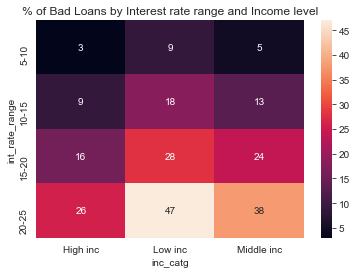

In [1543]:
## plot  the percentage of bad loans by interest rate range and income level
g=sns.heatmap(p_item,annot=True)
g.set_title("% of Bad Loans by Interest rate range and Income level")
plt.show()

## Insights
1. The average interest of high income borrowers is about 13%.  Middle income borrowers is 12% and Low income borrowers is 12% 
2. Nearly 82% of loans for Low income borrowers is issued in the 5-15% interest rate.  Nearly 72% of the loans for High income borrowers and nearly 79% for Middle income borrowers is issued in the 5-15% interest rate. 
3. The highest risk is 47% bad loans in Low income & 20-25% interest range combination.  The lowest risk is 3% bad loans in High income & 5-10% interest range combination. 
4. The risk variance between highest and lowest risk combinations is 44% 

## Loan grade analysis

#### Analyze the bad loans by Loan grades and related fields

In [1544]:
## get the number of loans issued by issue year and loan grade
p_cr = loan_df.pivot_table(index='issue_year',columns='grade',values='id',aggfunc='count', fill_value=0)
p_cr

grade          A     B     C     D     E    F    G
issue_year                                        
2007           0     1     3     2     0    0    0
2008         196   343   308   138    50   11    2
2009        1110  1261  1121   599   217   56   20
2010        2590  3281  2306  1515   734  220   85
2011        5210  5784  3403  2379  1438  596  167

In [1545]:
## get the average interest of loans issued by issue year and loan grade
p_cr_rate = loan_df.pivot_table(index='issue_year',columns='grade',values='int_rate',aggfunc='mean', fill_value=0)
p_cr_rate

grade         A     B     C     D     E     F     G
issue_year                                         
2007       0.00  9.01 10.80 12.18  0.00  0.00  0.00
2008       8.48 10.60 12.00 13.47 15.16 16.52 18.88
2009       8.64 11.79 13.32 14.93 16.46 18.22 19.88
2010       7.14 10.74 13.48 15.27 16.90 18.66 20.59
2011       7.11 11.07 13.90 16.34 18.31 20.27 21.90

Text(0, 0.5, 'Interest %')

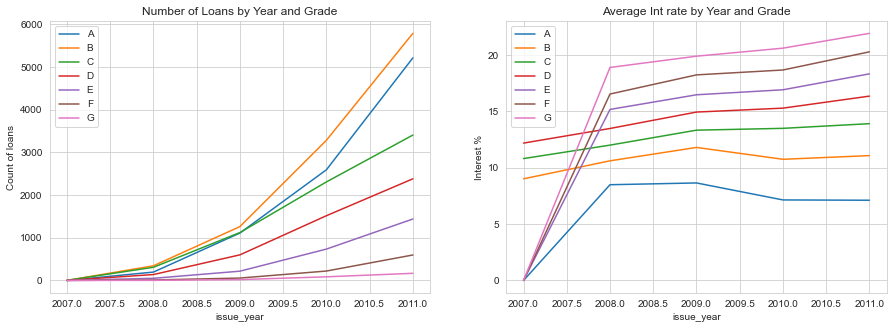

In [1546]:
## plot the average interest of loans issued by issue year and loan grade
f, axes = plt.subplots(1,2, figsize=(15,5))
sns.set_style("whitegrid")
g=sns.lineplot(data=p_cr,dashes=False,ax=axes[0])
g.set_title('Number of Loans by Year and Grade')
g.set_ylabel('Count of loans')
g=sns.lineplot(data=p_cr_rate,dashes=False,ax=axes[1])
g.set_title('Average Int rate by Year and Grade')
g.set_ylabel('Interest %')

## Insights
1.  Loan with grade 'B' are issued the most across years.  There is a steep increase of 'A' grade loans from 2010 to 2011
2.  Average interest for 'A' grade have seen a marginal reduction from 2009.  'B' grade loan rates decreased after 2009 but are seeing a marginal increase in 2011.  The "C' grade loan rates have seem marginal increase since 2009
3. Average interest rates of loan grades 'D' to 'G' are consistently increasing since 2008

### Understand Loan grades and  interest rates

In [1547]:
## get the average interest of loans by Loan grade
p_gint=loan_df.pivot_table(index='grade', values='int_rate', aggfunc='mean', fill_value=0)
p_gint.reset_index(inplace=True)
p_gint

grade  int_rate
0     A      7.33
1     B     11.04
2     C     13.59
3     D     15.72
4     E     17.66
5     F     19.69
6     G     21.33

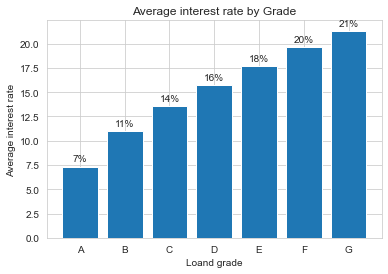

In [1548]:
## plot the average interest of loans by Loan grade
Plot_bar_chart_annot(p_gint,'grade','int_rate','Loand grade','Average interest rate','Average interest rate by Grade','%')

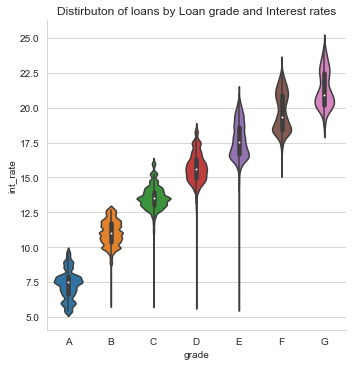

In [1549]:
## get the distribution of interest rates by load grade
grade_order=['A','B','C','D','E','F','G']
sns.catplot(data=loan_df,x='grade',y='int_rate',kind='violin',order=grade_order)
plt.title("Distirbuton of loans by Loan grade and Interest rates")
plt.show()

In [1550]:
## get the percentage of loans by grade and interest rate range
p_gint= pd.crosstab(loan_df['grade'], loan_df['int_rate_range'],normalize='index')
p_gint

int_rate_range  5-10  10-15  15-20  20-25
grade                                    
A               1.00   0.00   0.00   0.00
B               0.18   0.82   0.00   0.00
C               0.00   0.93   0.07   0.00
D               0.00   0.28   0.72   0.00
E               0.00   0.01   0.96   0.03
F               0.00   0.00   0.57   0.43
G               0.00   0.00   0.08   0.92

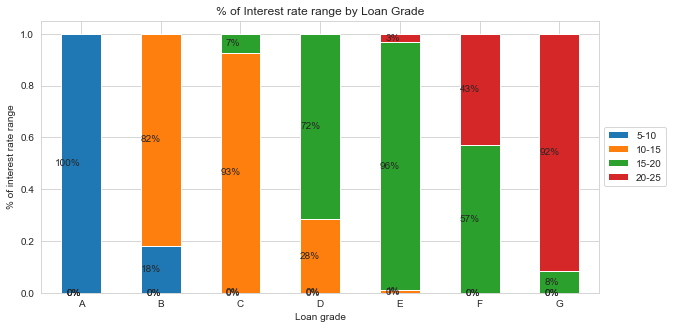

In [1551]:
## plot the percentage of loans by grade and interest rate range
Plot_stacked_bar_chart_annot(p_gint,'Loan grade','% of interest rate range','% of Interest rate range by Loan Grade','%',0)

## Insights
1. There is clear range of interest rates for each of the Loan grades. Lower the grade higher the interest rates

### Understand Loan grades and annual income

In [1552]:
## get the average interest of loans by Loan grade
p_inc=loan_df.pivot_table(index='grade', values='annual_inc', aggfunc='mean', fill_value=0)
p_inc.reset_index(inplace=True)
p_inc

grade  annual_inc
0     A    64829.58
1     B    64701.24
2     C    63711.52
3     D    65446.02
4     E    72504.67
5     F    78527.86
6     G    84650.62

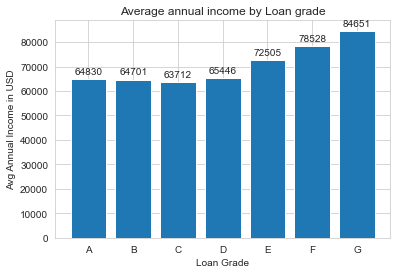

In [1553]:
## plot the average annual income by load grade
Plot_bar_chart_annot(p_inc,'grade','annual_inc','Loan Grade','Avg Annual Income in USD','Average annual income by Loan grade','num')

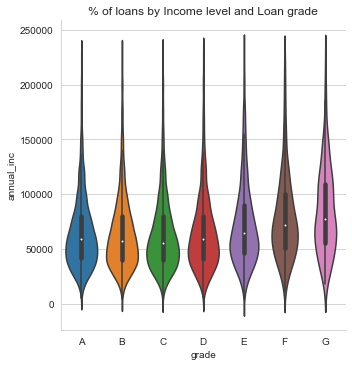

In [1554]:
## get the distribution of interest rates by load grade
grade_order=['A','B','C','D','E','F','G']
sns.catplot(data=loan_df,x='grade',y='annual_inc',kind='violin',order=grade_order)
plt.title("% of loans by Income level and Loan grade")
plt.show()

## Insights
1. The average annual incomes are higher in the lower loan grades E,F,G and most in G. This indicates higher income people are given loans though their credit score may not be good.  
2. The distribution of annual incomes is very similar in loan grades A,B,C,D

###  Loan grades analysis

In [1555]:
## get the number of loans issued by loan grade and loan status
p3 = loan_df.pivot_table(index='grade', columns='status_catg', values='id', aggfunc='count', fill_value=0)

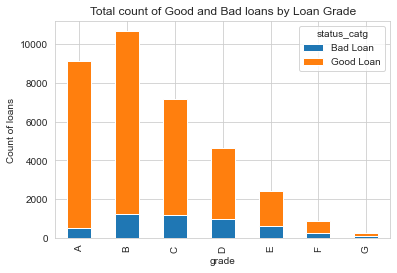

In [1556]:
## plot the number of loans issued by loan grade and loan status
p3.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Loan Grade")
plt.show()

In [1557]:
## get the % of bad loans issued by loan grade 
p3['Total'] = p3['Bad Loan']+p3['Good Loan']
p3['Total_perc'] = p3['Total']/sum(p3['Total'])*100
p3['Bad_loan_perc'] = p3['Bad Loan']/(p3['Bad Loan']+p3['Good Loan'])*100
p3.reset_index(inplace=True)
p3

status_catg grade  Bad Loan  Good Loan  Total  Total_perc  Bad_loan_perc
0               A       522       8584   9106       25.91           5.73
1               B      1263       9407  10670       30.36          11.84
2               C      1188       5953   7141       20.32          16.64
3               D       991       3642   4633       13.18          21.39
4               E       645       1794   2439        6.94          26.45
5               F       280        603    883        2.51          31.71
6               G        93        181    274        0.78          33.94

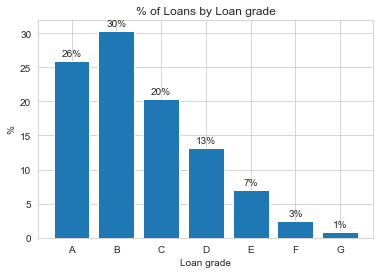

In [1558]:
## plot the % loans issued by grade
Plot_bar_chart_annot(p3,'grade','Total_perc','Loan grade','%','% of Loans by Loan grade','%')

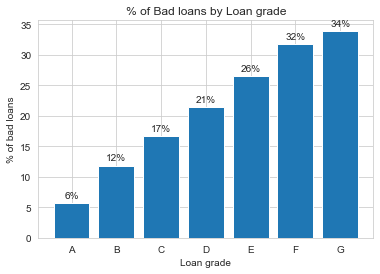

In [1559]:
## plot the % of bad loans issued by loan grade
Plot_bar_chart_annot(p3,'grade','Bad_loan_perc','Loan grade','% of bad loans','% of Bad loans by Loan grade','%')

In [1560]:
## get the number of loans issued by loan sub-grade and loan status
p4 = loan_df.pivot_table(index='sub_grade', columns='status_catg', values='id', aggfunc='count', fill_value=0)

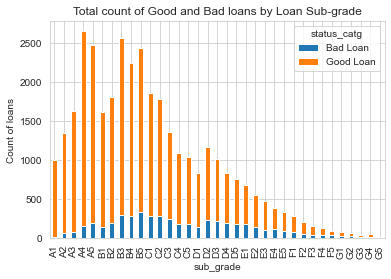

In [1561]:
## plot the number of loans issued by loan sub-grade and loan status
p4.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Loan Sub-grade")
plt.show()

In [1562]:
## get the percentage of bad loans issued by loan sub-grade 
p4['Total'] = p4['Bad Loan']+p4['Good Loan']
p4['Total_perc'] = p4['Total']/sum(p4['Total'])*100
p4['Bad_loan_perc'] = p4['Bad Loan']/(p4['Bad Loan']+p4['Good Loan'])*100
p4.reset_index(inplace=True)
p4.sort_values(by='Bad_loan_perc',ascending=False)

status_catg sub_grade  Bad Loan  Good Loan  Total  Total_perc  Bad_loan_perc
29                 F5        46         50     96        0.27          47.92
32                 G3        18         22     40        0.11          45.00
34                 G5         9         15     24        0.07          37.50
31                 G2        26         45     71        0.20          36.62
28                 F4        47         86    133        0.38          35.34
30                 G1        28         60     88        0.25          31.82
23                 E4       116        275    391        1.11          29.67
26                 F2        62        150    212        0.60          29.25
27                 F3        44        111    155        0.44          28.39
25                 F1        81        206    287        0.82          28.22
24                 E5        93        239    332        0.94          28.01
20                 E1       182        499    681        1.94          26.73
21                 E2       148        413    561        1.60          26.38
19                 D5       186        574    760        2.16          24.47
33                 G4        12         39     51        0.15          23.53
18                 D4       194        646    840        2.39          23.10
17                 D3       228        788   1016        2.89          22.44
22                 E3       106        368    474        1.35          22.36
16                 D2       239        935   1174        3.34          20.36
12                 C3       243       1117   1360        3.87          17.87
14                 C5       185        860   1045        2.97          17.70
15                 D1       144        699    843        2.40          17.08
13                 C4       185        909   1094        3.11          16.91
11                 C2       288       1497   1785        5.08          16.13
10                 C1       287       1570   1857        5.28          15.46
9                  B5       333       2103   2436        6.93          13.67
8                  B4       288       1952   2240        6.37          12.86
7                  B3       306       2260   2566        7.30          11.93
6                  B2       192       1622   1814        5.16          10.58
5                  B1       144       1470   1614        4.59           8.92
4                  A5       193       2283   2476        7.04           7.79
3                  A4       160       2491   2651        7.54           6.04
2                  A3        82       1543   1625        4.62           5.05
1                  A2        64       1287   1351        3.84           4.74
0                  A1        23        980   1003        2.85           2.29

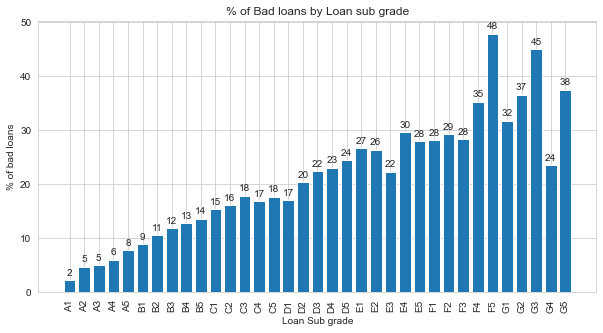

In [1563]:
## plot the % of bad loans issued by loan sub grade
Plot_bar_chart_annot_rot(p4,'sub_grade','Bad_loan_perc','Loan Sub grade','% of bad loans','% of Bad loans by Loan sub grade','num',90)

## Insights
1. 30% of loans are issued in loan grade B. 26% in A and 20% in C. 11% of loans are issued in loan grades E,F,G.
2. Loan grades E,F,G have high % of bad loans at 26%, 32% and 34%
3. Loan grades C and D also have high % of bad loans at 17% and 21%. Loan grades A and B have nearly 6 % and 12% of bad loans
4. Loan grade G have the highest risk with 34% bad loans.  Loan grade A has the lowest risk with 6% bad loans
5. The risk variance between the highest and least risky grades is 28%. 

## Purpose  analysis

#### Analyze the bad loans by purpose and other related fields

In [1564]:
## get the number of loans issued by purpose and loan status
p5 = loan_df.pivot_table(index='purpose', columns='status_catg', values='id', aggfunc='count', fill_value=0)
p5

status_catg         Bad Loan  Good Loan
purpose                                
car                      150       1240
credit_card              477       4119
debt_consolidation      2527      14309
educational               46        232
home_improvement         292       2256
house                     53        270
major_purchase           192       1767
medical                   95        521
moving                    79        440
other                    555       2900
renewable_energy          16         70
small_business           363        981
vacation                  49        283
wedding                   88        776

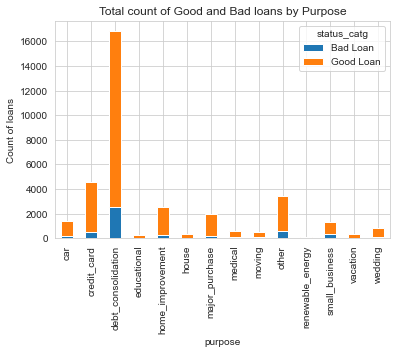

In [1565]:
## plot the number of loans issued by purpose and loan status
p5.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Purpose")
plt.show()

In [1566]:
## get the % of bad loans by purpose
p5['Total'] = p5['Bad Loan']+p5['Good Loan']
p5['Total_perc'] = p5['Total']/sum(p5['Total'])*100
p5['Bad_loan_perc'] = p5['Bad Loan']/(p5['Bad Loan']+p5['Good Loan'])*100
p5.reset_index(inplace=True)
p5.sort_values(by='Bad_loan_perc',ascending=False)

status_catg             purpose  Bad Loan  Good Loan  Total  Total_perc  \
11               small_business       363        981   1344        3.82   
10             renewable_energy        16         70     86        0.24   
3                   educational        46        232    278        0.79   
5                         house        53        270    323        0.92   
9                         other       555       2900   3455        9.83   
7                       medical        95        521    616        1.75   
8                        moving        79        440    519        1.48   
2            debt_consolidation      2527      14309  16836       47.90   
12                     vacation        49        283    332        0.94   
4              home_improvement       292       2256   2548        7.25   
0                           car       150       1240   1390        3.95   
1                   credit_card       477       4119   4596       13.08   
13                      wedding        88        776    864        2.46   
6                major_purchase       192       1767   1959        5.57   

status_catg  Bad_loan_perc  
11                   27.01  
10                   18.60  
3                    16.55  
5                    16.41  
9                    16.06  
7                    15.42  
8                    15.22  
2                    15.01  
12                   14.76  
4                    11.46  
0                    10.79  
1                    10.38  
13                   10.19  
6                     9.80

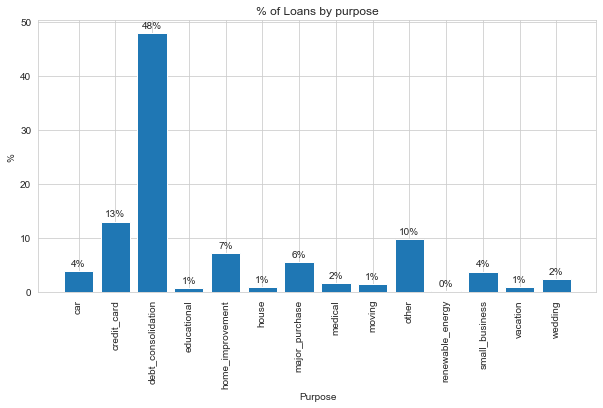

In [1567]:
## plot the % of loans by purpose
Plot_bar_chart_annot_rot(p5,'purpose','Total_perc','Purpose','%','% of Loans by purpose','%',90)

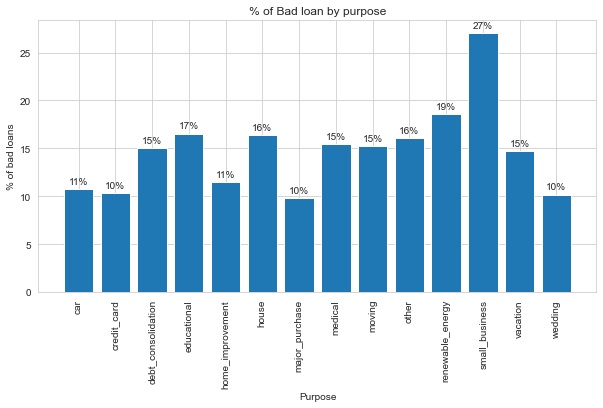

In [1568]:
## plot the % of bad loans by purpose
Plot_bar_chart_annot_rot(p5,'purpose','Bad_loan_perc','Purpose','% of bad loans','% of Bad loan by purpose','%',90)

## Insights
1. Debt consolidation(48%) and Credit card pay-off(13%) are the top purposes for loan 
2. Small business have the highest % of bad loan at 27%.  This is followed Renewable energy(19%), educational(17%) and house related loans(16%). 
3. Small business loans have the highest risk with 27% bad loans.  Credit card pay-off, major purchase and wedding loans have the least risk with 10% bad loans.  
4. The risk variance between the highest and least risky loans is 17%.  

### Purpose and interest rate

In [1569]:
## get the average interest rate by loan purpose
p_pin = loan_df.pivot_table(index='purpose', values='int_rate', aggfunc='mean', fill_value=0)
p_pin.reset_index(inplace=True)
p_pin

purpose  int_rate
0                  car     10.53
1          credit_card     11.68
2   debt_consolidation     12.42
3          educational     11.80
4     home_improvement     11.29
5                house     12.25
6       major_purchase     10.82
7              medical     11.57
8               moving     11.52
9                other     11.79
10    renewable_energy     11.46
11      small_business     12.97
12            vacation     10.87
13             wedding     11.82

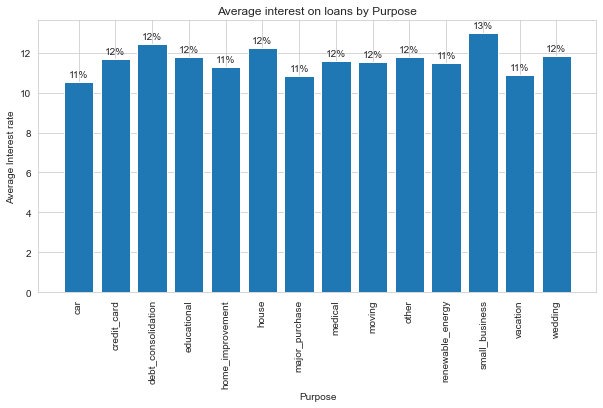

In [1570]:
## plot the average interest rate by loan purpose
Plot_bar_chart_annot_rot(p_pin,'purpose','int_rate','Purpose','Average Interest rate','Average interest on loans by Purpose','%',90)

In [1571]:
## get the % of loans by purpose and interest rate range
p_pinr = pd.crosstab(loan_df['purpose'],loan_df['int_rate_range'],normalize='index')
p_pinr

int_rate_range      5-10  10-15  15-20  20-25
purpose                                      
car                 0.47   0.40   0.12   0.00
credit_card         0.34   0.49   0.16   0.02
debt_consolidation  0.27   0.49   0.22   0.03
educational         0.27   0.64   0.09   0.00
home_improvement    0.39   0.44   0.16   0.02
house               0.33   0.41   0.23   0.03
major_purchase      0.44   0.42   0.14   0.01
medical             0.35   0.46   0.17   0.01
moving              0.35   0.48   0.16   0.01
other               0.32   0.50   0.17   0.01
renewable_energy    0.38   0.42   0.17   0.02
small_business      0.24   0.44   0.27   0.05
vacation            0.42   0.44   0.13   0.01
wedding             0.32   0.49   0.17   0.02

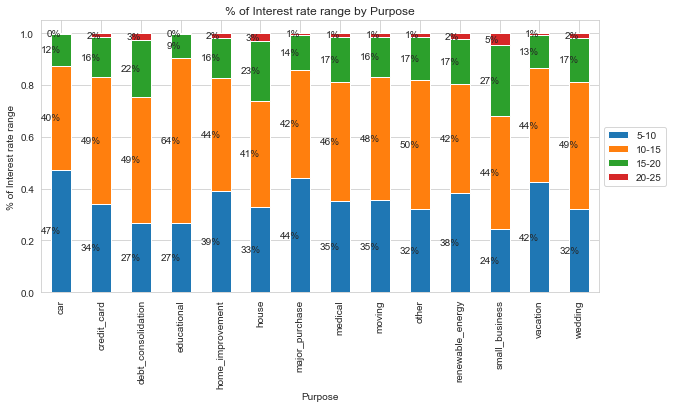

In [1572]:
## plot the % of loans by purpose and interest rate range
Plot_stacked_bar_chart_annot(p_pinr,'Purpose','% of Interest rate range','% of Interest rate range by Purpose','%',90)

In [1573]:
## get the % of bad loans by purpose and interest rate range
p_pint = loan_df.pivot_table(index=['purpose','int_rate_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_pint=p_pint.reset_index()
df_pint['Bad_loan_perc'] =   df_pint['Bad Loan']/(df_pint['Bad Loan']+df_pint['Good Loan'])
df_pint.sort_values(by='Bad_loan_perc',ascending=False)

status_catg             purpose int_rate_range  Bad Loan  Good Loan  \
43             renewable_energy          20-25         2          0   
31                      medical          20-25         5          3   
23                        house          20-25         6          4   
47               small_business          20-25        36         26   
14                  educational          15-20        11         14   
11           debt_consolidation          20-25       165        260   
39                        other          20-25        16         29   
3                           car          20-25         1          2   
46               small_business          15-20       119        247   
55                      wedding          20-25         5         11   
22                        house          15-20        23         51   
38                        other          15-20       173        401   
27               major_purchase          20-25         3          7   
35                       moving          20-25         2          5   
45               small_business          10-15       167        422   
19             home_improvement          20-25        11         32   
41             renewable_energy          10-15         9         27   
10           debt_consolidation          15-20       920       2801   
2                           car          15-20        42        130   
30                      medical          15-20        26         81   
7                   credit_card          20-25        16         54   
34                       moving          15-20        18         63   
18             home_improvement          15-20        80        318   
6                   credit_card          15-20       137        577   
26               major_purchase          15-20        50        216   
50                     vacation          15-20         8         35   
29                      medical          10-15        52        233   
54                      wedding          15-20        26        119   
13                  educational          10-15        30        148   
49                     vacation          10-15        24        122   
37                        other          10-15       267       1456   
21                        house          10-15        20        113   
33                       moving          10-15        37        210   
9            debt_consolidation          10-15      1146       7039   
17             home_improvement          10-15       154        956   
25               major_purchase          10-15       107        714   
1                           car          10-15        72        487   
44               small_business           5-10        41        286   
40             renewable_energy           5-10         4         29   
48                     vacation           5-10        17        124   
32                       moving           5-10        22        162   
5                   credit_card          10-15       253       1988   
53                      wedding          10-15        47        377   
36                        other           5-10        99       1014   
12                  educational           5-10         5         69   
42             renewable_energy          15-20         1         14   
8            debt_consolidation           5-10       296       4209   
28                      medical           5-10        12        204   
0                           car           5-10        35        621   
16             home_improvement           5-10        47        950   
4                   credit_card           5-10        71       1500   
20                        house           5-10         4        102   
24               major_purchase           5-10        32        830   
52                      wedding           5-10        10        269   
51                     vacation          20-25         0          2   
15                  educ

In [1574]:
## format for the heatmap
p_pint = df_pint.pivot_table(index=['purpose'], columns=['int_rate_range'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_pint

int_rate_range      5-10  10-15  15-20  20-25
purpose                                      
car                    5     12     24     33
credit_card            4     11     19     22
debt_consolidation     6     14     24     38
educational            6     16     44      0
home_improvement       4     13     20     25
house                  3     15     31     60
major_purchase         3     13     18     30
medical                5     18     24     62
moving                11     14     22     28
other                  8     15     30     35
renewable_energy      12     25      6    100
small_business        12     28     32     58
vacation              12     16     18      0
wedding                3     11     17     31

Text(0.5, 1.0, '% of Bad Loans by Purpose and Interest rate range')

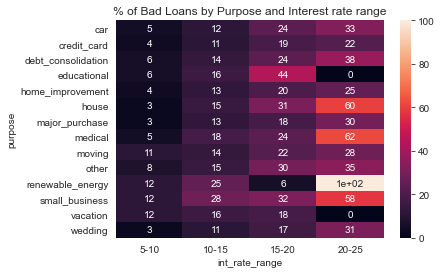

In [1575]:
### plot the heatmap for % of bad loans by purpose and interest rate range
sns.heatmap(p_pint,annot=True)
plt.title("% of Bad Loans by Purpose and Interest rate range")

## Insights
1. Average interest rate for small business is highest at 13%.  Lowest interest rates are for car,major purchases and wedding at 11%
2. Nearly 32% of small business loans have interest rate more than 15% . This is the highest. Over 20% of loans in debt consolidation and house related purpose have more than 15% interest rate. Car loan and major purpose have 47% and 44% of loans in the 5-10% interest range and the most cheapest. 
3. The loans with highest risk with significant number of loans are small business loans at 20-25% interest range with 58% bad loans.  The least risky loans are wedding, house related and major purchase loans with 3% bad loans.
4. The risk variance between the highest and least risky combinations is 55%.   

### Purpose and term

In [1576]:
## get the % of loans by purpose and loan grade
p_temp = pd.crosstab(loan_df['purpose'],loan_df['term'],normalize='index')
p_temp

term                 36 months   60 months
purpose                                   
car                       0.65        0.35
credit_card               0.81        0.19
debt_consolidation        0.72        0.28
educational               0.95        0.05
home_improvement          0.71        0.29
house                     0.70        0.30
major_purchase            0.80        0.20
medical                   0.76        0.24
moving                    0.83        0.17
other                     0.81        0.19
renewable_energy          0.73        0.27
small_business            0.69        0.31
vacation                  0.85        0.15
wedding                   0.78        0.22

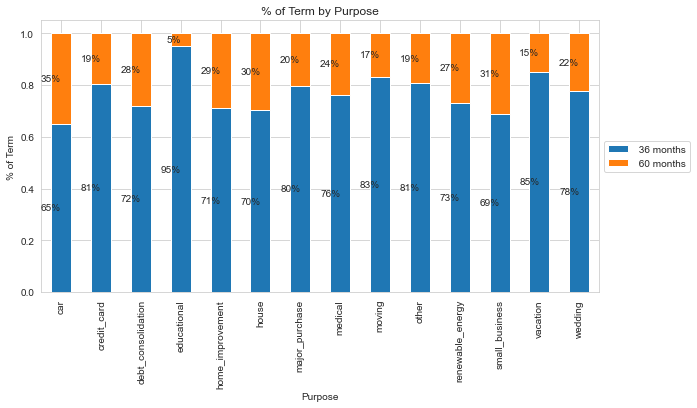

In [1577]:
## plot the % of loans by purpose and loan grade

Plot_stacked_bar_chart_annot(p_temp,'Purpose','% of Term','% of Term by Purpose','%',90)

In [1578]:
## get the % of bad loans by purpose and loan grade
p_temp = loan_df.pivot_table(index=['purpose','term'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_temp=p_temp.reset_index()
df_temp['Bad_loan_perc'] =   df_temp['Bad Loan']/(df_temp['Bad Loan']+df_temp['Good Loan'])
df_temp.sort_values(by='Bad_loan_perc',ascending=False)

status_catg             purpose        term  Bad Loan  Good Loan  \
7                   educational   60 months         6          8   
23               small_business   60 months       163        255   
11                        house   60 months        29         67   
19                        other   60 months       192        474   
25                     vacation   60 months        14         35   
5            debt_consolidation   60 months      1231       3475   
21             renewable_energy   60 months         6         17   
3                   credit_card   60 months       207        689   
15                      medical   60 months        33        113   
22               small_business   36 months       200        726   
17                       moving   60 months        18         69   
13               major_purchase   60 months        80        316   
27                      wedding   60 months        35        158   
9              home_improvement   60 months       126        611   
20             renewable_energy   36 months        10         53   
1                           car   60 months        76        411   
6                   educational   36 months        40        224   
16                       moving   36 months        61        371   
14                      medical   36 months        62        408   
18                        other   36 months       363       2426   
24                     vacation   36 months        35        248   
4            debt_consolidation   36 months      1296      10834   
10                        house   36 months        24        203   
8              home_improvement   36 months       166       1645   
0                           car   36 months        74        829   
26                      wedding   36 months        53        618   
2                   credit_card   36 months       270       3430   
12               major_purchase   36 months       112       1451   

status_catg  Bad_loan_perc  
7                     0.43  
23                    0.39  
11                    0.30  
19                    0.29  
25                    0.29  
5                     0.26  
21                    0.26  
3                     0.23  
15                    0.23  
22                    0.22  
17                    0.21  
13                    0.20  
27                    0.18  
9                     0.17  
20                    0.16  
1                     0.16  
6                     0.15  
16                    0.14  
14                    0.13  
18                    0.13  
24                    0.12  
4                     0.11  
10                    0.11  
8                     0.09  
0                     0.08  
26                    0.08  
2                     0.07  
12                    0.07

In [1579]:
### format for heatmap
p_temp = df_temp.pivot_table(index=['purpose'], columns=['term'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_temp

term                 36 months   60 months
purpose                                   
car                          8          15
credit_card                  7          23
debt_consolidation          10          26
educational                 15          42
home_improvement             9          17
house                       10          30
major_purchase               7          20
medical                     13          22
moving                      14          20
other                       13          28
renewable_energy            15          26
small_business              21          38
vacation                    12          28
wedding                      7          18

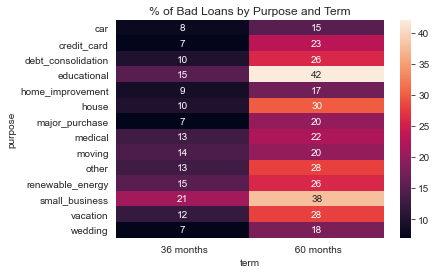

In [1580]:
### plot the heatmap for % of bad loans by purpose and loan grade
g=sns.heatmap(p_temp,annot=True)
g.set_title("% of Bad Loans by Purpose and Term")
plt.show()

## Insights

1. 95% of educational loans and 85% of vacation loans are 36 month loans. 35% of car loans and 31% of small business loans are 60 month loans.  
2. In all purposes, 60 month loans are riskier than the 36 months.  Most risk in Educational loans where there is 27% higher risk in 60 month vs 36 month loans
3. The educational loans-60 month have the highest risk with 42% bad loans.  The credit card, major purchase and wedding & 36 month loans have the lowest risk with 7% bad loans. 
4. The risk variance between the highest and least risky combinations is 35%

### Purpose and loan grade

In [1581]:
## get the % of loans by purpose and loan grade
p_pgr = pd.crosstab(loan_df['purpose'],loan_df['grade'],normalize='index')
p_pgr

grade                 A    B    C    D    E    F    G
purpose                                              
car                0.40 0.31 0.16 0.08 0.04 0.01 0.00
credit_card        0.28 0.32 0.21 0.12 0.05 0.02 0.01
debt_consolidation 0.21 0.31 0.21 0.15 0.08 0.03 0.01
educational        0.25 0.31 0.28 0.09 0.05 0.01 0.00
home_improvement   0.34 0.30 0.18 0.10 0.06 0.02 0.01
house              0.27 0.27 0.19 0.14 0.08 0.04 0.02
major_purchase     0.38 0.28 0.18 0.11 0.04 0.01 0.00
medical            0.29 0.30 0.20 0.12 0.06 0.02 0.00
moving             0.30 0.31 0.20 0.11 0.05 0.02 0.01
other              0.27 0.30 0.22 0.13 0.05 0.02 0.00
renewable_energy   0.31 0.33 0.17 0.09 0.05 0.02 0.02
small_business     0.20 0.26 0.19 0.16 0.11 0.05 0.03
vacation           0.35 0.33 0.17 0.08 0.05 0.01 0.00
wedding            0.27 0.30 0.21 0.14 0.06 0.02 0.01

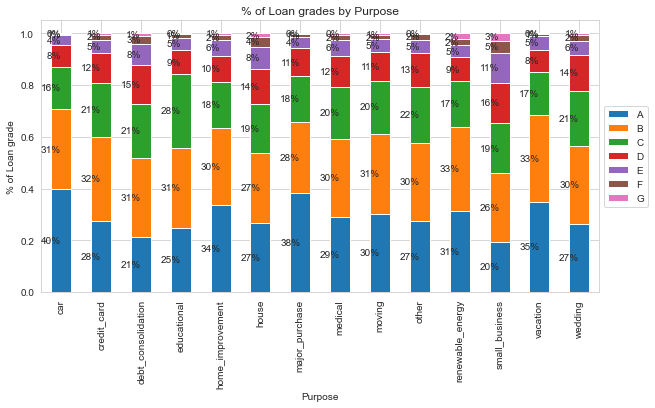

In [1582]:
## plot the % of loans by purpose and loan grade

Plot_stacked_bar_chart_annot(p_pgr,'Purpose','% of Loan grade','% of Loan grades by Purpose','%',90)

In [1583]:
## get the % of bad loans by purpose and loan grade
p_pgrd = loan_df.pivot_table(index=['purpose','grade'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_pgrd=p_pgrd.reset_index()
df_pgrd['Bad_loan_perc'] =   df_pgrd['Bad Loan']/(df_pgrd['Bad Loan']+df_pgrd['Good Loan'])
df_pgrd.sort_values(by='Bad_loan_perc',ascending=False)

status_catg             purpose grade  Bad Loan  Good Loan  Bad_loan_perc
76             renewable_energy     G         2          0           1.00
55                      medical     G         2          1           0.67
83               small_business     G        19         19           0.50
6                           car     G         1          1           0.50
40                        house     F         6          6           0.50
75             renewable_energy     F         1          1           0.50
25                  educational     E         6          7           0.46
5                           car     F         4          5           0.44
39                        house     E        11         16           0.41
41                        house     G         2          3           0.40
69                        other     G         6          9           0.40
97                      wedding     G         2          3           0.40
82               small_business     F        26         40           0.39
88                     vacation     E         7         11           0.39
81               small_business     E        55         97           0.36
19           debt_consolidation     F       180        339           0.35
20           debt_consolidation     G        52        102           0.34
72             renewable_energy     C         5         10           0.33
80               small_business     D        66        145           0.31
67                        other     E        57        127           0.31
54                      medical     F         4          9           0.31
24                  educational     D         8         18           0.31
79               small_business     C        75        185           0.29
60                       moving     E         7         19           0.27
18           debt_consolidation     E       376       1021           0.27
66                        other     D       117        324           0.27
68                        other     F        18         52           0.26
78               small_business     B        91        263           0.26
26                  educational     F         1          3           0.25
62                       moving     G         1          3           0.25
48               major_purchase     G         1          3           0.25
52                      medical     D        18         55           0.25
12                  credit_card     F        21         65           0.24
33             home_improvement     F        12         38           0.24
11                  credit_card     E        56        184           0.23
51                      medical     C        29         96           0.23
38                        house     D        10         34           0.23
45               major_purchase     D        48        164           0.23
17           debt_consolidation     D       532       1968           0.21
3                           car     D        25         93           0.21
96                      wedding     F         4         15           0.21
32             home_improvement     E        31        123           0.20
22                  educational     B        17         69           0.20
37                        house     C        12         49           0.20
59                       moving     D        11         46           0.19
65                        other     C       144        605           0.19
95                      wedding     E         9         39           0.19
57                       moving     B        30        131           0.19
46               major_purchase     E        16         70           0.19
53                      medical     E         7         31           0.18
31             home_improvement     D        47        212           0.18
85                     vacation     B        20         91           0.18
30             home_improvement     C        81        370           0.18
10  

In [1584]:
### format for heatmap
p_pgrd = df_pgrd.pivot_table(index=['purpose'], columns=['grade'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_pgrd

grade                A   B   C   D   E   F    G
purpose                                        
car                  5  11  15  21  13  44   50
credit_card          4   8  13  16  23  24   12
debt_consolidation   6  11  16  21  26  34   33
educational          5  19  12  30  46  25    0
home_improvement     3  11  17  18  20  24   13
house                3  10  19  22  40  50   40
major_purchase       3   8  14  22  18   8   25
medical              5  13  23  24  18  30   66
moving               8  18  14  19  26  12   25
other                7  13  19  26  30  25   40
renewable_energy    14  14  33   0   0  50  100
small_business      11  25  28  31  36  39   50
vacation            10  18  12  10  38   0    0
wedding              2   9  13  14  18  21   40

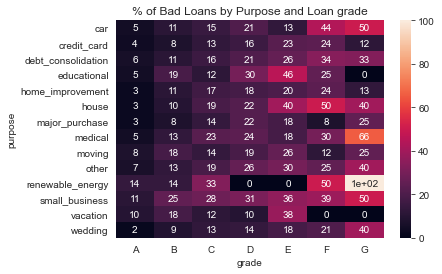

In [1585]:
### plot the heatmap for % of bad loans by purpose and loan grade
g=sns.heatmap(p_pgrd,annot=True)
g.set_title("% of Bad Loans by Purpose and Loan grade")
plt.show()

## Insights
1. Small business have 35% of loans in Grade D to G. Debt_consolidation and House related have 27% and 28% of loans in grades D to G. As lower loan grades have indicated higher bad loans %, the higher % of loans in these categories is corroborated.  
2. Car, Major purchase, educational, vacation less % of D to G loans at 13%, 15%, 16%, 14%.  
3. The loans with significant number of loans and highest risk are small business G grade loans with 50% bad loans. Renewable energy E & D loans, vacation F&G grade loans, Educational G grade loans are the least riskiest with 0% bad loans.  However considering loans with significant number, wedding loans are the least riskiest loans with 3% bad loans.
4. The risk variance between the highest and least risky loan combinations is 47% to 50%.   

### Purpose and annual income

In [1586]:
### get the number of loans by purpose and annual income range
p6 = loan_df.pivot_table(index=['purpose'], columns=['inc_catg'],values='id',aggfunc='count')
p6

inc_catg            High inc  Low inc  Middle inc
purpose                                          
car                       59      386         945
credit_card              296      947        3353
debt_consolidation       913     3981       11942
educational               10      127         141
home_improvement         319      383        1846
house                     21       67         235
major_purchase           114      572        1273
medical                   41      175         400
moving                    38      186         295
other                    168     1107        2180
renewable_energy           7       25          54
small_business           112      294         938
vacation                  16       99         217
wedding                   46      193         625

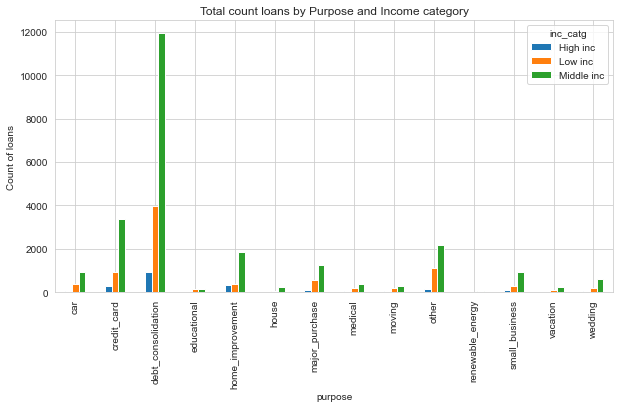

In [1587]:
### plot the number of loans by purpose and annual income category
fig, axes = plt.subplots(figsize=(10,5))
p6.plot(kind="bar",ax=axes)
plt.ylabel("Count of loans")
plt.title("Total count loans by Purpose and Income category")
plt.show()

In [1588]:
### get the % of loans by purpose and income catg
p_pinc = pd.crosstab(loan_df['purpose'],loan_df['inc_catg'],normalize='index')
p_pinc

inc_catg            High inc  Low inc  Middle inc
purpose                                          
car                     0.04     0.28        0.68
credit_card             0.06     0.21        0.73
debt_consolidation      0.05     0.24        0.71
educational             0.04     0.46        0.51
home_improvement        0.13     0.15        0.72
house                   0.07     0.21        0.73
major_purchase          0.06     0.29        0.65
medical                 0.07     0.28        0.65
moving                  0.07     0.36        0.57
other                   0.05     0.32        0.63
renewable_energy        0.08     0.29        0.63
small_business          0.08     0.22        0.70
vacation                0.05     0.30        0.65
wedding                 0.05     0.22        0.72

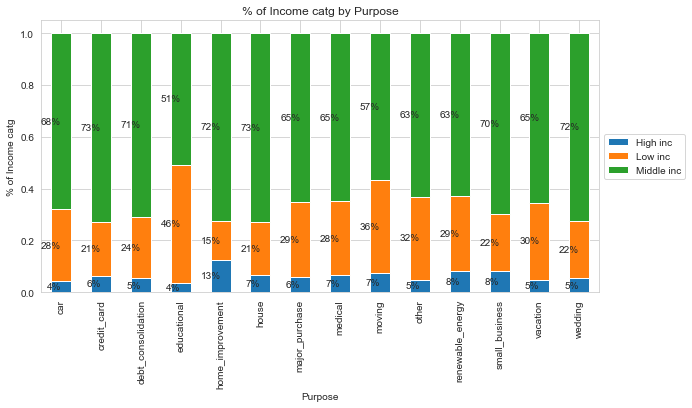

In [1589]:
### plot the % of loans by purpose and income catg
Plot_stacked_bar_chart_annot(p_pinc,'Purpose','% of Income catg','% of Income catg by Purpose','%',90)

In [1590]:
### get the average interest rate by purpose and income catg
p7 = loan_df.pivot_table(index=['purpose','inc_catg'], values='int_rate', aggfunc='mean', fill_value=0)
df7=p7.reset_index()
df7

purpose    inc_catg  int_rate
0                  car    High inc     10.30
1                  car     Low inc     11.27
2                  car  Middle inc     10.24
3          credit_card    High inc     12.41
4          credit_card     Low inc     11.26
5          credit_card  Middle inc     11.73
6   debt_consolidation    High inc     13.30
7   debt_consolidation     Low inc     11.96
8   debt_consolidation  Middle inc     12.51
9          educational    High inc     12.76
10         educational     Low inc     11.86
11         educational  Middle inc     11.68
12    home_improvement    High inc     12.12
13    home_improvement     Low inc     11.15
14    home_improvement  Middle inc     11.17
15               house    High inc     13.58
16               house     Low inc     12.04
17               house  Middle inc     12.19
18      major_purchase    High inc     10.79
19      major_purchase     Low inc     11.05
20      major_purchase  Middle inc     10.73
21             medical    High inc     11.66
22             medical     Low inc     11.60
23             medical  Middle inc     11.54
24              moving    High inc     11.00
25              moving     Low inc     12.15
26              moving  Middle inc     11.20
27               other    High inc     12.47
28               other     Low inc     11.99
29               other  Middle inc     11.63
30    renewable_energy    High inc     12.20
31    renewable_energy     Low inc     12.30
32    renewable_energy  Middle inc     10.97
33      small_business    High inc     13.49
34      small_business     Low inc     12.48
35      small_business  Middle inc     13.07
36            vacation    High inc     11.68
37            vacation     Low inc     11.24
38            vacation  Middle inc     10.64
39             wedding    High inc     12.50
40             wedding     Low inc     11.76
41             wedding  Middle inc     11.79

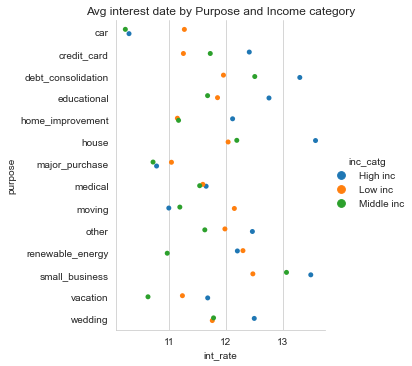

In [1591]:
### plot the average interest rate by purpose and income catg
sns.set_style("whitegrid")
sns.catplot(data=df7,x='int_rate',y='purpose',hue='inc_catg')
plt.title("Avg interest date by Purpose and Income category")
plt.show()

In [1592]:
### get the % of bad loan by purpose and income catg
p8 = loan_df.pivot_table(index=['purpose','inc_catg'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df8=p8.reset_index()
df8['Bad_loan_perc'] =   df8['Bad Loan']/(df8['Bad Loan']+df8['Good Loan'])
df8.sort_values(by='Bad_loan_perc',ascending=False)

status_catg             purpose    inc_catg  Bad Loan  Good Loan  \
34               small_business     Low inc        92        202   
31             renewable_energy     Low inc         7         18   
35               small_business  Middle inc       248        690   
15                        house    High inc         5         16   
16                        house     Low inc        15         52   
25                       moving     Low inc        40        146   
33               small_business    High inc        23         89   
37                     vacation     Low inc        19         80   
28                        other     Low inc       211        896   
7            debt_consolidation     Low inc       723       3258   
22                      medical     Low inc        31        144   
10                  educational     Low inc        22        105   
11                  educational  Middle inc        24        117   
27                        other    High inc        25        143   
19               major_purchase     Low inc        85        487   
32             renewable_energy  Middle inc         8         46   
23                      medical  Middle inc        59        341   
29                        other  Middle inc       319       1861   
30             renewable_energy    High inc         1          6   
8            debt_consolidation  Middle inc      1700      10242   
17                        house  Middle inc        33        202   
13             home_improvement     Low inc        51        332   
4                   credit_card     Low inc       126        821   
1                           car     Low inc        51        335   
38                     vacation  Middle inc        28        189   
26                       moving  Middle inc        37        258   
36                     vacation    High inc         2         14   
21                      medical    High inc         5         36   
40                      wedding     Low inc        23        170   
14             home_improvement  Middle inc       215       1631   
6            debt_consolidation    High inc       104        809   
2                           car  Middle inc        96        849   
5                   credit_card  Middle inc       331       3022   
41                      wedding  Middle inc        61        564   
39                      wedding    High inc         4         42   
12             home_improvement    High inc        26        293   
20               major_purchase  Middle inc       102       1171   
3                   credit_card    High inc        20        276   
24                       moving    High inc         2         36   
0                           car    High inc         3         56   
18               major_purchase    High inc         5        109   
9                   educational    High inc         0         10   

status_catg  Bad_loan_perc  
34                    0.31  
31                    0.28  
35                    0.26  
15                    0.24  
16                    0.22  
25                    0.22  
33                    0.21  
37                    0.19  
28                    0.19  
7                     0.18  
22                    0.18  
10                    0.17  
11                    0.17  
27                    0.15  
19                    0.15  
32                    0.15  
23                    0.15  
29                    0.15  
30                    0.14  
8                     0.14  
17                    0.14  
13                    0.13  
4                     0.13  
1                     0.13  
38                    0.13  
26                    0.13  
36                    0.12  
21                    0.12  
40                    0.12  
14                    0.12  
6                     0.11  
2                     0.10  
5                     0.10  
41                    0.10  
39                    0.09  
12                    0.08  
20

In [1593]:
##  format for heatmap
p8 = df8.pivot_table(index=['purpose'], columns=['inc_catg'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p8

inc_catg            High inc  Low inc  Middle inc
purpose                                          
car                        5       13          10
credit_card                6       13           9
debt_consolidation        11       18          14
educational                0       17          17
home_improvement           8       13          11
house                     23       22          14
major_purchase             4       14           8
medical                   12       17          14
moving                     5       21          12
other                     14       19          14
renewable_energy          14       28          14
small_business            20       31          26
vacation                  12       19          12
wedding                    8       11           9

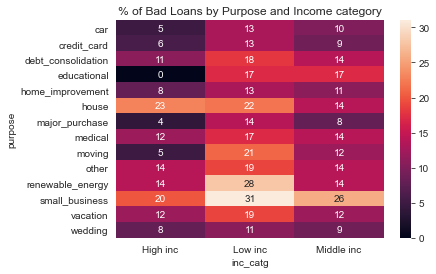

In [1594]:
## plot the heatmap for bad loan % by pupose and annual inc category
g=sns.heatmap(p8,annot=True)
g.set_title("% of Bad Loans by Purpose and Income category")
plt.show()

## Insights
1. In all categories middle income levels take the highest % of loans. 
2. 46% of education loans are taken by low income category and 51% by middle income. 36% of moving loans taken by low income category and 57% by middle income.  These are 2 purposes where low income leves take loans closer to the middle income levels.
3. Low income cateogry have the highest average interest for car, major purchase, moving, renewable energy loan purposes.  High income category has the average interest rate in credit card, debt consolidation, educational, home improvement, house related, small business, vacation, wedding purposes. For medical, the average interest rates are very similar for all income categories.
4. The small businesses loan for Low inc category are the riskiest loans with 31% bad loans.  The educational loans for High inc cateogory are the least risky loans with 0% bad loans.  
5. The risk variance between the highest and lowest risk combination is 31%.  

# Borrower analysis

### State analysis

In [1595]:
# Analysing the Address State where borrower lives to check if there is any relastionshi between the State and loan getting defaulted
addr_st_order = list(sorted(loan_df['addr_state'].unique()))

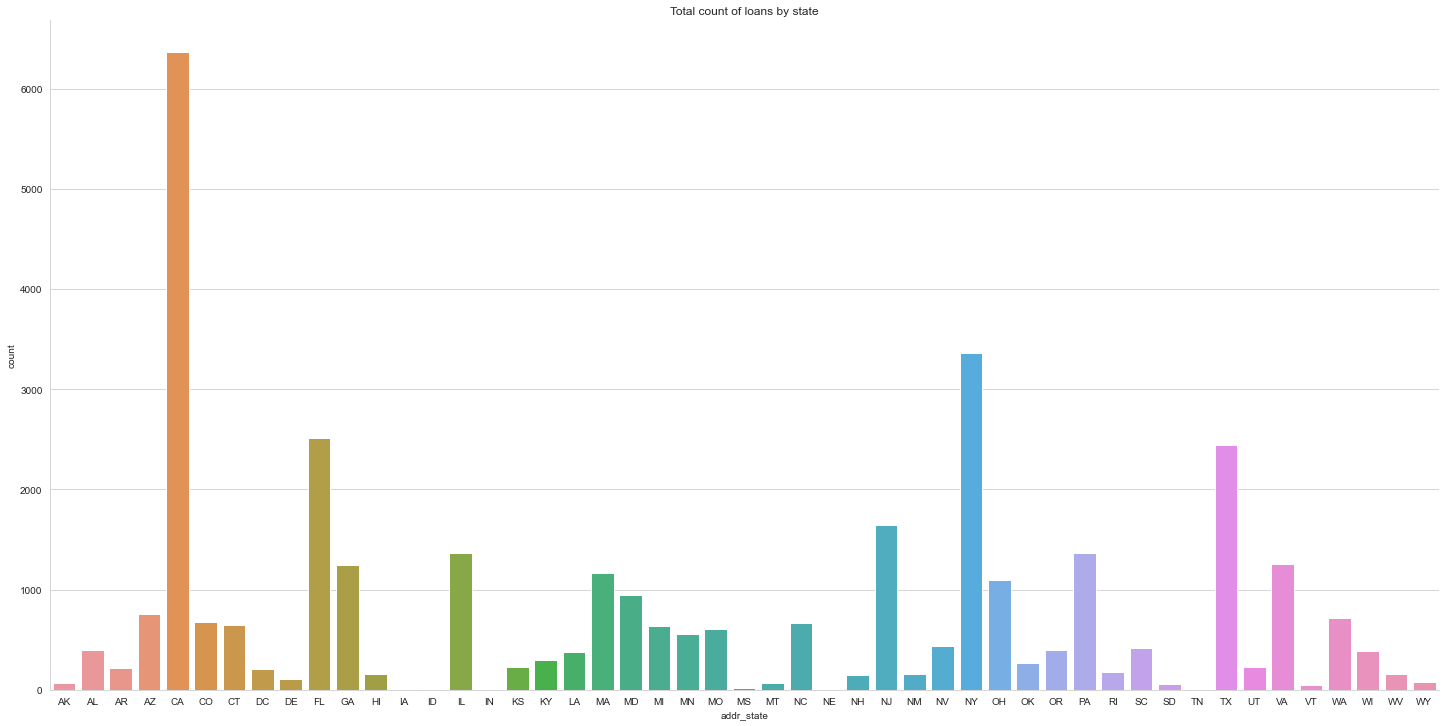

In [1596]:
# Plot no. of loans originated from different Address States
sns.catplot(data=loan_df,x='addr_state',kind='count',aspect=2,height=10,order=addr_st_order)
plt.title("Total count of loans by state")
plt.show()

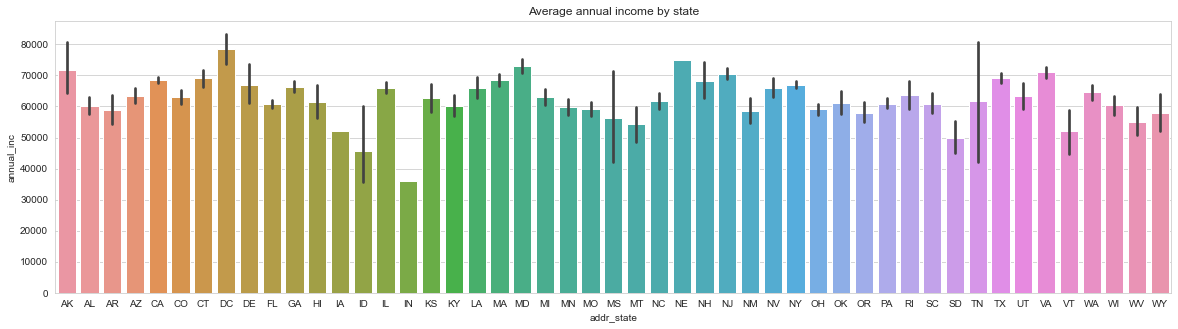

In [1597]:
# PlotAddress  State wise distribution of average annual income
fig, axes = plt.subplots(figsize=(20,5))
sns.barplot(data=loan_df,x='addr_state',y='annual_inc',estimator=np.mean,ax=axes,order=addr_st_order)
plt.title("Average annual income by state")
plt.show()

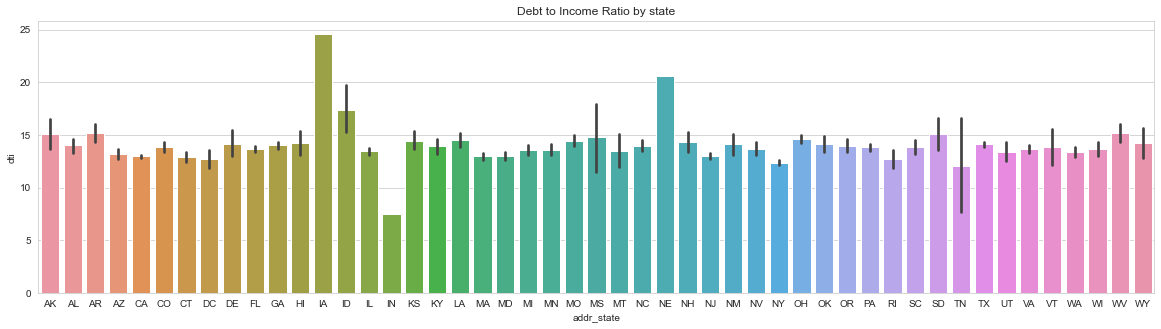

In [1598]:
# Plot Address State and "Debt to Income ratio across different States"
fig, axes = plt.subplots(figsize=(20,5))
sns.barplot(data=loan_df,x='addr_state',y='dti',estimator=np.mean,ax=axes,order=addr_st_order)
plt.title("Debt to Income Ratio by state")
plt.show()

In [1599]:
# Crosstab of Address State and count of Bad and Good Loans
p5 = loan_df.pivot_table(index='addr_state', columns='status_catg', values='id', aggfunc='count', fill_value=0)

In [1600]:
# Calculate the Bad loan percentage across Address States
p5['Bad_loan_perc'] = p5['Bad Loan']/(p5['Bad Loan']+p5['Good Loan'])*100
p5.reset_index(inplace=True)
p5.sort_values(by='Bad_loan_perc',ascending=False)

status_catg addr_state  Bad Loan  Good Loan  Bad_loan_perc
31                  NV        96        343          21.87
40                  TN         2          8          20.00
0                   AK        14         58          19.44
39                  SD        10         45          18.18
30                  NM        28        131          17.61
9                   FL       437       2079          17.37
11                  HI        26        127          16.99
23                  MO        98        511          16.09
35                  OR        63        335          15.83
45                  WA       113        603          15.78
10                  GA       196       1051          15.72
29                  NJ       258       1389          15.66
4                   CA       986       5377          15.50
20                  MD       142        801          15.06
28                  NH        22        125          14.97
17                  KY        44        250          14.97
26                  NC       100        569          14.95
42                  UT        33        195          14.47
38                  SC        60        361          14.25
21                  MI        89        548          13.97
34                  OK        38        234          13.97
3                   AZ       105        649          13.93
37                  RI        25        156          13.81
14                  IL       188       1179          13.75
32                  NY       444       2916          13.21
47                  WV        21        138          13.21
22                  MN        73        484          13.11
43                  VA       164       1089          13.09
46                  WI        50        337          12.92
44                  VT         6         41          12.77
25                  MT         9         62          12.68
33                  OH       138        958          12.59
6                   CT        79        563          12.31
1                   AL        48        350          12.06
18                  LA        45        337          11.78
19                  MA       137       1028          11.76
5                   CO        79        593          11.76
36                  PA       159       1207          11.64
2                   AR        25        191          11.57
41                  TX       279       2160          11.44
8                   DE        11         94          10.48
16                  KS        24        208          10.34
7                   DC        14        189           6.90
24                  MS         1         17           5.56
48                  WY         3         72           4.00
27                  NE         0          1           0.00
15                  IN         0          1           0.00
13                  ID         0          3           0.00
12                  IA         0          1           0.00

In [1601]:
# Arrange the Address State and Bad and Good loan table into descending order og totla bad loans
p51 =loan_df.pivot_table(index='addr_state', columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index().sort_values(by = ['Bad Loan'],ascending = False)
# Calculate the bad loan percentage
p51['Bad_loan_Perc'] = p51['Bad Loan']/(p51['Bad Loan']+p51['Good Loan'])*100
# Calculate good loan percentage
p51['Good_loan_Perc'] = p51['Good Loan']/(p51['Bad Loan']+p51['Good Loan'])*100

In [1602]:
## take the top 20 states with bad loans
p51[0:20]

status_catg addr_state  Bad Loan  Good Loan  Bad_loan_Perc  Good_loan_Perc
4                   CA       986       5377          15.50           84.50
32                  NY       444       2916          13.21           86.79
9                   FL       437       2079          17.37           82.63
41                  TX       279       2160          11.44           88.56
29                  NJ       258       1389          15.66           84.34
10                  GA       196       1051          15.72           84.28
14                  IL       188       1179          13.75           86.25
43                  VA       164       1089          13.09           86.91
36                  PA       159       1207          11.64           88.36
20                  MD       142        801          15.06           84.94
33                  OH       138        958          12.59           87.41
19                  MA       137       1028          11.76           88.24
45                  WA       113        603          15.78           84.22
3                   AZ       105        649          13.93           86.07
26                  NC       100        569          14.95           85.05
23                  MO        98        511          16.09           83.91
31                  NV        96        343          21.87           78.13
21                  MI        89        548          13.97           86.03
5                   CO        79        593          11.76           88.24
6                   CT        79        563          12.31           87.69

In [1603]:
p52 = p51.drop(['Bad Loan','Good Loan','Good_loan_Perc'],axis =1)[0:20]

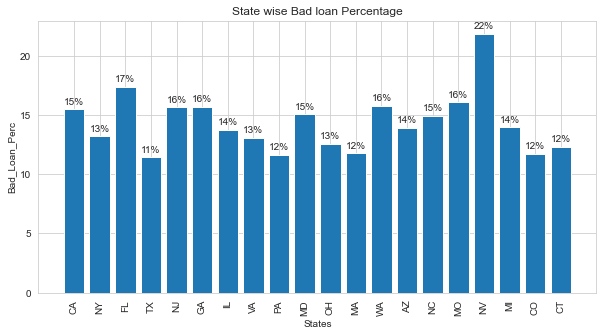

In [1604]:
## plot the % of bad loans by state
Plot_bar_chart_annot_rot(p52,"addr_state","Bad_loan_Perc",'States','Bad_Loan_Perc',"State wise Bad loan Percentage","%",90)

## Insights
Across states, we can see almost the distribution of bad vs good loans, except for state NV, where proportion of bad loans are mugh higher than the average bad loan proprtion, but then the volume of loans originating from state is low.

### Income analysis

In [1605]:
# Check the Income category and Status category for any relationship between them
pinc = loan_df.pivot_table(index='inc_catg', columns='status_catg', values='id', aggfunc='count', fill_value=0)

In [1606]:
# Calculate the Bad loan percentage
pinc['Bad_loan_perc'] = pinc['Bad Loan']/(pinc['Bad Loan']+pinc['Good Loan'])*100
pinc.reset_index(inplace=True)
pinc.sort_values(by='Bad_loan_perc',ascending=False)

status_catg    inc_catg  Bad Loan  Good Loan  Bad_loan_perc
1               Low inc      1496       7046          17.51
2            Middle inc      3261      21183          13.34
0              High inc       225       1935          10.42

In [1607]:
pinc2 = pinc.drop(['Bad Loan','Good Loan'],axis = 1)

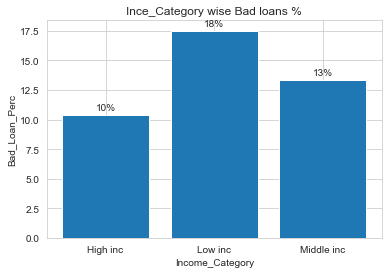

In [1608]:
Plot_bar_chart_annot(pinc2,'inc_catg','Bad_loan_perc','Income_Category','Bad_Loan_Perc',"Ince_Category wise Bad loans %","%")

## Insights
Borrowers with low income category have high proportion of bad loans(18%) vs. borrowers with high income category where the proprotion of bad loans was 10%

In [1609]:
# check the income category with Loan grade relationshipn in terms of total loans granted
p_igrd= pd.crosstab(loan_df['inc_catg'], loan_df['grade'],normalize='index')
p_igrd

grade         A    B    C    D    E    F    G
inc_catg                                     
High inc   0.23 0.29 0.18 0.13 0.11 0.04 0.02
Low inc    0.26 0.32 0.22 0.13 0.05 0.01 0.00
Middle inc 0.26 0.30 0.20 0.13 0.07 0.03 0.01

<Figure size 720x360 with 0 Axes>

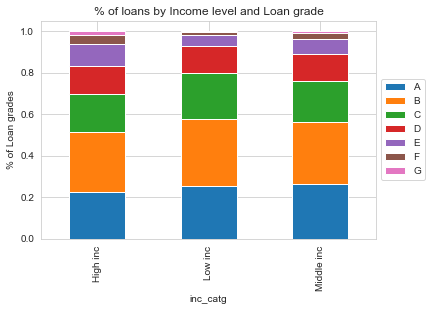

In [1610]:
# Plot Income category and Loan grades
plt.figure(figsize=(10,5))
p_igrd.plot(kind="bar",stacked=True)
plt.ylabel("% of Loan grades")
plt.title("% of loans by Income level and Loan grade")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [1611]:
# Check the Income category and Grade wise distribution of bad and Good Loans
p_igrd = loan_df.pivot_table(index=['inc_catg','grade'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_igrd=p_igrd.reset_index()
df_igrd['Bad_loan_perc'] =   df_igrd['Bad Loan']/(df_igrd['Bad Loan']+df_igrd['Good Loan'])*100
df_igrd.sort_values(by='Bad Loan',ascending=False)

status_catg    inc_catg grade  Bad Loan  Good Loan  Bad_loan_perc
16           Middle inc     C       776       4089          15.95
15           Middle inc     B       774       6525          10.60
17           Middle inc     D       657       2551          20.48
18           Middle inc     E       455       1306          25.84
8               Low inc     B       439       2303          16.01
9               Low inc     C       378       1506          20.06
14           Middle inc     A       312       6124           4.85
10              Low inc     D       287        848          25.29
19           Middle inc     F       218        456          32.34
7               Low inc     A       196       1988           8.97
11              Low inc     E       139        304          31.38
20           Middle inc     G        69        132          34.33
4              High inc     E        51        184          21.70
1              High inc     B        50        579           7.95
3              High inc     D        47        243          16.21
12              Low inc     F        38         81          31.93
2              High inc     C        34        358           8.67
5              High inc     F        24         66          26.67
13              Low inc     G        19         16          54.29
0              High inc     A        14        472           2.88
6              High inc     G         5         33          13.16

In [1612]:
p_igrd = df_igrd.pivot_table(index=['inc_catg'], columns=['grade'], values='Bad_loan_perc', fill_value=0)
p_igrd

grade         A     B     C     D     E     F     G
inc_catg                                           
High inc   2.88  7.95  8.67 16.21 21.70 26.67 13.16
Low inc    8.97 16.01 20.06 25.29 31.38 31.93 54.29
Middle inc 4.85 10.60 15.95 20.48 25.84 32.34 34.33

Text(0.5, 1.0, '% of Bad loans by Income Category and Loan grade')

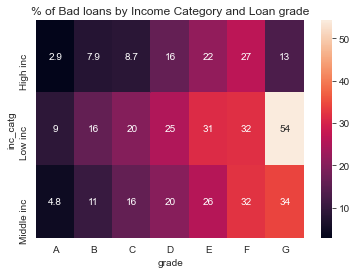

In [1613]:
# Heat map of Income category and Loan grade wise priportion of Bad loan
sns.heatmap(p_igrd,annot=True)
plt.title("% of Bad loans by Income Category and Loan grade")

## Insight
Majority of the borrowers with low income have defaulted loan as they have been granted the loans on higher interest rate and they were falling in the loan grade of E, F, G 

### Income category and Loan Amount

In [1614]:
# Analyse the income category and Loan Amount
p_inco_loan_amt = loan_df.pivot_table(index=['inc_catg','loan_amnt_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

In [1615]:
# Calculate the Bad lona percentage 
p_inco_loan_amt['Bad_loan_perc'] = p_inco_loan_amt['Bad Loan']/(p_inco_loan_amt['Bad Loan']+p_inco_loan_amt['Good Loan'])*100
p_inco_loan_amt['Good_loan_perc'] = p_inco_loan_amt['Good Loan']/(p_inco_loan_amt['Bad Loan']+p_inco_loan_amt['Good Loan'])*100
p_inco_loan_amt

status_catg    inc_catg loan_amnt_range  Bad Loan  Good Loan  Bad_loan_perc  \
0              High inc           0K-5K        18        169           9.63   
1              High inc          5K-10K        51        413          10.99   
2              High inc         10K-15K        36        425           7.81   
3              High inc         15K-20K        22        295           6.94   
4              High inc         20K-25K        58        373          13.46   
5              High inc         25K-30K        20        119          14.39   
6              High inc         30K-35K        20        141          12.42   
7               Low inc           0K-5K       557       3028          15.54   
8               Low inc          5K-10K       570       2775          17.04   
9               Low inc         10K-15K       261        957          21.43   
10              Low inc         15K-20K        88        253          25.81   
11              Low inc         20K-25K        19         31          38.00   
12              Low inc         25K-30K         1          2          33.33   
13           Middle inc           0K-5K       551       4136          11.76   
14           Middle inc          5K-10K       839       7078          10.60   
15           Middle inc         10K-15K       651       4829          11.88   
16           Middle inc         15K-20K       578       2784          17.19   
17           Middle inc         20K-25K       395       1650          19.32   
18           Middle inc         25K-30K       112        384          22.58   
19           Middle inc         30K-35K       135        322          29.54   

status_catg  Good_loan_perc  
0                     90.37  
1                     89.01  
2                     92.19  
3                     93.06  
4                     86.54  
5                     85.61  
6                     87.58  
7                     84.46  
8                     82.96  
9                     78.57  
10                    74.19  
11                    62.00  
12                    66.67  
13                    88.24  
14                    89.40  
15                    88.12  
16                    82.81  
17                    80.68  
18                    77.42  
19                    70.46

In [1616]:
p_inco_loan_amt = p_inco_loan_amt.pivot_table(index=['inc_catg'], columns=['loan_amnt_range'], values='Bad_loan_perc', fill_value=0)
p_inco_loan_amt

loan_amnt_range  0K-5K  5K-10K  10K-15K  15K-20K  20K-25K  25K-30K  30K-35K
inc_catg                                                                   
High inc          9.63   10.99     7.81     6.94    13.46    14.39    12.42
Low inc          15.54   17.04    21.43    25.81    38.00    33.33     0.00
Middle inc       11.76   10.60    11.88    17.19    19.32    22.58    29.54

Text(0.5, 1.0, '% of Bad loans by Income Category and Loan Amount')

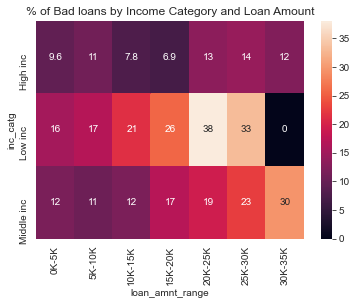

In [1617]:
sns.heatmap(p_inco_loan_amt,annot=True)
plt.title("% of Bad loans by Income Category and Loan Amount")


### Debt to income Ratio + Income Category

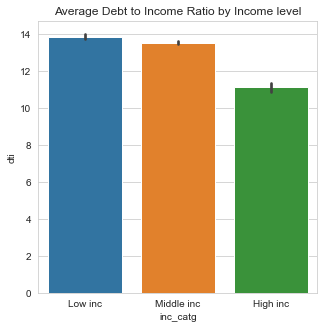

In [1618]:
# Plot the income category and Debt to Income ratio to ccgeck the relationship
fig, axes = plt.subplots(figsize=(5,5))
sns.barplot(data=loan_df,x='inc_catg',y='dti',estimator=np.mean,ax=axes)
plt.title("Average Debt to Income Ratio by Income level")
plt.show()

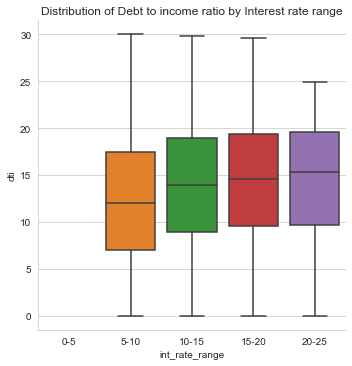

In [1619]:
# Plot DTI across interest range band
sns.catplot(x='int_rate_range',y='dti',data=loan_df,kind='box')
plt.title("Distribution of Debt to income ratio by Interest rate range")
plt.show()

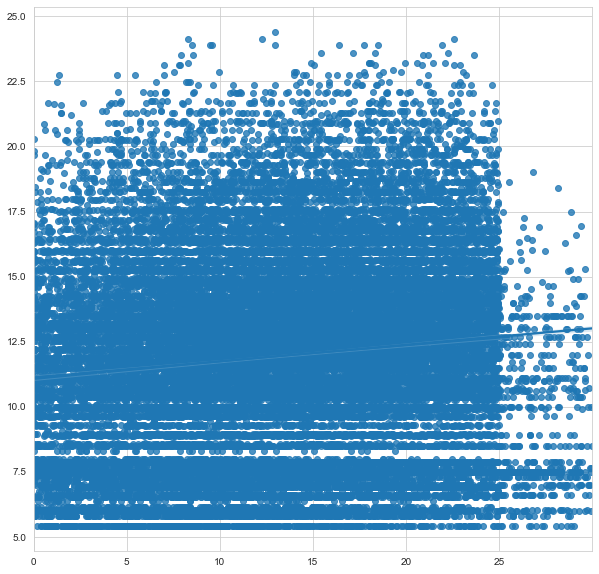

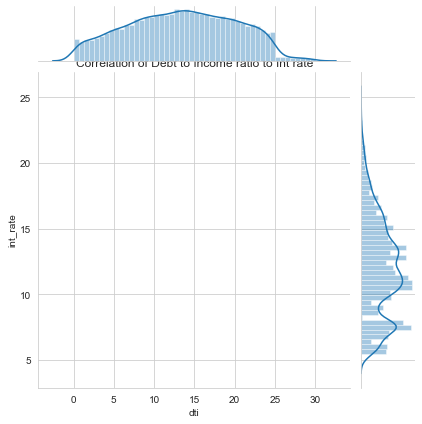

In [1620]:
## get the correlation of dti to interest rate
fig, axes = plt.subplots(figsize=(10,10))
sns.jointplot(x='dti',y='int_rate',data=loan_df,kind="reg",ax=axes)
plt.title("Correlation of Debt to Income ratio to Int rate")
plt.show()

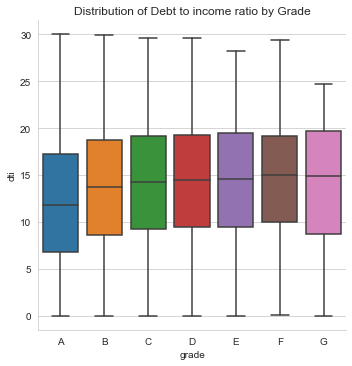

In [1621]:
## understand the distbribution and median of the Dti by Loan grade
grade_order=sorted(loan_df['grade'].unique())
sns.catplot(x='grade',y='dti',data=loan_df,kind='box',order=grade_order)
plt.title("Distribution of Debt to income ratio by Grade")
plt.show()

In [1622]:
# Create bins for dti variable
cut_labels = ['0-5', '5-10', '10-15', '15-20', '20-25','25-30']
loan_df['dti_range']=pd.cut(loan_df['dti'], bins=np.linspace(0,30,7),labels=cut_labels)
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500          2500.00   60 months   
1  1076863    1277178      10000        10000         10000.00   36 months   
3  1075269    1311441       5000         5000          5000.00   36 months   
4  1069639    1304742       7000         7000          7000.00   60 months   
5  1072053    1288686       3000         3000          3000.00   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     15.27        59.83     C        C4   < 1 year           RENT   
1     13.49       339.31     C        C1  10+ years           RENT   
3      7.90       156.46     A        A4    3 years           RENT   
4     15.96       170.08     C        C5    8 years           RENT   
5     18.64       109.43     E        E1    9 years           RENT   

   annual_inc verification_status    issue_d  loan_status             purpose  \
0    30000.00     Source Verified 2011-12-01  Charged Off                 car   
1    49200.00     Source Verified 2011-12-01   Fully Paid               other   
3    36000.00     Source Verified 2011-12-01   Fully Paid             wedding   
4    47004.00        Not Verified 2011-12-01   Fully Paid  debt_consolidation   
5    48000.00     Source Verified 2011-12-01   Fully Paid                 car   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         GA  1.00            0       1999-04-01               5         3   
1         CA 20.00            0       1996-02-01               1        10   
3         AZ 11.20            0       2004-11-01               3         9   
4         NC 23.51            0       2005-07-01               1         7   
5         CA  5.35            0       2007-01-01               2         4   

   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0       1687        9.40          4       0.00           0.00   
1        0       5598       21.00         37       0.00           0.00   
3        0       7963       28.30         12       0.00           0.00   
4        0      17726       85.60         11       0.00           0.00   
5        0       8221       87.50          4       0.00           0.00   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      1008.71          1008.71           456.46         435.17   
1     12231.89         12231.89         10000.00        2214.92   
3      5632.21          5632.21          5000.00         632.21   
4     10110.84         10110.84          6985.61        3125.23   
5      3939.14          3939.14          3000.00         939.14   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00      117.08                     1.11   2013-04-01   
1               16.97        0.00                     0.00   2015-01-01   
3                0.00        0.00                     0.00   2015-01-01   
4                0.00        0.00                     0.00   2016-05-01   
5                0.00        0.00                     0.00   2015-01-01   

   last_pymnt_amnt  pub_rec_bankruptcies                emp_title  \
0           119.66                  0.00                    ryder   
1           357.48                  0.00        airresourcesboard   
3           161.03                  0.00      veoliatransportaton   
4          1313.76                  0.00  southernstarphotography   
5           111.34                  0.00            mkcaccounting   

  earliest_cr_line_chng status_catg    inc_catg loan_amnt_range  \
0            1999-04-01    Bad Loan     Low inc           0K-5K   
1            1996-02-01   Good Loan  Middle inc          5K-10K   
3            2004-11-01   Good Loan     Low inc           0K-5K   
4            2005-07-01   Good Loan  Middle inc          5K-10K   
5            2007-01-01   Good Loan  Middle inc           0K-5K   

  int_rate_range  issue_year  mths_issue_last

In [1623]:
# Analyse dti range and Bad and Good Loan Count
p_temp = loan_df.pivot_table(index='dti_range', columns='status_catg', values='id', aggfunc='count', fill_value=0).sort_values(by = 'Bad Loan', ascending = False).reset_index()

In [1624]:
# To calculate the Bad loan %
p_temp['Bad_Loan_Perc'] = p_temp['Bad Loan']/(p_temp['Good Loan']+p_temp['Bad Loan'])*100

In [1625]:
# To calculate the Good loan %
p_temp['Good_Loan_Perc'] = p_temp['Good Loan']/(p_temp['Good Loan']+p_temp['Bad Loan'])*100

In [1626]:
p_temp

status_catg dti_range  Bad Loan  Good Loan  Bad_Loan_Perc  Good_Loan_Perc
0               10-15      1257       7592          14.20           85.80
1               15-20      1253       6918          15.33           84.67
2               20-25      1015       5164          16.43           83.57
3                5-10       857       6181          12.18           87.82
4                 0-5       500       3697          11.91           88.09
5               25-30        78        496          13.59           86.41

In [1627]:
p_temp1=p_temp.drop(['Bad Loan','Good Loan','Good_Loan_Perc'], axis =1)

In [1628]:
p_temp1

status_catg dti_range  Bad_Loan_Perc
0               10-15          14.20
1               15-20          15.33
2               20-25          16.43
3                5-10          12.18
4                 0-5          11.91
5               25-30          13.59

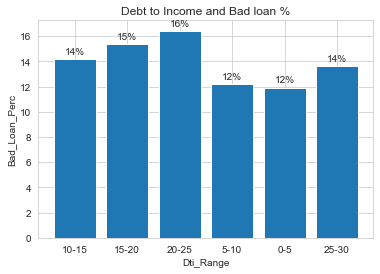

In [1629]:
Plot_bar_chart_annot(p_temp1,'dti_range','Bad_Loan_Perc','Dti_Range','Bad_Loan_Perc',"Debt to Income and Bad loan %","%")

In [1630]:
# Analyse the dti range and Income category of borrower
p_dti_inc = loan_df.pivot_table(index=['dti_range','inc_catg'], columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

In [1631]:
# Bad loan percentage calculation
p_dti_inc['Bad_loan_perc'] =   p_dti_inc['Bad Loan']/(p_dti_inc['Bad Loan']+p_dti_inc['Good Loan'])*100
p_dti_inc.sort_values(by='Bad Loan',ascending=False)

status_catg dti_range    inc_catg  Bad Loan  Good Loan  Bad_loan_perc
11              15-20  Middle inc       848       5017          14.46
8               10-15  Middle inc       828       5471          13.14
14              20-25  Middle inc       662       3528          15.80
5                5-10  Middle inc       548       4311          11.28
7               10-15     Low inc       365       1610          18.48
10              15-20     Low inc       350       1573          18.20
13              20-25     Low inc       335       1475          18.51
2                 0-5  Middle inc       317       2443          11.49
4                5-10     Low inc       244       1274          16.07
1                 0-5     Low inc       161        928          14.78
3                5-10    High inc        65        596           9.83
6               10-15    High inc        64        511          11.13
9               15-20    High inc        55        328          14.36
17              25-30  Middle inc        49        346          12.41
16              25-30     Low inc        28        140          16.67
0                 0-5    High inc        22        326           6.32
12              20-25    High inc        18        161          10.06
15              25-30    High inc         1         10           9.09

In [1632]:
## format for heatmap
p_dti_inc_tab = p_dti_inc.pivot_table(index=['dti_range'], columns=['inc_catg'], values='Bad_loan_perc', fill_value=0)
p_dti_inc_tab

inc_catg   High inc  Low inc  Middle inc
dti_range                               
0-5            6.32    14.78       11.49
5-10           9.83    16.07       11.28
10-15         11.13    18.48       13.14
15-20         14.36    18.20       14.46
20-25         10.06    18.51       15.80
25-30          9.09    16.67       12.41

Text(0.5, 1.0, '% of Bad loans by dti_range and Interest range ')

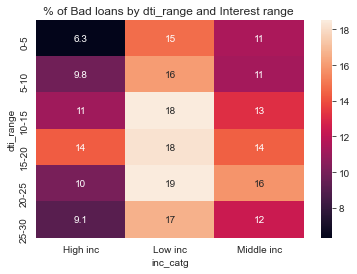

In [1633]:
## plot the heatmap for bad loans by dti range and interest rate
sns.heatmap(p_dti_inc_tab,annot=True)
plt.title("% of Bad loans by dti_range and Interest range ")

In [1634]:
# Analyse the dti range and Loan Amount relationship 
p_dti_loan_amt = loan_df.pivot_table(index=['dti_range','loan_amnt_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

In [1635]:
# Bad loan percentage calculation
p_dti_loan_amt['Bad_loan_perc'] =   p_dti_loan_amt['Bad Loan']/(p_dti_loan_amt['Bad Loan']+p_dti_loan_amt['Good Loan'])*100
p_dti_loan_amt.sort_values(by='Bad Loan',ascending=False)

status_catg dti_range loan_amnt_range  Bad Loan  Good Loan  Bad_loan_perc
15              10-15          5K-10K       378       2526          13.02
22              15-20          5K-10K       356       2257          13.62
29              20-25          5K-10K       284       1716          14.20
21              15-20           0K-5K       267       1531          14.85
14              10-15           0K-5K       255       1721          12.90
16              10-15         10K-15K       249       1644          13.15
8                5-10          5K-10K       249       2201          10.16
23              15-20         10K-15K       238       1517          13.56
28              20-25           0K-5K       220       1199          15.50
7                5-10           0K-5K       203       1524          11.75
30              20-25         10K-15K       192       1088          15.00
17              10-15         15K-20K       188        909          17.14
24              15-20         15K-20K       182        819          18.18
9                5-10         10K-15K       173       1264          12.04
31              20-25         15K-20K       172        634          21.34
1                 0-5          5K-10K       164       1351          10.83
0                 0-5           0K-5K       162       1222          11.71
25              15-20         20K-25K       121        538          18.36
18              10-15         20K-25K       120        568          17.44
11               5-10         20K-25K        94        380          19.83
10               5-10         15K-20K        93        623          12.99
32              20-25         20K-25K        89        360          19.82
2                 0-5         10K-15K        79        586          11.88
27              15-20         30K-35K        45        107          29.61
26              15-20         25K-30K        44        149          22.80
20              10-15         30K-35K        40        124          24.39
4                 0-5         20K-25K        39        169          18.75
3                 0-5         15K-20K        38        270          12.34
33              20-25         25K-30K        30         86          25.86
34              20-25         30K-35K        28         81          25.69
19              10-15         25K-30K        27        100          21.26
13               5-10         30K-35K        24         91          20.87
12               5-10         25K-30K        21         98          17.65
36              25-30          5K-10K        21        160          11.60
37              25-30         10K-15K        15         99          13.16
38              25-30         15K-20K        14         70          16.67
6                 0-5         30K-35K        12         49          19.67
39              25-30         20K-25K         9         37          19.57
35              25-30           0K-5K         8         98           7.55
5                 0-5         25K-30K         6         50          10.71
41              25-30         30K-35K         6         11          35.29
40              25-30         25K-30K         5         21          19.23

In [1636]:
p_dti_loan_amt_tab = p_dti_loan_amt.pivot_table(index=['dti_range'], columns=['loan_amnt_range'], values='Bad_loan_perc', fill_value=0)
p_dti_loan_amt_tab

loan_amnt_range  0K-5K  5K-10K  10K-15K  15K-20K  20K-25K  25K-30K  30K-35K
dti_range                                                                  
0-5              11.71   10.83    11.88    12.34    18.75    10.71    19.67
5-10             11.75   10.16    12.04    12.99    19.83    17.65    20.87
10-15            12.90   13.02    13.15    17.14    17.44    21.26    24.39
15-20            14.85   13.62    13.56    18.18    18.36    22.80    29.61
20-25            15.50   14.20    15.00    21.34    19.82    25.86    25.69
25-30             7.55   11.60    13.16    16.67    19.57    19.23    35.29

Text(0.5, 1.0, '% of Bad loans by dti_range and Loan Amount ')

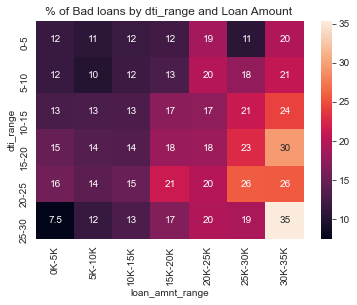

In [1637]:
# Heatmap of dti range and loan amount range
sns.heatmap(p_dti_loan_amt_tab,annot=True)
plt.title("% of Bad loans by dti_range and Loan Amount ")

### Insight
Borrower with dti greater than 10% and applied for loan amouynt in the range of 25k -35k, is more likely to default

## Dti and Loan Term analysis

In [1638]:
# Analyse the dti range and Lona term 
p_dti_term = loan_df.pivot_table(index=['dti_range','term'], columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

In [1639]:
# Bad loan percentage calculation
p_dti_term['Bad_loan_perc'] =   p_dti_term['Bad Loan']/(p_dti_term['Bad Loan']+p_dti_term['Good Loan'])*100
p_dti_term.sort_values(by='Bad Loan',ascending=False)

status_catg dti_range        term  Bad Loan  Good Loan  Bad_loan_perc
6               15-20   36 months       683       5257          11.50
4               10-15   36 months       681       5884          10.37
5               10-15   60 months       576       1708          25.22
7               15-20   60 months       570       1661          25.55
8               20-25   36 months       535       3874          12.13
2                5-10   36 months       513       4976           9.35
9               20-25   60 months       480       1290          27.12
3                5-10   60 months       344       1205          22.21
0                 0-5   36 months       306       3049           9.12
1                 0-5   60 months       194        648          23.04
11              25-30   60 months        48        170          22.02
10              25-30   36 months        30        326           8.43

In [1640]:
p_dti_term_tab = p_dti_term.pivot_table(index=['dti_range'], columns=['term'], values='Bad_loan_perc', fill_value=0)
p_dti_term_tab

term        36 months   60 months
dti_range                        
0-5              9.12       23.04
5-10             9.35       22.21
10-15           10.37       25.22
15-20           11.50       25.55
20-25           12.13       27.12
25-30            8.43       22.02

Text(0.5, 1.0, '% of Bad loans by dti_range and Loan Term')

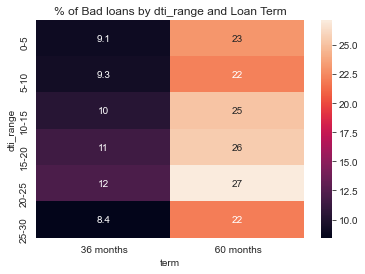

In [1641]:
sns.heatmap(p_dti_term_tab,annot=True)
plt.title("% of Bad loans by dti_range and Loan Term")

## Employment title analysis

In [1642]:
# Check the employee title and the loan status to check if employee title does have any impact on loan defaults]
p7 =loan_df.pivot_table(index='emp_title', columns='status_catg', values='id', aggfunc='count', fill_value=0).sort_values(by =['Bad Loan'], ascending = False)

In [1643]:
# Calculate the bad loan percentage
p7['Bad_loan_Perc'] = p7['Bad Loan']/(p7['Bad Loan']+p7['Good Loan'])*100

In [1644]:
# Calculate good loan percentage
p7['Good_loan_Perc'] = p7['Good Loan']/(p7['Bad Loan']+p7['Good Loan'])*100

In [1645]:
p_emp=p7.drop(['Bad Loan','Good Loan'],axis = 1)[0:15]

In [1646]:
p_emp

status_catg                Bad_loan_Perc  Good_loan_Perc
emp_title                                               
unitedstatesarmy                   14.92           85.08
unitedstatespostalservice          19.70           80.30
walmart                            22.08           77.92
bankofamerica                      17.45           82.55
selfemployed                       17.11           82.89
verizon                            16.43           83.57
unitedstatesairforce               11.06           88.94
ups                                20.37           79.63
wellsfargo                         13.55           86.45
att                                16.67           83.33
usnavy                             16.50           83.50
usgovernment                       11.93           88.07
departmentofdefense                15.48           84.52
homedepot                          16.90           83.10
kaiserpermanente                   13.75           86.25

In [1647]:
p_emp_1 = p_emp.drop('Good_loan_Perc',axis=1).reset_index()

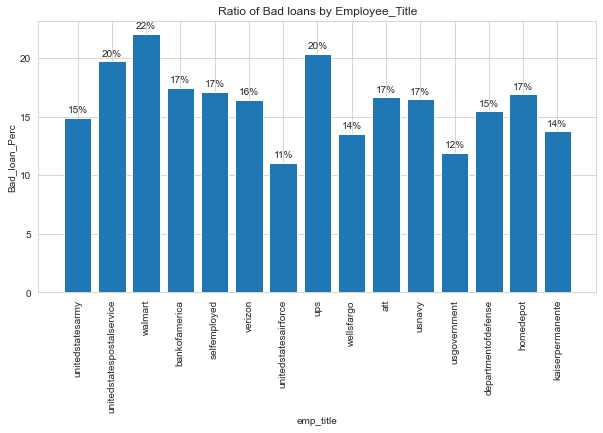

In [1648]:
Plot_bar_chart_annot_rot(p_emp_1,'emp_title','Bad_loan_Perc','emp_title','Bad_loan_Perc',"Ratio of Bad loans by Employee_Title","%",90)

## Insights
In United states parcel service, united states postal service and Walmart ,the proprotion of loan defaulters are more as compared to  borrowers with other employment title.
We have to add a graph here as well for this insight.

## Verification status

In [1649]:
# Analyse the Income verification status and the Status category
p_temp = loan_df.pivot_table(index='verification_status', columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

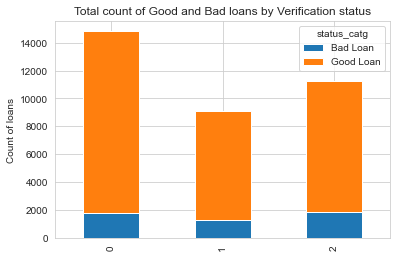

In [1650]:
# Plot the verification status and proportion of Bad and Good Loans
p_temp.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Verification status")
plt.show()

In [1651]:
# Calculate the Bad loan percentage 
p_temp['Bad_loan_perc'] = p_temp['Bad Loan']/(p_temp['Bad Loan']+p_temp['Good Loan'])*100
#p_temp.reset_index(inplace=True)
p_temp

status_catg verification_status  Bad Loan  Good Loan  Bad_loan_perc
0                  Not Verified      1798      13027          12.13
1               Source Verified      1329       7764          14.62
2                      Verified      1855       9373          16.52

In [1652]:
p_temp_ver = p_temp.drop(['Bad Loan','Good Loan'],axis= 1)

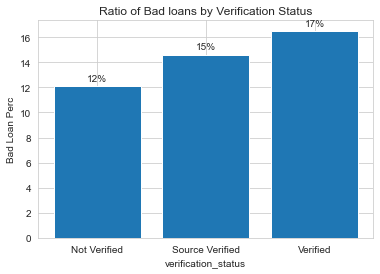

In [1653]:
# Plot the deafult rate of Verification Status
Plot_bar_chart_annot(p_temp_ver,'verification_status','Bad_loan_perc','verification_status','Bad Loan Perc',"Ratio of Bad loans by Verification Status","%")

In [1654]:
# Analyse the Income verification status and the Interest Rate
p_temp_ver_interesr = loan_df.pivot_table(index=['verification_status','int_rate_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

In [1655]:
# Calculate the Bad lona percentage 
p_temp_ver_interesr['Bad_loan_perc'] = p_temp_ver_interesr['Bad Loan']/(p_temp_ver_interesr['Bad Loan']+p_temp_ver_interesr['Good Loan'])*100
p_temp_ver_interesr

status_catg verification_status int_rate_range  Bad Loan  Good Loan  \
0                  Not Verified           5-10       341       5156   
1                  Not Verified          10-15      1021       6401   
2                  Not Verified          15-20       409       1431   
3                  Not Verified          20-25        27         39   
4               Source Verified           5-10       187       2753   
5               Source Verified          10-15       573       3475   
6               Source Verified          15-20       487       1428   
7               Source Verified          20-25        82        108   
8                      Verified           5-10       167       2460   
9                      Verified          10-15       791       4416   
10                     Verified          15-20       738       2208   
11                     Verified          20-25       159        289   

status_catg  Bad_loan_perc  
0                     6.20  
1                    13.76  
2                    22.23  
3                    40.91  
4                     6.36  
5                    14.16  
6                    25.43  
7                    43.16  
8                     6.36  
9                    15.19  
10                   25.05  
11                   35.49

In [1656]:
# Analyse the relationship between verification status Interest ratew range
p_temp_ver_interesr_tab = p_temp_ver_interesr.pivot_table(index=['verification_status'], columns=['int_rate_range'], values='Bad_loan_perc', fill_value=0)
p_temp_ver_interesr_tab


int_rate_range       5-10  10-15  15-20  20-25
verification_status                           
Not Verified         6.20  13.76  22.23  40.91
Source Verified      6.36  14.16  25.43  43.16
Verified             6.36  15.19  25.05  35.49

Text(0.5, 1.0, '% of Bad loans by Verification status and Interest rate range')

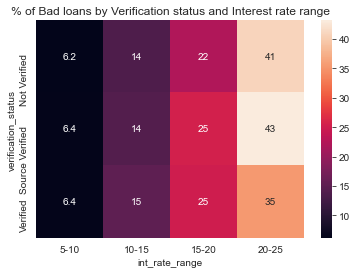

In [1657]:
# heatmap to analyse the relationship between verification status and interest rate
sns.heatmap(p_temp_ver_interesr_tab,annot=True)
plt.title("% of Bad loans by Verification status and Interest rate range")

## Home ownership analysis

In [1658]:
# Analyse the borrower's home ownership and the sattus category for any relationship between them
p_temp = loan_df.pivot_table(index='home_ownership', columns='status_catg', values='id', aggfunc='count', fill_value=0)

In [1659]:
p_temp

status_catg     Bad Loan  Good Loan
home_ownership                     
MORTGAGE            2057      13437
OTHER                 18         74
OWN                  349       2147
RENT                2558      14506

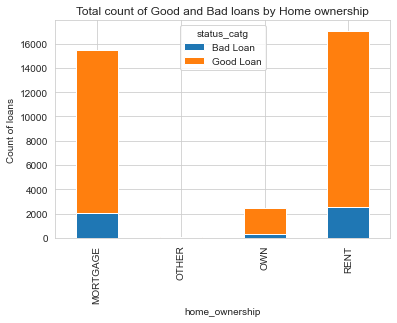

In [1660]:
# Plot home ownership and the proportion of Bad and Good loans
p_temp.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Home ownership")
plt.show()

In [1661]:
# Calculate Bad loan percentage
p_temp['Bad_loan_perc'] = p_temp['Bad Loan']/(p_temp['Bad Loan']+p_temp['Good Loan'])*100
p_temp.reset_index(inplace=True)
p_temp

status_catg home_ownership  Bad Loan  Good Loan  Bad_loan_perc
0                 MORTGAGE      2057      13437          13.28
1                    OTHER        18         74          19.57
2                      OWN       349       2147          13.98
3                     RENT      2558      14506          14.99

In [1662]:
p_temp_ver= p_temp.drop(['Bad Loan','Good Loan'],axis = 1)

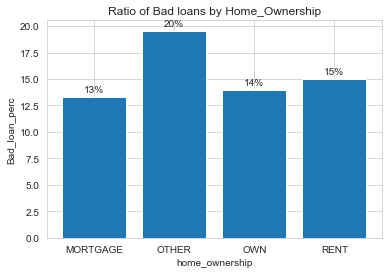

In [1663]:
# Plot the homeownership and percentage of Bad loans
Plot_bar_chart_annot(p_temp_ver,'home_ownership','Bad_loan_perc','home_ownership','Bad_loan_perc',"Ratio of Bad loans by Home_Ownership","%")

#### Home ownership and Loan Term

In [1664]:
# Analyse home ownership with Loan term
p_temp_home_own_term = loan_df.pivot_table(index=['home_ownership','term'], columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

In [1665]:
# Calculate the Bad lona percentage 
p_temp_home_own_term['Bad_loan_perc'] = p_temp_home_own_term['Bad Loan']/(p_temp_home_own_term['Bad Loan']+p_temp_home_own_term['Good Loan'])*100
p_temp_home_own_term['Good_loan_perc'] = p_temp_home_own_term['Good Loan']/(p_temp_home_own_term['Bad Loan']+p_temp_home_own_term['Good Loan'])*100

p_temp_home_own_term

status_catg home_ownership        term  Bad Loan  Good Loan  Bad_loan_perc  \
0                 MORTGAGE   36 months      1007       9785           9.33   
1                 MORTGAGE   60 months      1050       3652          22.33   
2                    OTHER   36 months        17         74          18.68   
3                    OTHER   60 months         1          0         100.00   
4                      OWN   36 months       188       1711           9.90   
5                      OWN   60 months       161        436          26.97   
6                     RENT   36 months      1554      11896          11.55   
7                     RENT   60 months      1004       2610          27.78   

status_catg  Good_loan_perc  
0                     90.67  
1                     77.67  
2                     81.32  
3                      0.00  
4                     90.10  
5                     73.03  
6                     88.45  
7                     72.22

### Home ownership and Interest rate

In [1666]:
# Analyse home ownership with Loan Interest rate
p_temp_home_own_Interrate = loan_df.pivot_table(index=['home_ownership','int_rate_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

In [1667]:
# Calculate the Bad lona percentage 
p_temp_home_own_Interrate['Bad_loan_perc'] = p_temp_home_own_Interrate['Bad Loan']/(p_temp_home_own_Interrate['Bad Loan']+p_temp_home_own_Interrate['Good Loan'])*100
p_temp_home_own_Interrate['Good_loan_perc'] = p_temp_home_own_Interrate['Good Loan']/(p_temp_home_own_Interrate['Bad Loan']+p_temp_home_own_Interrate['Good Loan'])*100

p_temp_home_own_Interrate

status_catg home_ownership int_rate_range  Bad Loan  Good Loan  Bad_loan_perc  \
0                 MORTGAGE           5-10       301       5213           5.46   
1                 MORTGAGE          10-15       973       5864          14.23   
2                 MORTGAGE          15-20       665       2138          23.72   
3                 MORTGAGE          20-25       118        222          34.71   
4                    OTHER           5-10         2         24           7.69   
5                    OTHER          10-15         9         40          18.37   
6                    OTHER          15-20         7         10          41.18   
7                      OWN           5-10        52        785           6.21   
8                      OWN          10-15       161        992          13.96   
9                      OWN          15-20       113        345          24.67   
10                     OWN          20-25        23         25          47.92   
11                    RENT           5-10       340       4347           7.25   
12                    RENT          10-15      1242       7396          14.38   
13                    RENT          15-20       849       2574          24.80   
14                    RENT          20-25       127        189          40.19   

status_catg  Good_loan_perc  
0                     94.54  
1                     85.77  
2                     76.28  
3                     65.29  
4                     92.31  
5                     81.63  
6                     58.82  
7                     93.79  
8                     86.04  
9                     75.33  
10                    52.08  
11                    92.75  
12                    85.62  
13                    75.20  
14                    59.81

In [1668]:
p_temp_home_own_Interrate_tab = p_temp_home_own_Interrate.pivot_table(index=['home_ownership'], columns=['int_rate_range'], values='Bad_loan_perc', fill_value=0)
p_temp_home_own_Interrate_tab


C:\Users\Sriram\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


int_rate_range  5-10  10-15  15-20  20-25
home_ownership                           
MORTGAGE        5.46  14.23  23.72  34.71
OTHER           7.69  18.37  41.18   0.00
OWN             6.21  13.96  24.67  47.92
RENT            7.25  14.38  24.80  40.19

Text(0.5, 1.0, '% of Bad loans by Home ownership and Loan Interest ')

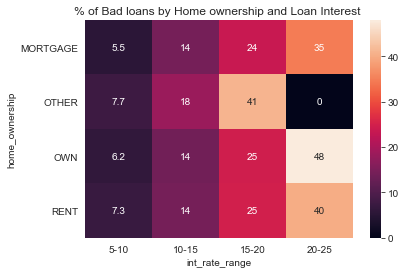

In [1669]:
# Plot the heatmap home owmership and interest rate range
sns.heatmap(p_temp_home_own_Interrate_tab,annot=True)
plt.title("% of Bad loans by Home ownership and Loan Interest ")


### Home ownership and Loan Purpose

In [1670]:
# Analyse home ownership with Loan Purpose
p_home_own_Purpose = loan_df.pivot_table(index=['home_ownership','purpose'], columns='status_catg', values='id', aggfunc='count', fill_value=0).reset_index()

In [1671]:
# Calculate the Bad lona percentage 
p_home_own_Purpose['Bad_loan_perc'] = p_home_own_Purpose['Bad Loan']/(p_home_own_Purpose['Bad Loan']+p_home_own_Purpose['Good Loan'])*100
p_home_own_Purpose['Good_loan_perc'] = p_home_own_Purpose['Good Loan']/(p_home_own_Purpose['Bad Loan']+p_home_own_Purpose['Good Loan'])*100

p_home_own_Purpose_1 = p_home_own_Purpose[p_home_own_Purpose['home_ownership']!= 'OTHER']
p_home_own_Purpose_1

status_catg home_ownership             purpose  Bad Loan  Good Loan  \
0                 MORTGAGE                 car        62        622   
1                 MORTGAGE         credit_card       206       1826   
2                 MORTGAGE  debt_consolidation      1062       5933   
3                 MORTGAGE         educational        11         70   
4                 MORTGAGE    home_improvement       230       1822   
5                 MORTGAGE               house        17        100   
6                 MORTGAGE      major_purchase        61        766   
7                 MORTGAGE             medical        37        234   
8                 MORTGAGE              moving         7         89   
9                 MORTGAGE               other       158       1077   
10                MORTGAGE    renewable_energy         7         41   
11                MORTGAGE      small_business       158        513   
12                MORTGAGE            vacation        11        111   
13                MORTGAGE             wedding        30        233   
26                     OWN                 car        14        109   
27                     OWN         credit_card        28        209   
28                     OWN  debt_consolidation       164        953   
29                     OWN         educational         2         12   
30                     OWN    home_improvement        29        226   
31                     OWN               house         3         21   
32                     OWN      major_purchase        19        178   
33                     OWN             medical         9         44   
34                     OWN              moving         5         21   
35                     OWN               other        49        251   
36                     OWN    renewable_energy         1          5   
37                     OWN      small_business        20         51   
38                     OWN            vacation         4         20   
39                     OWN             wedding         2         47   
40                    RENT                 car        73        508   
41                    RENT         credit_card       241       2075   
42                    RENT  debt_consolidation      1294       7393   
43                    RENT         educational        33        147   
44                    RENT    home_improvement        32        204   
45                    RENT               house        33        148   
46                    RENT      major_purchase       112        817   
47                    RENT             medical        49        240   
48                    RENT              moving        66        330   
49                    RENT               other       346       1562   
50                    RENT    renewable_energy         8         24   
51                    RENT      small_business       181        411   
52                    RENT            vacation        34        152   
53                    RENT             wedding        56        495   

status_catg  Bad_loan_perc  Good_loan_perc  
0                     9.06           90.94  
1                    10.14           89.86  
2                    15.18           84.82  
3                    13.58           86.42  
4                    11.21           88.79  
5                    14.53           85.47  
6                     7.38           92.62  
7                    13.65           86.35  
8                     7.29           92.71  
9                    12.79           87.21  
10                   14.58           85.42  
11                   23.55           76.45  
12                    9.02           90.98  
13                   11.41           88.59  
26                   11.38           88.62  
27                   11.81           88.19  
28                   14.68           85.32  
29                   14.29           85.71  
30                   11.37           88.63  
31                   12.50           87.50  
3

In [1672]:
p_home_own_Purpose_1_tab = p_home_own_Purpose_1.pivot_table(index=['home_ownership'], columns=['purpose'], values='Bad_loan_perc', fill_value=0)
p_home_own_Purpose_1_tab


purpose          car  credit_card  debt_consolidation  educational  \
home_ownership                                                       
MORTGAGE        9.06        10.14               15.18        13.58   
OWN            11.38        11.81               14.68        14.29   
RENT           12.56        10.41               14.90        18.33   

purpose         home_improvement  house  major_purchase  medical  moving  \
home_ownership                                                             
MORTGAGE                   11.21  14.53            7.38    13.65    7.29   
OWN                        11.37  12.50            9.64    16.98   19.23   
RENT                       13.56  18.23           12.06    16.96   16.67   

purpose         other  renewable_energy  small_business  vacation  wedding  
home_ownership                                                              
MORTGAGE        12.79             14.58           23.55      9.02    11.41  
OWN             16.33             16.67           28.17     16.67     4.08  
RENT            18.13             25.00           30.57     18.28    10.16

Text(0.5, 1.0, '% of Bad loans by home_ownership and Loan Purpose')

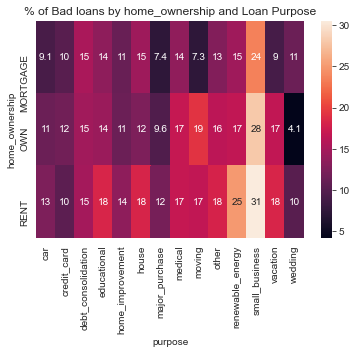

In [1673]:
sns.heatmap(p_home_own_Purpose_1_tab,annot=True)
plt.title("% of Bad loans by home_ownership and Loan Purpose")


### Emp length analysis

#### Analyze the bad loans by employee length and other related fields

In [1674]:
## get the number of loans issued by emp_length_range and loan status
p_empl = loan_df.pivot_table(index='emp_length_range', columns='status_catg', values='id', aggfunc='count', fill_value=0)
p_empl

status_catg       Bad Loan  Good Loan
emp_length_range                     
1-3 years             1472       9326
10+ years             1229       6690
4-6 years             1143       7123
7-9 years              591       3556
< 1 year               535       3426
Unknown                 12         43

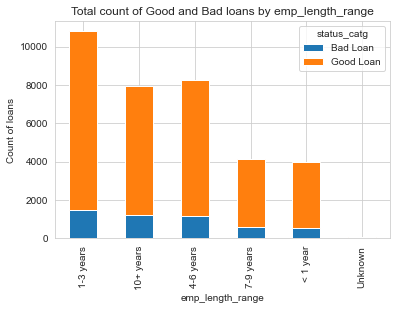

In [1675]:
## plot the number of loans issued by emp_length_range and loan status
p_empl.plot(kind="bar",stacked = True)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by emp_length_range")
plt.show()

In [1676]:
## get the % of bad loans by emp_length_range
p_empl['Total'] = p_empl['Bad Loan']+p_empl['Good Loan']
p_empl['Total_perc'] = p_empl['Total']/sum(p_empl['Total'])*100
p_empl['Bad_loan_perc'] = p_empl['Bad Loan']/(p_empl['Bad Loan']+p_empl['Good Loan'])*100
p_empl.reset_index(inplace=True)
p_empl.sort_values(by='Bad_loan_perc',ascending=False)

status_catg emp_length_range  Bad Loan  Good Loan  Total  Total_perc  \
5                    Unknown        12         43     55        0.16   
1                  10+ years      1229       6690   7919       22.53   
3                  7-9 years       591       3556   4147       11.80   
2                  4-6 years      1143       7123   8266       23.52   
0                  1-3 years      1472       9326  10798       30.72   
4                   < 1 year       535       3426   3961       11.27   

status_catg  Bad_loan_perc  
5                    21.82  
1                    15.52  
3                    14.25  
2                    13.83  
0                    13.63  
4                    13.51

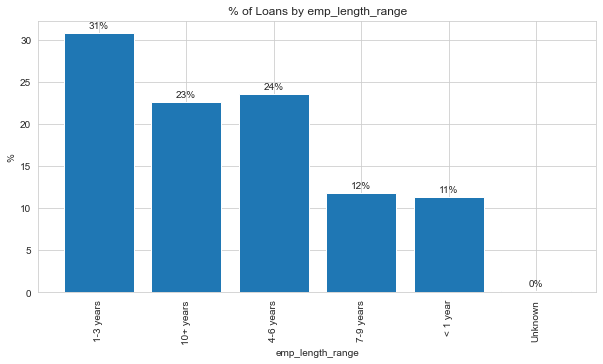

In [1677]:
## plot the % of Loans by emp_length_range
Plot_bar_chart_annot_rot(p_empl,'emp_length_range','Total_perc','emp_length_range','%','% of Loans by emp_length_range','%',90)

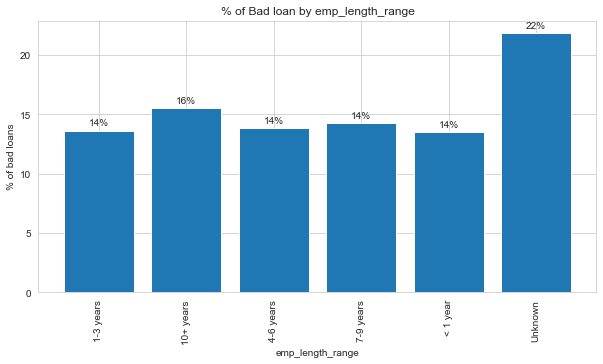

In [1678]:
## plot the bad loans by emp length range
Plot_bar_chart_annot_rot(p_empl,'emp_length_range','Bad_loan_perc','emp_length_range','% of bad loans','% of Bad loan by emp_length_range','%',90)

## Insights
1. 31% of loans in emp length 2-3 years. 23% and 24% in 10+ years and 4-6 years.  11% of loans in <1 year
2. The highest risk is in 10+ years at 16% Bad loans. The risk is 14% bad loans in all other emp length years
3. The variance of risk between highest and lowest is 2%

### Emp length and interest rate

In [1679]:
## get the average interest rate by loan emp_length_range
p_empl = loan_df.pivot_table(index='emp_length_range', values='int_rate', aggfunc='mean', fill_value=0)
p_empl.reset_index(inplace=True)
p_empl

emp_length_range  int_rate
0        1-3 years     11.99
1        10+ years     11.97
2        4-6 years     12.01
3        7-9 years     11.94
4         < 1 year     11.87
5          Unknown     10.94

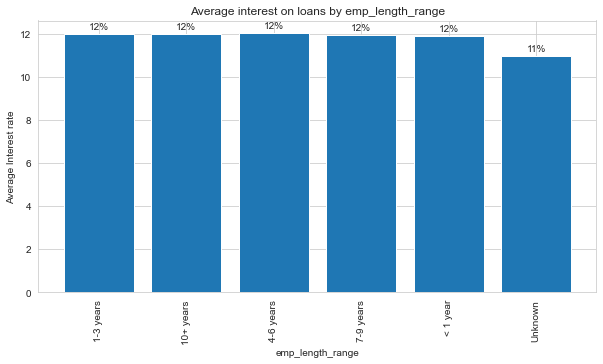

In [1680]:
## plot the average interest rate by loan emp_length_range
Plot_bar_chart_annot_rot(p_empl,'emp_length_range','int_rate','emp_length_range','Average Interest rate','Average interest on loans by emp_length_range','%',90)

In [1681]:
## get the % of loans by emp_length_range and interest rate range
p_empl = pd.crosstab(loan_df['emp_length_range'],loan_df['int_rate_range'],normalize='index')
p_empl

int_rate_range    5-10  10-15  15-20  20-25
emp_length_range                           
1-3 years         0.30   0.50   0.18   0.02
10+ years         0.33   0.45   0.20   0.02
4-6 years         0.32   0.46   0.20   0.02
7-9 years         0.32   0.46   0.19   0.02
< 1 year          0.32   0.49   0.17   0.02
Unknown           0.51   0.36   0.13   0.00

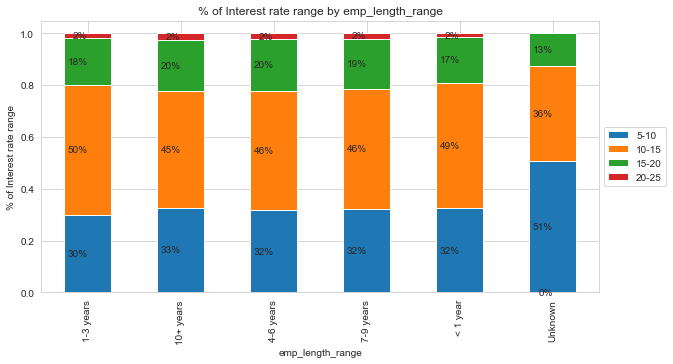

In [1682]:
## plot the % of loans by emp_length_range and interest rate range
Plot_stacked_bar_chart_annot(p_empl,'emp_length_range','% of Interest rate range','% of Interest rate range by emp_length_range','%',90)

In [1683]:
## get the % of bad loans by emp_length_range and interest rate range
p_empl = loan_df.pivot_table(index=['emp_length_range','int_rate_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_empl=p_empl.reset_index()
df_empl['Bad_loan_perc'] =   df_empl['Bad Loan']/(df_empl['Bad Loan']+df_empl['Good Loan'])
df_empl.sort_values(by='Bad_loan_perc',ascending=False)

status_catg emp_length_range int_rate_range  Bad Loan  Good Loan  \
7                  10+ years          20-25        83        113   
19                  < 1 year          20-25        24         36   
15                 7-9 years          20-25        32         54   
11                 4-6 years          20-25        66        115   
3                  1-3 years          20-25        63        118   
22                   Unknown          15-20         2          5   
6                  10+ years          15-20       421       1158   
14                 7-9 years          15-20       196        609   
10                 4-6 years          15-20       390       1251   
2                  1-3 years          15-20       466       1511   
18                  < 1 year          15-20       159        533   
20                   Unknown           5-10         6         22   
21                   Unknown          10-15         4         16   
5                  10+ years          10-15       560       3007   
13                 7-9 years          10-15       278       1638   
1                  1-3 years          10-15       756       4667   
9                  4-6 years          10-15       524       3301   
17                  < 1 year          10-15       263       1663   
16                  < 1 year           5-10        89       1194   
4                  10+ years           5-10       165       2412   
12                 7-9 years           5-10        85       1255   
8                  4-6 years           5-10       163       2456   
0                  1-3 years           5-10       187       3030   

status_catg  Bad_loan_perc  
7                     0.42  
19                    0.40  
15                    0.37  
11                    0.36  
3                     0.35  
22                    0.29  
6                     0.27  
14                    0.24  
10                    0.24  
2                     0.24  
18                    0.23  
20                    0.21  
21                    0.20  
5                     0.16  
13                    0.15  
1                     0.14  
9                     0.14  
17                    0.14  
16                    0.07  
4                     0.06  
12                    0.06  
8                     0.06  
0                     0.06

In [1684]:
## format for the heatmap
p_empl = df_empl.pivot_table(index=['emp_length_range'], columns=['int_rate_range'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_empl

int_rate_range    5-10  10-15  15-20  20-25
emp_length_range                           
1-3 years            5     13     23     34
10+ years            6     15     26     42
4-6 years            6     13     23     36
7-9 years            6     14     24     37
< 1 year             6     13     22     40
Unknown             21     20     28      0

Text(0.5, 1.0, '% of Bad Loans by emp_length_range and Interest rate range')

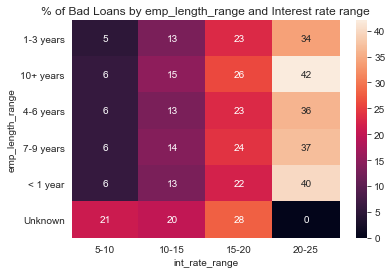

In [1685]:
### plot the heatmap for % of bad loans by emp_length_range and interest rate range
sns.heatmap(p_empl,annot=True)
plt.title("% of Bad Loans by emp_length_range and Interest rate range")

## Insights
1. The average interest rate across all emp length years is around 12%.  
2. Almost 45% to 50% of loans are issued in 10-15% interest rate range 
3. The 10+ year with 20-25% interest rates are the riskiest loans with 42% bad loans. The 2-3 year with 5-10% interest rate are the least risky loan with 5% bad loans.
4. The risk variance between the highest and least risky comibation is 37%

### Employee length and term

In [1686]:
## get the % of loans by emp_length_range and term
p_empl = pd.crosstab(loan_df['emp_length_range'],loan_df['term'],normalize='index')
p_empl

term               36 months   60 months
emp_length_range                        
1-3 years               0.79        0.21
10+ years               0.68        0.32
4-6 years               0.74        0.26
7-9 years               0.73        0.27
< 1 year                0.80        0.20
Unknown                 0.82        0.18

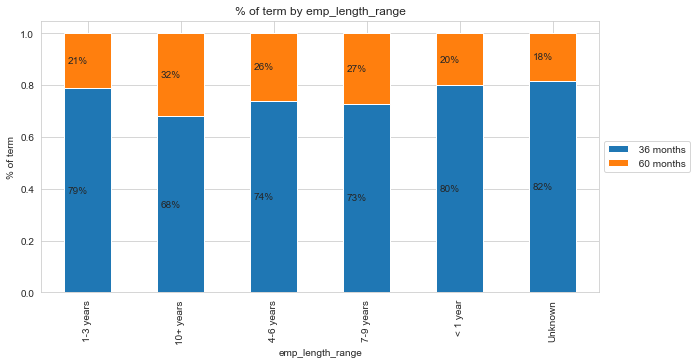

In [1687]:
## plot the % of loans by emp_length_range and term
Plot_stacked_bar_chart_annot(p_empl,'emp_length_range','% of term','% of term by emp_length_range','%',90)

In [1688]:
## get the % of bad loans by emp_length_range and term
p_empl = loan_df.pivot_table(index=['emp_length_range','term'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_empl=p_empl.reset_index()
df_empl['Bad_loan_perc'] =   df_empl['Bad Loan']/(df_empl['Bad Loan']+df_empl['Good Loan'])
df_empl.sort_values(by='Bad_loan_perc',ascending=False)

status_catg emp_length_range        term  Bad Loan  Good Loan  Bad_loan_perc
3                  10+ years   60 months       663       1875           0.26
9                   < 1 year   60 months       201        593           0.25
7                  7-9 years   60 months       281        848           0.25
1                  1-3 years   60 months       561       1734           0.24
5                  4-6 years   60 months       508       1640           0.24
10                   Unknown   36 months        10         35           0.22
11                   Unknown   60 months         2          8           0.20
0                  1-3 years   36 months       911       7592           0.11
8                   < 1 year   36 months       334       2833           0.11
2                  10+ years   36 months       566       4815           0.11
4                  4-6 years   36 months       635       5483           0.10
6                  7-9 years   36 months       310       2708           0.10

In [1689]:
## format for the heatmap
p_empl = df_empl.pivot_table(index=['emp_length_range'], columns=['term'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_empl

term               36 months   60 months
emp_length_range                        
1-3 years                 10          24
10+ years                 10          26
4-6 years                 10          23
7-9 years                 10          24
< 1 year                  10          25
Unknown                   22          20

Text(0.5, 1.0, '% of Bad Loans by emp_length_range and term')

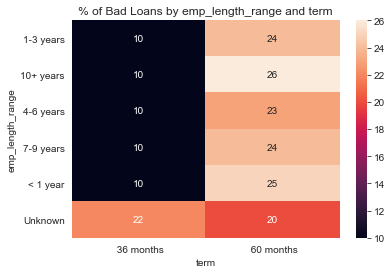

In [1690]:
### plot the heatmap for % of bad loans by emp_length_range and term
sns.heatmap(p_empl,annot=True)
plt.title("% of Bad Loans by emp_length_range and term")

## Insights
1. 80% of loans issued to <1 year and 2-years emp length borrowers with 36 month term. For other emp length borrwers this ranges from 68% to 74%.  Lowest for 10+ yeras at 68%. 
2. <1 year emp length loan with 60 month term is the most riskiest with 25% bad loans.  30 month loans across all emp lenth are the least risky with 10% bad loans. 
3. The risk variance between the highest and least risky combinations is 15%. 

### Employee length and loan_amnt_range

In [1691]:
## get the % of loans by emp_length_range and loan_amnt_range
p_empl = pd.crosstab(loan_df['emp_length_range'],loan_df['loan_amnt_range'],normalize='index')
p_empl

loan_amnt_range   0K-5K  5K-10K  10K-15K  15K-20K  20K-25K  25K-30K  30K-35K
emp_length_range                                                            
1-3 years          0.27    0.36     0.20     0.10     0.06     0.01     0.01
10+ years          0.19    0.30     0.21     0.14     0.10     0.03     0.03
4-6 years          0.23    0.34     0.21     0.12     0.07     0.02     0.02
7-9 years          0.21    0.32     0.22     0.13     0.08     0.02     0.02
< 1 year           0.31    0.35     0.18     0.09     0.04     0.01     0.01
Unknown            0.49    0.29     0.09     0.07     0.04     0.02     0.00

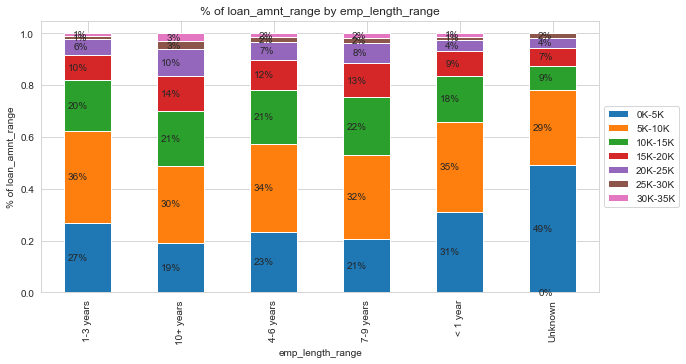

In [1692]:
## plot the % of loans by emp_length_range and loan_amnt_range
Plot_stacked_bar_chart_annot(p_empl,'emp_length_range','% of loan_amnt_range','% of loan_amnt_range by emp_length_range','%',90)

In [1693]:
## get the % of bad loans by emp_length_range and loan_amnt_range
p_empl = loan_df.pivot_table(index=['emp_length_range','loan_amnt_range'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_empl=p_empl.reset_index()
df_empl['Bad_loan_perc'] =   df_empl['Bad Loan']/(df_empl['Bad Loan']+df_empl['Good Loan'])
df_empl.sort_values(by='Bad_loan_perc',ascending=False)

status_catg emp_length_range loan_amnt_range  Bad Loan  Good Loan  \
39                   Unknown         20K-25K         1          1   
36                   Unknown          5K-10K         5         11   
34                  < 1 year         30K-35K        15         34   
13                 10+ years         30K-35K        64        179   
12                 10+ years         25K-30K        58        181   
20                 4-6 years         30K-35K        31         97   
6                  1-3 years         30K-35K        30         95   
26                 7-9 years         25K-30K        17         61   
11                 10+ years         20K-25K       167        642   
27                 7-9 years         30K-35K        15         58   
5                  1-3 years         25K-30K        25         98   
37                   Unknown         10K-15K         1          4   
33                  < 1 year         25K-30K         9         37   
10                 10+ years         15K-20K       212        882   
32                  < 1 year         20K-25K        34        144   
18                 4-6 years         20K-25K       108        462   
25                 7-9 years         20K-25K        61        265   
35                   Unknown           0K-5K         5         22   
24                 7-9 years         15K-20K        93        454   
3                  1-3 years         15K-20K       174        875   
19                 4-6 years         25K-30K        24        127   
17                 4-6 years         15K-20K       151        802   
4                  1-3 years         20K-25K       101        540   
31                  < 1 year         15K-20K        58        315   
0                  1-3 years           0K-5K       408       2490   
23                 7-9 years         10K-15K       130        801   
9                  10+ years         10K-15K       233       1436   
2                  1-3 years         10K-15K       281       1836   
7                  10+ years           0K-5K       202       1321   
29                  < 1 year          5K-10K       181       1195   
15                 4-6 years          5K-10K       362       2452   
16                 4-6 years         10K-15K       222       1507   
28                  < 1 year           0K-5K       157       1074   
14                 4-6 years           0K-5K       245       1676   
21                 7-9 years           0K-5K       109        750   
8                  10+ years          5K-10K       293       2049   
22                 7-9 years          5K-10K       166       1167   
1                  1-3 years          5K-10K       453       3392   
30                  < 1 year         10K-15K        81        627   
38                   Unknown         15K-20K         0          4   
40                   Unknown         25K-30K         0          1   

status_catg  Bad_loan_perc  
39                    0.50  
36                    0.31  
34                    0.31  
13                    0.26  
12                    0.24  
20                    0.24  
6                     0.24  
26                    0.22  
11                    0.21  
27                    0.21  
5                     0.20  
37                    0.20  
33                    0.20  
10                    0.19  
32                    0.19  
18                    0.19  
25                    0.19  
35                    0.19  
24                    0.17  
3                     0.17  
19                    0.16  
17                    0.16  
4                     0.16  
31                    0.16  
0                     0.14  
23                    0.14  
9                     0.14  
2                     0.13  
7                     0.13  
29                    0.13  
15                    0.13  
16                    0.13  
28                    0.13  
14                    0.13  
21                    0.13  
8                     0.13  
22                    0.12  

In [1694]:
## format for the heatmap
p_empl = df_empl.pivot_table(index=['emp_length_range'], columns=['loan_amnt_range'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_empl

loan_amnt_range   0K-5K  5K-10K  10K-15K  15K-20K  20K-25K  25K-30K  30K-35K
emp_length_range                                                            
1-3 years            14      11       13       16       15       20       24
10+ years            13      12       13       19       20       24       26
4-6 years            12      12       12       15       18       15       24
7-9 years            12      12       13       17       18       21       20
< 1 year             12      13       11       15       19       19       30
Unknown              18      31       20        0       50        0        0

Text(0.5, 1.0, '% of Bad Loans by emp_length_range and loan_amnt_range')

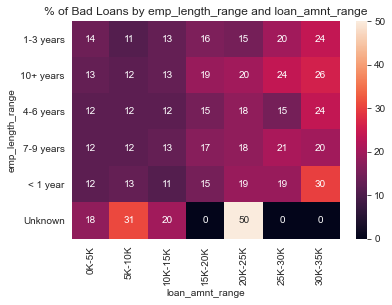

In [1695]:
### plot the heatmap for % of bad loans by emp_length_range and loan_amnt_range
sns.heatmap(p_empl,annot=True)
plt.title("% of Bad Loans by emp_length_range and loan_amnt_range")

## Insights
1. 0-5K loans are most issued to <1 year and 1-3 years emp length borowers. 10+ years have 16% of loans in the 20K-35K which is the highest amount all emp length years
2. <1 year emp length and 30-35K loans are most riskiest with 30% bad loans.  The least riskiest loans are in different emp length and 0K-15K amounts with 12% bad loans. 
3. The risk variance between highest and lowest combinations is 18%. 

### Employee Length and Purpose

In [1696]:
## get the % of loans by emp_length_range and purpose
p_empl = pd.crosstab(loan_df['emp_length_range'],loan_df['purpose'],normalize='index')
p_empl

purpose           car  credit_card  debt_consolidation  educational  \
emp_length_range                                                      
1-3 years        0.04         0.13                0.47         0.01   
10+ years        0.04         0.13                0.48         0.00   
4-6 years        0.04         0.13                0.49         0.01   
7-9 years        0.04         0.13                0.50         0.01   
< 1 year         0.04         0.13                0.46         0.01   
Unknown          0.04         0.11                0.36         0.00   

purpose           home_improvement  house  major_purchase  medical  moving  \
emp_length_range                                                             
1-3 years                     0.06   0.01            0.06     0.02    0.02   
10+ years                     0.10   0.01            0.05     0.02    0.01   
4-6 years                     0.07   0.01            0.06     0.02    0.01   
7-9 years                     0.08   0.01            0.05     0.02    0.01   
< 1 year                      0.05   0.01            0.06     0.02    0.03   
Unknown                       0.02   0.00            0.04     0.02    0.04   

purpose           other  renewable_energy  small_business  vacation  wedding  
emp_length_range                                                              
1-3 years          0.10              0.00            0.04      0.01     0.03  
10+ years          0.10              0.00            0.03      0.01     0.01  
4-6 years          0.09              0.00            0.04      0.01     0.03  
7-9 years          0.09              0.00            0.04      0.01     0.02  
< 1 year           0.11              0.00            0.04      0.01     0.03  
Unknown            0.27              0.00            0.09      0.00     0.02

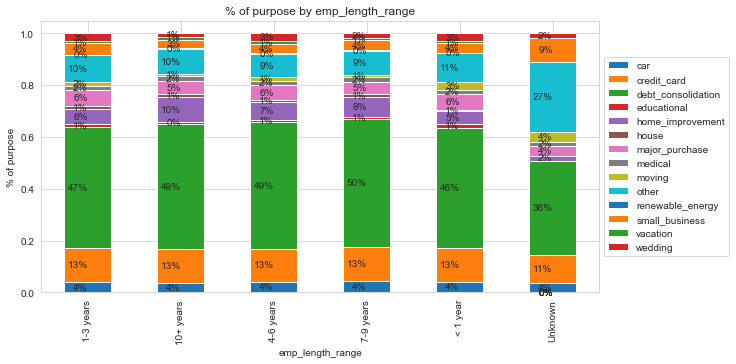

In [1697]:
## plot the % of loans by emp_length_range and purpose
Plot_stacked_bar_chart_annot(p_empl,'emp_length_range','% of purpose','% of purpose by emp_length_range','%',90)

In [1698]:
## get the % of bad loans by emp_length_range and purpose
p_empl = loan_df.pivot_table(index=['emp_length_range','purpose'], columns='status_catg', values='id', aggfunc='count', fill_value=0)
df_empl=p_empl.reset_index()
df_empl['Bad_loan_perc'] =   df_empl['Bad Loan']/(df_empl['Bad Loan']+df_empl['Good Loan'])
df_empl.sort_values(by='Bad_loan_perc',ascending=False)

status_catg emp_length_range             purpose  Bad Loan  Good Loan  \
70                   Unknown                 car         1          1   
76                   Unknown              moving         1          1   
77                   Unknown               other         5         10   
25                 10+ years      small_business        77        181   
39                 4-6 years      small_business        89        210   
54                 7-9 years            vacation        10         28   
68                  < 1 year            vacation         7         20   
11                 1-3 years      small_business       124        355   
53                 7-9 years      small_business        39        118   
38                 4-6 years    renewable_energy         4         13   
10                 1-3 years    renewable_energy         5         17   
67                  < 1 year      small_business        33        113   
50                 7-9 years              moving         9         33   
19                 10+ years               house        14         53   
78                   Unknown      small_business         1          4   
31                 4-6 years         educational        12         51   
63                  < 1 year             medical        12         52   
3                  1-3 years         educational        19         85   
47                 7-9 years               house         7         32   
52                 7-9 years    renewable_energy         3         14   
59                  < 1 year         educational         9         43   
16                 10+ years  debt_consolidation       662       3177   
27                 10+ years             wedding        17         83   
49                 7-9 years             medical        12         59   
23                 10+ years               other       129        635   
71                   Unknown         credit_card         1          5   
9                  1-3 years               other       183        921   
36                 4-6 years              moving        19         97   
24                 10+ years    renewable_energy         4         21   
7                  1-3 years             medical        30        160   
44                 7-9 years  debt_consolidation       322       1732   
33                 4-6 years               house        11         60   
65                  < 1 year               other        67        371   
8                  1-3 years              moving        26        144   
37                 4-6 years               other       115        641   
72                   Unknown  debt_consolidation         3         17   
51                 7-9 years               other        56        322   
5                  1-3 years               house        17         99   
64                  < 1 year              moving        18        105   
21                 10+ years             medical        23        136   
58                  < 1 year  debt_consolidation       260       1577   
2                  1-3 years  debt_consolidation       712       4340   
30                 4-6 years  debt_consolidation       568       3466   
40                 4-6 years            vacation        13         80   
26                 10+ years            vacation        13         80   
35                 4-6 years             medical        18        113   
61                  < 1 year               house         4         26   
60                  < 1 year    home_improvement        26        170   
4                  1-3 years    home_improvement        78        570   
29                 4-6 years         credit_card       127        937   
56                  < 1 year                 car        19        145   
15                 10+ years         credit_card       118        912   
18                 10+ years    home_improvement        90        700   
17                 10+ years         educational         4

In [1699]:
## format for the heatmap
p_empl = df_empl.pivot_table(index=['emp_length_range'], columns=['purpose'], values='Bad_loan_perc', fill_value=0).apply(lambda x: (x*100).astype(int))
p_empl

purpose           car  credit_card  debt_consolidation  educational  \
emp_length_range                                                      
1-3 years          10            8                  14           18   
10+ years          10           11                  17           11   
4-6 years          10           11                  14           19   
7-9 years          10           10                  15            8   
< 1 year           11            8                  14           17   
Unknown            50           16                  15            0   

purpose           home_improvement  house  major_purchase  medical  moving  \
emp_length_range                                                             
1-3 years                       12     14              10       15      15   
10+ years                       11     20              10       14       9   
4-6 years                       10     15               9       13      16   
7-9 years                       10     17               7       16      21   
< 1 year                        13     13              10       18      14   
Unknown                          0      0               0        0      50   

purpose           other  renewable_energy  small_business  vacation  wedding  
emp_length_range                                                              
1-3 years            16                22              25         7        8  
10+ years            16                16              29        13       17  
4-6 years            15                23              29        13       11  
7-9 years            14                17              24        26        6  
< 1 year             15                 0              22        25        8  
Unknown              33                 0              20         0        0

Text(0.5, 1.0, '% of Bad Loans by emp_length_range and purpose')

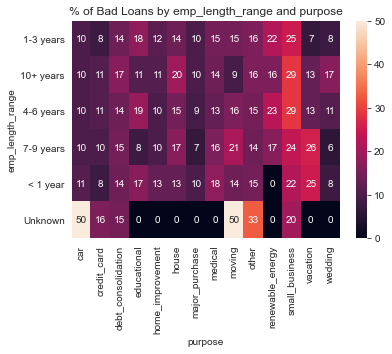

In [1700]:
### plot the heatmap for % of bad loans by emp_length_range and purpose
sns.heatmap(p_empl,annot=True)
plt.title("% of Bad Loans by emp_length_range and purpose")

## Insights
1. 46% to 50% of the loans taken by borrowers across all emp length is for Debt consoldation. 13% of loans for credit card payoff.  <1 year borrwers take marginally lesser loans for debt consolidation. 
2. 10+ year and 4-6 year emp length and Small business loans are the most riskiest with 29% bad loans. 7-9 year emp length & major purchase loans, 1-3 year emp len vacation loan are the least riskiest with 7% bad loans.
3. The risk variance between the highest and least riskiest combinations is 22%.  

## Insights
As Employment tenure does not impact the loan getting defaulted, but we analyse employment length with income category we can say that as a borrower gained more experience but still earning less is more likely to default the loan.

## Earliest credit line analysis

In [1701]:
# Extract 'year' from the "earliest_cred_line" variable and check the unique values
loan_df['earliest_cr_line_chng'].dt.year.unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 1981, 2000, 1994, 1995, 1992,
       1986, 1990, 1988, 1980, 2008, 1979, 1987, 1978, 1971, 1972, 1970,
       1969, 1975, 1976, 1977, 1982, 1973, 2009, 1974, 2011, 2010],
      dtype=int64)

In [1702]:
# Create a new variable of 'earliet_cr_line_year' by extracting year from the earliest_cr_line variable
loan_df['earliest_cr_line_year']= loan_df['earliest_cr_line_chng'].apply(lambda x: int(x.year))
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500          2500.00   60 months   
1  1076863    1277178      10000        10000         10000.00   36 months   
3  1075269    1311441       5000         5000          5000.00   36 months   
4  1069639    1304742       7000         7000          7000.00   60 months   
5  1072053    1288686       3000         3000          3000.00   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     15.27        59.83     C        C4   < 1 year           RENT   
1     13.49       339.31     C        C1  10+ years           RENT   
3      7.90       156.46     A        A4    3 years           RENT   
4     15.96       170.08     C        C5    8 years           RENT   
5     18.64       109.43     E        E1    9 years           RENT   

   annual_inc verification_status    issue_d  loan_status             purpose  \
0    30000.00     Source Verified 2011-12-01  Charged Off                 car   
1    49200.00     Source Verified 2011-12-01   Fully Paid               other   
3    36000.00     Source Verified 2011-12-01   Fully Paid             wedding   
4    47004.00        Not Verified 2011-12-01   Fully Paid  debt_consolidation   
5    48000.00     Source Verified 2011-12-01   Fully Paid                 car   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         GA  1.00            0       1999-04-01               5         3   
1         CA 20.00            0       1996-02-01               1        10   
3         AZ 11.20            0       2004-11-01               3         9   
4         NC 23.51            0       2005-07-01               1         7   
5         CA  5.35            0       2007-01-01               2         4   

   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0       1687        9.40          4       0.00           0.00   
1        0       5598       21.00         37       0.00           0.00   
3        0       7963       28.30         12       0.00           0.00   
4        0      17726       85.60         11       0.00           0.00   
5        0       8221       87.50          4       0.00           0.00   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      1008.71          1008.71           456.46         435.17   
1     12231.89         12231.89         10000.00        2214.92   
3      5632.21          5632.21          5000.00         632.21   
4     10110.84         10110.84          6985.61        3125.23   
5      3939.14          3939.14          3000.00         939.14   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00      117.08                     1.11   2013-04-01   
1               16.97        0.00                     0.00   2015-01-01   
3                0.00        0.00                     0.00   2015-01-01   
4                0.00        0.00                     0.00   2016-05-01   
5                0.00        0.00                     0.00   2015-01-01   

   last_pymnt_amnt  pub_rec_bankruptcies                emp_title  \
0           119.66                  0.00                    ryder   
1           357.48                  0.00        airresourcesboard   
3           161.03                  0.00      veoliatransportaton   
4          1313.76                  0.00  southernstarphotography   
5           111.34                  0.00            mkcaccounting   

  earliest_cr_line_chng status_catg    inc_catg loan_amnt_range  \
0            1999-04-01    Bad Loan     Low inc           0K-5K   
1            1996-02-01   Good Loan  Middle inc          5K-10K   
3            2004-11-01   Good Loan     Low inc           0K-5K   
4            2005-07-01   Good Loan  Middle inc          5K-10K   
5            2007-01-01   Good Loan  Middle inc           0K-5K   

  int_rate_range  issue_year  mths_issue_last

In [1703]:
# Create bins for the 'earliest_cr_line_year' for analysing this variable
cut_labels = ['1965-1975', '1976-1985', '1986-1995', '1996-2008', '2009-2011']
loan_df['earliest_cr_line_yr_range']=pd.cut(loan_df['earliest_cr_line_year'], bins=np.linspace(1965,2015,6),labels=cut_labels)
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077430    1314167       2500         2500          2500.00   60 months   
1  1076863    1277178      10000        10000         10000.00   36 months   
3  1075269    1311441       5000         5000          5000.00   36 months   
4  1069639    1304742       7000         7000          7000.00   60 months   
5  1072053    1288686       3000         3000          3000.00   36 months   

   int_rate  installment grade sub_grade emp_length home_ownership  \
0     15.27        59.83     C        C4   < 1 year           RENT   
1     13.49       339.31     C        C1  10+ years           RENT   
3      7.90       156.46     A        A4    3 years           RENT   
4     15.96       170.08     C        C5    8 years           RENT   
5     18.64       109.43     E        E1    9 years           RENT   

   annual_inc verification_status    issue_d  loan_status             purpose  \
0    30000.00     Source Verified 2011-12-01  Charged Off                 car   
1    49200.00     Source Verified 2011-12-01   Fully Paid               other   
3    36000.00     Source Verified 2011-12-01   Fully Paid             wedding   
4    47004.00        Not Verified 2011-12-01   Fully Paid  debt_consolidation   
5    48000.00     Source Verified 2011-12-01   Fully Paid                 car   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         GA  1.00            0       1999-04-01               5         3   
1         CA 20.00            0       1996-02-01               1        10   
3         AZ 11.20            0       2004-11-01               3         9   
4         NC 23.51            0       2005-07-01               1         7   
5         CA  5.35            0       2007-01-01               2         4   

   pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0       1687        9.40          4       0.00           0.00   
1        0       5598       21.00         37       0.00           0.00   
3        0       7963       28.30         12       0.00           0.00   
4        0      17726       85.60         11       0.00           0.00   
5        0       8221       87.50          4       0.00           0.00   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0      1008.71          1008.71           456.46         435.17   
1     12231.89         12231.89         10000.00        2214.92   
3      5632.21          5632.21          5000.00         632.21   
4     10110.84         10110.84          6985.61        3125.23   
5      3939.14          3939.14          3000.00         939.14   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00      117.08                     1.11   2013-04-01   
1               16.97        0.00                     0.00   2015-01-01   
3                0.00        0.00                     0.00   2015-01-01   
4                0.00        0.00                     0.00   2016-05-01   
5                0.00        0.00                     0.00   2015-01-01   

   last_pymnt_amnt  pub_rec_bankruptcies                emp_title  \
0           119.66                  0.00                    ryder   
1           357.48                  0.00        airresourcesboard   
3           161.03                  0.00      veoliatransportaton   
4          1313.76                  0.00  southernstarphotography   
5           111.34                  0.00            mkcaccounting   

  earliest_cr_line_chng status_catg    inc_catg loan_amnt_range  \
0            1999-04-01    Bad Loan     Low inc           0K-5K   
1            1996-02-01   Good Loan  Middle inc          5K-10K   
3            2004-11-01   Good Loan     Low inc           0K-5K   
4            2005-07-01   Good Loan  Middle inc          5K-10K   
5            2007-01-01   Good Loan  Middle inc           0K-5K   

  int_rate_range  issue_year  mths_issue_last

In [1704]:
# bivariate analysis on the 'earliest_cr_line-year_range' and the 'status_catg' to check if there any relationship between both
p_temp = loan_df.pivot_table(index='earliest_cr_line_yr_range', columns='status_catg', values='id', aggfunc='count', fill_value=0)

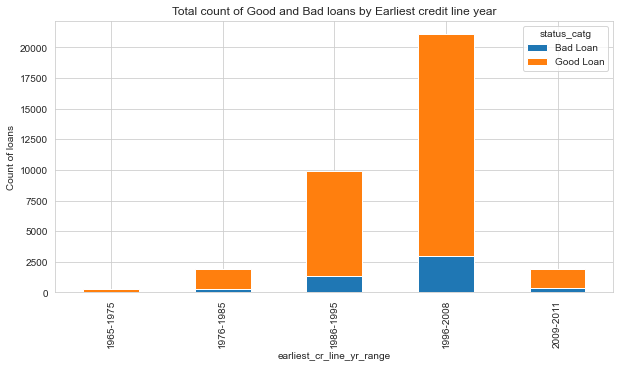

In [1705]:
# Plot the relationship between 'earliest_cr_line-year_range' and the 'status_catg'
fig, axes = plt.subplots(figsize=(10,5))
p_temp.plot(kind="bar",stacked = True,ax=axes)
plt.ylabel("Count of loans")
plt.title("Total count of Good and Bad loans by Earliest credit line year")
plt.show()

In [1706]:
# Crosstab of 'earliest_cr_line_yr_range' and 'status_catg' to check the proportion of bad loans
p_temp['Bad_loan_perc'] = p_temp['Bad Loan']/(p_temp['Bad Loan']+p_temp['Good Loan'])*100
p_temp.reset_index(inplace=True)
p_temp

status_catg earliest_cr_line_yr_range  Bad Loan  Good Loan  Bad_loan_perc
0                           1965-1975        29        234          11.03
1                           1976-1985       243       1634          12.95
2                           1986-1995      1327       8619          13.34
3                           1996-2008      3008      18126          14.23
4                           2009-2011       375       1551          19.47

In [1707]:
p_temp_creditline= p_temp.drop(['Bad Loan','Good Loan'],axis=1)

In [1708]:
p_temp_creditline

status_catg earliest_cr_line_yr_range  Bad_loan_perc
0                           1965-1975          11.03
1                           1976-1985          12.95
2                           1986-1995          13.34
3                           1996-2008          14.23
4                           2009-2011          19.47

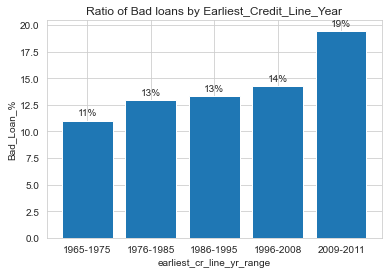

In [1709]:
# Plot the default rate on earliest credit line year range
Plot_bar_chart_annot(p_temp_creditline,'earliest_cr_line_yr_range','Bad_loan_perc','earliest_cr_line_yr_range','Bad_Loan_%',"Ratio of Bad loans by Earliest_Credit_Line_Year","%")

## Insight
Credit line falling in the year "2009 -2011', has the maximum bad loans as compared to loans in the other credit line year range


## Inquiry in last 6months analysis

In [1710]:
loan_df.inq_last_6mths.describe()

count   35146.00
mean        0.87
std         1.06
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         8.00
Name: inq_last_6mths, dtype: float64

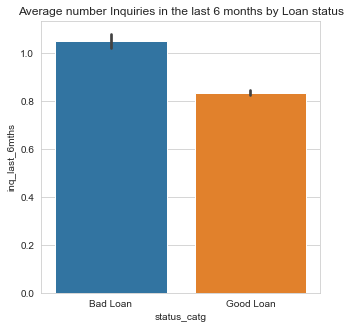

In [1711]:
fig, axes = plt.subplots(figsize=(5,5))
sns.barplot(data=loan_df,x='status_catg',y='inq_last_6mths',estimator=np.mean,ax=axes)
plt.title("Average number Inquiries in the last 6 months by Loan status")
plt.show()

In [1712]:
# Convert the data type of inq_in_last_6mths to integer
loan_df['inq_last_6mths'] = loan_df['inq_last_6mths'].astype(int)

In [1713]:
p_inq = loan_df.pivot_table(index = 'inq_last_6mths',columns ='status_catg', values='id',aggfunc='count',fill_value =0).sort_values(by = 'Bad Loan',ascending = False)

In [1714]:
# Calculate the Bad and Good Loan percentage
p_inq['Bad_loan_perc'] = p_inq['Bad Loan']/(p_inq['Bad Loan']+p_inq['Good Loan'])*100
p_inq['Good_loan_perc'] = p_inq['Good Loan']/(p_inq['Bad Loan']+p_inq['Good Loan'])*100
p_inq.drop(['Bad Loan','Good Loan'],axis = 1)

status_catg     Bad_loan_perc  Good_loan_perc
inq_last_6mths                               
0                       11.80           88.20
1                       15.39           84.61
2                       16.17           83.83
3                       20.51           79.49
4                       13.72           86.28
5                       18.03           81.97
6                       26.42           73.58
7                       26.67           73.33
8                       20.00           80.00

## Insight
More the number of inquiries by the borrower, more likely the borrower will default the loan

In [1715]:
print('****End of Analysis*****')

****End of Analysis*****
